In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns
from sklearn import preprocessing as s_prep

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
sns.set_style('darkgrid')

In [4]:
from project_methods import MSc_Proj as proj

In [5]:
# file_loc = proj.show_saved_csv()
# display(file_loc)

In [6]:
data_dir = os.getcwd() #'clean_pds//' #[str(k) for k, v in file_loc.items()][0]
data_dir

'W:\\MSc-AIDS-UoH\\Trimester_3\\Submit'

## OVERALL OBSERVATIONS in enroll.csv

In [7]:
fname = '\\enr_part_prof.csv'
main_df = pd.read_csv(data_dir+fname)
display(main_df.info(), main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55026 entries, 0 to 55025
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subjid                       55026 non-null  object 
 1   ccdep                        55026 non-null  int64  
 2   ccdepage                     55026 non-null  float64
 3   cccog                        55026 non-null  int64  
 4   cccogage                     55026 non-null  float64
 5   ccapt                        55026 non-null  int64  
 6   ccaptage                     55026 non-null  float64
 7   ccmtr                        55026 non-null  int64  
 8   ccmtrage                     55026 non-null  float64
 9   weight                       55026 non-null  float64
 10  height                       55026 non-null  float64
 11  bmi                          55026 non-null  float64
 12  seq                          55026 non-null  int64  
 13  visdy           

None

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0      R000024542      0       0.0      0       0.0      0       0.0      1   
1      R000024542      0       0.0      0       0.0      0       0.0      1   
2      R000024542      0       0.0      0       0.0      0       0.0      1   
3      R000024542      0       0.0      0       0.0      0       0.0      1   
4      R000024542      0       0.0      0       0.0      0       0.0      1   
...           ...    ...       ...    ...       ...    ...       ...    ...   
55021  R999989129      1      38.0      1      40.0      1      38.0      1   
55022  R999993234      1      48.0      0       0.0      1      50.0      0   
55023  R999993234      1      48.0      0       0.0      1      50.0      0   
55024  R999993234      1      48.0      0       0.0      1      50.0      0   
55025  R999993234      1      48.0      0       0.0      1      50.0      0   

       ccmtrage  weight  height   bmi  seq  visdy  age  chorea_score  \
0          42.0    67.9   185.4  19.8    1      0   48            11   
1          42.0    67.2   185.0  19.6    2    371   49            10   
2          42.0    65.4   185.0  19.1    3    734   50            21   
3          42.0    63.8   185.0  18.6    4   1098   51            18   
4          42.0    62.5   185.0  18.3    5   1469   52            17   
...         ...     ...     ...   ...  ...    ...  ...           ...   
55021      34.0    73.0   180.0  22.5    1      0   44            11   
55022       0.0    57.0   168.0  20.2    1      0   47             0   
55023       0.0    57.3   167.6  20.4    2    380   48             1   
55024       0.0    57.0   167.0  20.4    3    777   49             2   
55025       0.0    60.0   167.0  21.5    4   1158   50             0   

       motscore  miscore  indepscl  fiscore  fascore  tfcscore  feedself  \
0            28       28        95       24       24        11         1   
1            32       32        80       22       22        11         1   
2            45       45        75       20       20        11         1   
3            45       45        65       12       12         8         1   
4            47       47        70       15       15         6         1   
...         ...      ...       ...      ...      ...       ...       ...   
55021        32       32        80       20       20         9         1   
55022         0        0       100       25       25        13         1   
55023         1        1       100       25       25        13         1   
55024         2        2       100       25       25        13         1   
55025         0        0       100       25       25        13         1   

       study_timeyr       bmi_level  bmi_outcome  bmi_diff  bmi_change  \
0               5.2       1. normal            0      -2.3        -1.0   
1               5.2       1. normal            0      -2.3        -1.0   
2               5.2       1. normal            0      -2.3        -1.0   
3               5.2       1. normal            0      -2.3        -1.0   
4               5.2  0. underweight           -1      -2.3        -1.0   
...             ...             ...          ...       ...         ...   
55021           0.0       1. normal            0    -999.0      -999.0   
55022           3.2       1. normal            0       1.3         1.0   
55023           3.2       1. normal            0       1.3         1.0   
55024           3.2       1. normal            0       1.3         1.0   
55025           3.2       1. normal            0       1.3         1.0   

       bmi_diff_class   bmi_diff_band  age_bucket  baseline_age_above29  \
0                  27  [-3.0 to -2.0)  2. 40 - 49                     1   
1                  27  [-3.0 to -2.0)  2. 40 - 49                     1   
2                  27  [-3.0 to -2.0)  3. 50 - 59                     1   
3                  27  [-3.0 to -2.0)  3. 50 - 59                     1   
4                  2

In [8]:
cond = (main_df['visitnum'] >= 6)
vis6_main_df = main_df.loc[cond].reset_index()
display(vis6_main_df)

index      subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  \
0         0  R000024542      0       0.0      0       0.0      0       0.0   
1         1  R000024542      0       0.0      0       0.0      0       0.0   
2         2  R000024542      0       0.0      0       0.0      0       0.0   
3         3  R000024542      0       0.0      0       0.0      0       0.0   
4         4  R000024542      0       0.0      0       0.0      0       0.0   
...     ...         ...    ...       ...    ...       ...    ...       ...   
8267  54941  R99871078X      0       0.0      0       0.0      0       0.0   
8268  54942  R99871078X      0       0.0      0       0.0      0       0.0   
8269  54943  R99871078X      0       0.0      0       0.0      0       0.0   
8270  54944  R99871078X      0       0.0      0       0.0      0       0.0   
8271  54945  R99871078X      0       0.0      0       0.0      0       0.0   

      ccmtr  ccmtrage  weight  height   bmi  seq  visdy  age  chorea_score  \
0         1      42.0    67.9   185.4  19.8    1      0   48            11   
1         1      42.0    67.2   185.0  19.6    2    371   49            10   
2         1      42.0    65.4   185.0  19.1    3    734   50            21   
3         1      42.0    63.8   185.0  18.6    4   1098   51            18   
4         1      42.0    62.5   185.0  18.3    5   1469   52            17   
...     ...       ...     ...     ...   ...  ...    ...  ...           ...   
8267      0       0.0    65.0   174.0  21.5    2    288   19             0   
8268      0       0.0    63.0   174.0  20.8    3    721   20             0   
8269      0       0.0    65.0   174.0  21.5    4   1057   21             0   
8270      0       0.0    69.0   174.0  22.8    5   1458   22             0   
8271      0       0.0    72.0   174.0  23.8    6   1879   23             0   

      motscore  miscore  indepscl  fiscore  fascore  tfcscore  feedself  \
0           28       28        95       24       24        11         1   
1           32       32        80       22       22        11         1   
2           45       45        75       20       20        11         1   
3           45       45        65       12       12         8         1   
4           47       47        70       15       15         6         1   
...        ...      ...       ...      ...      ...       ...       ...   
8267         0        0       100       25       25        13         1   
8268         0        0       100       25       25        13         1   
8269         0        0       100       25       25        13         1   
8270         0        0       100       25       25        13         1   
8271         0        0       100       25       25        13         1   

      study_timeyr       bmi_level  bmi_outcome  bmi_diff  bmi_change  \
0              5.2       1. normal            0      -2.3        -1.0   
1              5.2       1. normal            0      -2.3        -1.0   
2              5.2       1. normal            0      -2.3        -1.0   
3              5.2       1. normal            0      -2.3        -1.0   
4              5.2  0. underweight           -1      -2.3        -1.0   
...            ...             ...          ...       ...         ...   
8267           5.1       1. normal            0       1.3         1.0   
8268           5.1       1. normal            0       1.3         1.0   
8269           5.1       1. normal            0       1.3         1.0   
8270           5.1       1. normal            0       1.3         1.0   
8271           5.1       1. normal            0       1.3         1.0   

      bmi_diff_class   bmi_diff_band  age_bucket  baseline_age_above29  \
0                 27  [-3.0 to -2.0)  2. 40 - 49                     1   
1                 27  [-3.0 to -2.0)  2. 40 - 49                     1   
2                 27  [-3.0 to -2.0)  3. 50 - 59                     1   
3                 27  [-3.0 to -2.0)  3. 50 - 59          

In [9]:
fname = '\\enrl_per_vis.csv'
all_vis = pd.read_csv(data_dir+fname)
display(all_vis.info(), all_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20620 entries, 0 to 20619
Columns: 306 entries, subjid to hd_status_vis_14
dtypes: float64(245), int64(16), object(45)
memory usage: 48.1+ MB


C:\Users\welcome\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (214,215,216,217,218,219,220,221,242,243,244,245,246,247,248,249,298,299,300,301,302,303,304,305) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


None

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0      R000024542      0       0.0      0       0.0      0       0.0      1   
1      R00010372X      1      59.0      1      63.0      0       0.0      1   
2      R000147438      1      33.0      0       0.0      1      80.0      1   
3      R00021725X      0       0.0      0       0.0      0       0.0      0   
4      R00023946X      0       0.0      0       0.0      1      75.0      1   
...           ...    ...       ...    ...       ...    ...       ...    ...   
20615  R999841810      1      51.0      0       0.0      1      51.0      1   
20616  R999891140      1      62.0      0       0.0      1      62.0      1   
20617  R99990772X      1      47.0      0       0.0      0       0.0      1   
20618  R999989129      1      38.0      1      40.0      1      38.0      1   
20619  R999993234      1      48.0      0       0.0      1      50.0      0   

       ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0          42.0           5.2      -2.3        -1.0              27   
1          61.0           5.0      -3.6        -1.0              26   
2          76.0           0.0    -999.0      -999.0              30   
3           0.0           3.7       1.2         1.0              31   
4          65.0           3.9      -0.3        -1.0              29   
...         ...           ...       ...         ...             ...   
20615      40.0           1.1       3.5         1.0              33   
20616      59.0           0.0    -999.0      -999.0              30   
20617      67.0           3.9      -0.9        -1.0              29   
20618      34.0           0.0    -999.0      -999.0              30   
20619       0.0           3.2       1.3         1.0              31   

        bmi_diff_band  baseline_age_above29  visitnum       hd_status0  \
0      [-3.0 to -2.0)                     1         6      3. manifest   
1      [-4.0 to -3.0)                     1         6      3. manifest   
2        [0.0 to 1.0)                     1         1      3. manifest   
3        [1.0 to 2.0)                     1         3  2. pre-manifest   
4       [-1.0 to 0.0)                     1         5      3. manifest   
...               ...                   ...       ...              ...   
20615    [3.0 to 4.0)                     1         2      3. manifest   
20616    [0.0 to 1.0)                     1         1      3. manifest   
20617   [-1.0 to 0.0)                     1         5      3. manifest   
20618    [0.0 to 1.0)                     1         1      3. manifest   
20619    [1.0 to 2.0)                     1         4  2. pre-manifest   

       baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                         1                0               1   
1                         1                0               1   
2                         1                0               0   
3                         0                0               0   
4                         1                0               0   
...                     ...              ...             ...   
20615                     1                0               1   
20616                     1                0               0   
20617                     1                0               1   
20618                     1                0               1   
20619                     0                0               0   

       tetrabenazine_use  received_swallowing_therapy  had_gi_illness  \
0                      1                            0               0   
1                      0                            0               0   
2                      0                            0               1   
3                      0                            0               0   
4                      0                            0               1   
...                  ...                          ...             ...   
20615                  0                

In [10]:
fname = '\\only6_visits.csv'
first6_vis = pd.read_csv(data_dir+fname)
display(first6_vis.info(), first6_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Columns: 152 entries, subjid to hd_status_gen
dtypes: float64(105), int64(23), object(24)
memory usage: 1.5+ MB


None

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

In [11]:
# include only baseline and last visit variables
first6_vis = proj.get_baseline_last_vis(first6_vis)
display(proj.null_checker(first6_vis, only_nulls=True))
display(proj.get_columns_with_pattern(first6_vis, 'vis_'), first6_vis)

# drop pps with missing variables
first6_vis = first6_vis.dropna().reset_index(drop=True)
display(proj.null_checker(first6_vis, only_nulls=True))
display(first6_vis)

Series([], dtype: int64)

age_vis_1  age_vis_6 age_bucket_vis_1 age_bucket_vis_6  \
0            48         53       2. 40 - 49       3. 50 - 59   
1            64         69       4. 60 - 69       4. 60 - 69   
2            51         56       3. 50 - 59       3. 50 - 59   
3            48         53       2. 40 - 49       3. 50 - 59   
4            43         48       2. 40 - 49       2. 40 - 49   
...         ...        ...              ...              ...   
1308         64         69       4. 60 - 69       4. 60 - 69   
1309         72         77           5. >69           5. >69   
1310         57         62       3. 50 - 59       4. 60 - 69   
1311         46         51       2. 40 - 49       3. 50 - 59   
1312         18         23           0. <30           0. <30   

      behaviour_score_vis_1  behaviour_score_vis_6  bmi_vis_1  bmi_vis_6  \
0                      25.0                    1.0       19.8       17.5   
1                       2.0                    0.0       28.1       24.5   
2                       0.0                   18.0       20.8       24.3   
3                      27.0                    2.0       19.6       23.1   
4                      10.0                    6.0       36.7       23.7   
...                     ...                    ...        ...        ...   
1308                    4.0                    9.0       22.9       23.0   
1309                    0.0                    2.0       27.9       23.2   
1310                   21.0                   60.0       27.0       28.6   
1311                    0.0                    0.0       19.5       20.8   
1312                    0.0                    1.0       22.5       23.8   

     bmi_level_vis_1 bmi_level_vis_6  bmi_outcome_vis_1  bmi_outcome_vis_6  \
0          1. normal  0. underweight                0.0               -1.0   
1      2. overweight       1. normal                1.0                0.0   
2          1. normal       1. normal                0.0                0.0   
3          1. normal       1. normal                0.0                0.0   
4           3. obese       1. normal                1.0                0.0   
...              ...             ...                ...                ...   
1308       1. normal       1. normal                0.0                0.0   
1309   2. overweight       1. normal                1.0                0.0   
1310   2. overweight   2. overweight                1.0                1.0   
1311       1. normal       1. normal                0.0                0.0   
1312       1. normal       1. normal                0.0                0.0   

      chorea_score_vis_1  chorea_score_vis_6  cognitive_score_vis_1  \
0                   11.0                28.0                  120.0   
1                    8.0                 7.0                  178.0   
2                   22.0                22.0                    0.0   
3                    3.0                 4.0                  264.0   
4                    5.0                 4.0                  108.0   
...                  ...                 ...                    ...   
1308                 5.0                 4.0                  257.0   
1309                 0.0                 0.0                  248.0   
1310                 0.0                 2.0                  231.0   
1311                 0.0                 0.0                  218.0   
1312                 0.0                 0.0                  243.0   

      cognitive_score_vis_6  fascore_vis_1  fascore_vis_6  feedself_vis_1  \
0                      35.0           24.0            7.0             1.0   
1                     149.0           25.0           20.0             1.0   
2                       0.0            3.0            0.0             0.0   
3                     264.0           23.0           20.0             1.0   
4                      36.0           19.0            1.0             1.0   
...                     ...            ...            ...             ..

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

Series([], dtype: int64)

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0     R000024542      0       0.0      0       0.0      0       0.0      1   
1     R00010372X      1      59.0      1      63.0      0       0.0      1   
2     R000458994      1      37.0      1      45.0      1      47.0      1   
3     R001225384      1      45.0      1      44.0      0       0.0      1   
4     R00170741X      1      44.0      1      41.0      1      41.0      1   
...          ...    ...       ...    ...       ...    ...       ...    ...   
1308  R994514445      1      39.0      0       0.0      0       0.0      1   
1309  R995458444      1       0.0      0       0.0      0       0.0      1   
1310  R996811185      1      10.0      0       0.0      1      62.0      1   
1311  R996853063      1      26.0      0       0.0      0       0.0      0   
1312  R99871078X      0       0.0      0       0.0      0       0.0      0   

      ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         42.0           5.2      -2.3        -1.0              27   
1         61.0           5.0      -3.6        -1.0              26   
2         41.0           5.1       3.5         1.0              33   
3         45.0           5.2       3.5         1.0              33   
4         35.0           6.3      -8.4        -1.0              21   
...        ...           ...       ...         ...             ...   
1308      62.0           5.2       0.1         1.0              30   
1309       0.0           4.9      -4.7        -1.0              25   
1310      57.0           5.0       1.6         1.0              31   
1311       0.0           5.0       1.3         1.0              31   
1312       0.0           5.1       1.3         1.0              31   

       bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0     [-3.0 to -2.0)                     1         6         3. manifest   
1     [-4.0 to -3.0)                     1         6         3. manifest   
2       [3.0 to 4.0)                     1         6         3. manifest   
3       [3.0 to 4.0)                     1         6         3. manifest   
4     [-9.0 to -8.0)                     1         7         3. manifest   
...              ...                   ...       ...                 ...   
1308    [0.0 to 1.0)                     1         6         3. manifest   
1309  [-5.0 to -4.0)                     1         6  5. family controls   
1310    [1.0 to 2.0)                     1         6     2. pre-manifest   
1311    [1.0 to 2.0)                     1         6     2. pre-manifest   
1312    [1.0 to 2.0)                     0         6     2. pre-manifest   

      baseline_manifest_hd  is_high_calorie  treated_chorea  \
0                        1                0               1   
1                        1                0               1   
2                        1                0               1   
3                        1                0               0   
4                        1                0               1   
...                    ...              ...             ...   
1308                     1                0               0   
1309                     0                0               0   
1310                     0                0               0   
1311                     0                0               0   
1312                     0                0               0   

      tetrabenazine_use  received_swallowing_therapy  had_gi_illness  is_male  \
0                     1                            0               0        1   
1                     0                            0               0        1   
2                     1                            1               0        0   
3                     0                            0               0        1   
4                     0                            0               0        1   
...                 ...                          ...             ...      ..

### CAGHIGH BAND

In [12]:
# cols = ['caghigh_num', 'caghigh_band']
# ch_band = pd.get_dummies(first6_vis[cols[-1]], prefix='caghigh_1s')
# display(ch_band)

# first6_vis = pd.concat([first6_vis, ch_band], axis=1)
# display(proj.get_columns_with_pattern(first6_vis, 'caghigh'))

In [13]:
proj.hd_status_guide

{2: '2. pre-manifest',
 3: '3. manifest',
 4: '4. genotype -ve',
 5: '5. family controls'}

In [14]:
# control
ctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))
       
mctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fctl = (first6_vis['hd_status0'].isin(['4. genotype -ve', '5. family controls']) &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

control = first6_vis.loc[ctl].reset_index(drop=True)
male_control = first6_vis.loc[mctl]
female_control = first6_vis.loc[fctl]

display(control['visitnum'].value_counts(), control, len(male_control), len(female_control))

6    195
7    105
8     19
9      1
Name: visitnum, dtype: int64

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R002995975      1       0.0      0       0.0      0       0.0      1   
1    R013633600      0       0.0      0       0.0      0       0.0      0   
2    R021820966      1       0.0      0       0.0      0       0.0      1   
3    R02679911X      0       0.0      0       0.0      0       0.0      0   
4    R026933811      0       0.0      0       0.0      0       0.0      0   
..          ...    ...       ...    ...       ...    ...       ...    ...   
315  R98296028X      1       0.0      0       0.0      0       0.0      1   
316  R983486749      1       0.0      0       0.0      0       0.0      1   
317  R984684709      1      58.0      0       0.0      0       0.0      0   
318  R985917130      1      25.0      0       0.0      0       0.0      0   
319  R995458444      1       0.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0         0.0           6.2       1.9         1.0              31   
1         0.0           5.1       1.9         1.0              31   
2         0.0           7.1       2.0         1.0              32   
3         0.0           6.2     -22.1        -1.0               7   
4         0.0           5.0       1.7         1.0              31   
..        ...           ...       ...         ...             ...   
315       0.0           5.9       1.2         1.0              31   
316       0.0           5.0       1.6         1.0              31   
317       0.0           5.2       1.8         1.0              31   
318       0.0           5.9       3.7         1.0              33   
319       0.0           4.9      -4.7        -1.0              25   

        bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0        [1.0 to 2.0)                     1         6  5. family controls   
1        [1.0 to 2.0)                     1         6     4. genotype -ve   
2        [2.0 to 3.0)                     1         8  5. family controls   
3    [-23.0 to -22.0)                     1         7     4. genotype -ve   
4        [1.0 to 2.0)                     1         6     4. genotype -ve   
..                ...                   ...       ...                 ...   
315      [1.0 to 2.0)                     1         7  5. family controls   
316      [1.0 to 2.0)                     1         6  5. family controls   
317      [1.0 to 2.0)                     1         6     4. genotype -ve   
318      [3.0 to 4.0)                     1         6     4. genotype -ve   
319    [-5.0 to -4.0)                     1         6  5. family controls   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       0                0               0                  0   
1                       0                0               0                  0   
2                       0                0               0                  0   
3                       0                0               0                  0   
4                       0                0               0                  0   
..                    ...              ...             ...                ...   
315                     0                0               0                  0   
316                     0                0               0                  0   
317                     0                0               0                  0   
318                     0                0               0                  0   
319                     0                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          18   
1                              0               0        1          17   
2                              0               1        1          15   
3                              0               0        0        

115

205

In [15]:
# manifest
mnf = ((first6_vis['hd_status0'] == '3. manifest') &
       (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

mmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 1) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fmnf = ((first6_vis['hd_status0'] == '3. manifest') &
        (first6_vis['baseline_age_above29'] == 1) &
        (first6_vis['is_male'] == 0) &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))        

manifest = first6_vis.loc[mnf].reset_index(drop=True)
male_manifest = first6_vis.loc[mmnf]
female_manifest = first6_vis.loc[fmnf]

# reduced and full penetrance
rp = ((first6_vis['hd_status0'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '2. reduced penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

fp = ((first6_vis['hd_status0'] == '3. manifest') &
      (first6_vis['baseline_age_above29'] == 1) &
      (first6_vis['caghigh_band'] == '3. full penetrance') &
      (first6_vis['is_high_calorie'] == 0) &
      (first6_vis['received_swallowing_therapy'] == 0))

redpen = first6_vis.loc[rp].reset_index(drop=True)
fulpen = first6_vis.loc[fp].reset_index(drop=True)

display(manifest['visitnum'].value_counts(), manifest, len(male_manifest), 
        len(female_manifest), len(redpen), len(fulpen))

6    432
7     97
8     17
Name: visitnum, dtype: int64

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R000024542      0       0.0      0       0.0      0       0.0      1   
1    R00010372X      1      59.0      1      63.0      0       0.0      1   
2    R001225384      1      45.0      1      44.0      0       0.0      1   
3    R00170741X      1      44.0      1      41.0      1      41.0      1   
4    R003894598      1      48.0      0       0.0      0       0.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
541  R98492492X      0       0.0      1      38.0      1      43.0      1   
542  R987969439      1      46.0      0       0.0      1      68.0      1   
543  R991644661      1      18.0      0       0.0      0       0.0      1   
544  R994223767      1      43.0      1      58.0      1      55.0      1   
545  R994514445      1      39.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0        42.0           5.2      -2.3        -1.0              27   
1        61.0           5.0      -3.6        -1.0              26   
2        45.0           5.2       3.5         1.0              33   
3        35.0           6.3      -8.4        -1.0              21   
4        43.0           6.6      -1.9        -1.0              28   
..        ...           ...       ...         ...             ...   
541      37.0           5.8       0.4         1.0              30   
542      51.0           5.1      -2.6        -1.0              27   
543      33.0           5.0      -5.8        -1.0              24   
544      47.0           5.3       5.4         1.0              35   
545      62.0           5.2       0.1         1.0              30   

      bmi_diff_band  baseline_age_above29  visitnum   hd_status0  \
0    [-3.0 to -2.0)                     1         6  3. manifest   
1    [-4.0 to -3.0)                     1         6  3. manifest   
2      [3.0 to 4.0)                     1         6  3. manifest   
3    [-9.0 to -8.0)                     1         7  3. manifest   
4    [-2.0 to -1.0)                     1         8  3. manifest   
..              ...                   ...       ...          ...   
541    [0.0 to 1.0)                     1         6  3. manifest   
542  [-3.0 to -2.0)                     1         6  3. manifest   
543  [-6.0 to -5.0)                     1         6  3. manifest   
544    [5.0 to 6.0)                     1         6  3. manifest   
545    [0.0 to 1.0)                     1         6  3. manifest   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       1                0               1                  1   
1                       1                0               1                  0   
2                       1                0               0                  0   
3                       1                0               1                  0   
4                       1                0               1                  0   
..                    ...              ...             ...                ...   
541                     1                0               0                  0   
542                     1                0               0                  0   
543                     1                0               1                  1   
544                     1                0               0                  0   
545                     1                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               0        1          19   
1                              0               0        1          22   
2                              0               0        1          17   
3                              0               0        1          18   
4                              0               0        1          23   
..                         

286

260

17

529

In [16]:
num_vars = first6_vis.select_dtypes(include=np.number)
str_vars = first6_vis.drop('subjid', axis=1).select_dtypes(exclude=np.number)
display(num_vars, str_vars)

ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  ccmtrage  \
0         0       0.0      0       0.0      0       0.0      1      42.0   
1         1      59.0      1      63.0      0       0.0      1      61.0   
2         1      37.0      1      45.0      1      47.0      1      41.0   
3         1      45.0      1      44.0      0       0.0      1      45.0   
4         1      44.0      1      41.0      1      41.0      1      35.0   
...     ...       ...    ...       ...    ...       ...    ...       ...   
1308      1      39.0      0       0.0      0       0.0      1      62.0   
1309      1       0.0      0       0.0      0       0.0      1       0.0   
1310      1      10.0      0       0.0      1      62.0      1      57.0   
1311      1      26.0      0       0.0      0       0.0      0       0.0   
1312      0       0.0      0       0.0      0       0.0      0       0.0   

      study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0              5.2      -2.3        -1.0              27   
1              5.0      -3.6        -1.0              26   
2              5.1       3.5         1.0              33   
3              5.2       3.5         1.0              33   
4              6.3      -8.4        -1.0              21   
...            ...       ...         ...             ...   
1308           5.2       0.1         1.0              30   
1309           4.9      -4.7        -1.0              25   
1310           5.0       1.6         1.0              31   
1311           5.0       1.3         1.0              31   
1312           5.1       1.3         1.0              31   

      baseline_age_above29  visitnum  baseline_manifest_hd  is_high_calorie  \
0                        1         6                     1                0   
1                        1         6                     1                0   
2                        1         6                     1                0   
3                        1         6                     1                0   
4                        1         7                     1                0   
...                    ...       ...                   ...              ...   
1308                     1         6                     1                0   
1309                     1         6                     0                0   
1310                     1         6                     0                0   
1311                     1         6                     0                0   
1312                     0         6                     0                0   

      treated_chorea  tetrabenazine_use  received_swallowing_therapy  \
0                  1                  1                            0   
1                  1                  0                            0   
2                  1                  1                            1   
3                  0                  0                            0   
4                  1                  0                            0   
...              ...                ...                          ...   
1308               0                  0                            0   
1309               0                  0                            0   
1310               0                  0                            0   
1311               0                  0                            0   
1312               0                  0                            0   

      had_gi_illness  is_male  caglow_num  caghigh_num  v1v6_bmi_diff     CAP  \
0                  0        1          19           44           -2.3  2112.0   
1                  0        1          22           41           -3.6  2624.0   
2                  0        0          17           45            3.5  2295.0   
3                  0        1          17           41            3.5  1968.0   
4                  0        1          18           47          -13.0  2021.0   
...              ...      ...         ...          ...            ...   

bmi_diff_band          hd_status0 v1v6_bmi_change        caghigh_band  \
0     [-3.0 to -2.0)         3. manifest    -1. decrease  3. full penetrance   
1     [-4.0 to -3.0)         3. manifest    -1. decrease  3. full penetrance   
2       [3.0 to 4.0)         3. manifest     1. increase  3. full penetrance   
3       [3.0 to 4.0)         3. manifest     1. increase  3. full penetrance   
4     [-9.0 to -8.0)         3. manifest    -1. decrease  3. full penetrance   
...              ...                 ...             ...                 ...   
1308    [0.0 to 1.0)         3. manifest     1. increase  3. full penetrance   
1309  [-5.0 to -4.0)  5. family controls    -1. decrease           0. normal   
1310    [1.0 to 2.0)     2. pre-manifest     1. increase  3. full penetrance   
1311    [1.0 to 2.0)     2. pre-manifest     1. increase  3. full penetrance   
1312    [1.0 to 2.0)     2. pre-manifest     1. increase  3. full penetrance   

     hd_status_gen age_bucket_vis_1 age_bucket_vis_6 bmi_level_vis_1  \
0         manifest       2. 40 - 49       3. 50 - 59       1. normal   
1         manifest       4. 60 - 69       4. 60 - 69   2. overweight   
2         manifest       3. 50 - 59       3. 50 - 59       1. normal   
3         manifest       2. 40 - 49       3. 50 - 59       1. normal   
4         manifest       2. 40 - 49       2. 40 - 49        3. obese   
...            ...              ...              ...             ...   
1308      manifest       4. 60 - 69       4. 60 - 69       1. normal   
1309       control           5. >69           5. >69   2. overweight   
1310  pre-manifest       3. 50 - 59       4. 60 - 69   2. overweight   
1311  pre-manifest       2. 40 - 49       3. 50 - 59       1. normal   
1312  pre-manifest           0. <30           0. <30       1. normal   

     bmi_level_vis_6     hd_status_vis_1     hd_status_vis_6  
0     0. underweight         3. manifest         3. manifest  
1          1. normal         3. manifest         3. manifest  
2          1. normal         3. manifest         3. manifest  
3          1. normal         3. manifest         3. manifest  
4          1. normal         3. manifest         3. manifest  
...              ...                 ...                 ...  
1308       1. normal         3. manifest         3. manifest  
1309       1. normal  5. family controls  5. family controls  
1310   2. overweight     2. pre-manifest     2. pre-manifest  
1311       1. normal     2. pre-manifest     2. pre-manifest  
1312       1. normal     2. pre-manifest     2. pre-manifest  

[1313 rows x 11 columns]

In [17]:
num_vars2 = str_vars.drop(['hd_status_gen', 'bmi_diff_band'], axis=1).apply(lambda row: row.str.split('.').str[0].astype(int))
display(num_vars2)
num_enrl = pd.merge(num_vars, num_vars2, left_index=True, right_index=True)
display(num_enrl)

hd_status0  v1v6_bmi_change  caghigh_band  age_bucket_vis_1  \
0              3               -1             3                 2   
1              3               -1             3                 4   
2              3                1             3                 3   
3              3                1             3                 2   
4              3               -1             3                 2   
...          ...              ...           ...               ...   
1308           3                1             3                 4   
1309           5               -1             0                 5   
1310           2                1             3                 3   
1311           2                1             3                 2   
1312           2                1             3                 0   

      age_bucket_vis_6  bmi_level_vis_1  bmi_level_vis_6  hd_status_vis_1  \
0                    3                1                0                3   
1                    4                2                1                3   
2                    3                1                1                3   
3                    3                1                1                3   
4                    2                3                1                3   
...                ...              ...              ...              ...   
1308                 4                1                1                3   
1309                 5                2                1                5   
1310                 4                2                2                2   
1311                 3                1                1                2   
1312                 0                1                1                2   

      hd_status_vis_6  
0                   3  
1                   3  
2                   3  
3                   3  
4                   3  
...               ...  
1308                3  
1309                5  
1310                2  
1311                2  
1312                2  

[1313 rows x 9 columns]

ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  ccmtrage  \
0         0       0.0      0       0.0      0       0.0      1      42.0   
1         1      59.0      1      63.0      0       0.0      1      61.0   
2         1      37.0      1      45.0      1      47.0      1      41.0   
3         1      45.0      1      44.0      0       0.0      1      45.0   
4         1      44.0      1      41.0      1      41.0      1      35.0   
...     ...       ...    ...       ...    ...       ...    ...       ...   
1308      1      39.0      0       0.0      0       0.0      1      62.0   
1309      1       0.0      0       0.0      0       0.0      1       0.0   
1310      1      10.0      0       0.0      1      62.0      1      57.0   
1311      1      26.0      0       0.0      0       0.0      0       0.0   
1312      0       0.0      0       0.0      0       0.0      0       0.0   

      study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0              5.2      -2.3        -1.0              27   
1              5.0      -3.6        -1.0              26   
2              5.1       3.5         1.0              33   
3              5.2       3.5         1.0              33   
4              6.3      -8.4        -1.0              21   
...            ...       ...         ...             ...   
1308           5.2       0.1         1.0              30   
1309           4.9      -4.7        -1.0              25   
1310           5.0       1.6         1.0              31   
1311           5.0       1.3         1.0              31   
1312           5.1       1.3         1.0              31   

      baseline_age_above29  visitnum  baseline_manifest_hd  is_high_calorie  \
0                        1         6                     1                0   
1                        1         6                     1                0   
2                        1         6                     1                0   
3                        1         6                     1                0   
4                        1         7                     1                0   
...                    ...       ...                   ...              ...   
1308                     1         6                     1                0   
1309                     1         6                     0                0   
1310                     1         6                     0                0   
1311                     1         6                     0                0   
1312                     0         6                     0                0   

      treated_chorea  tetrabenazine_use  received_swallowing_therapy  \
0                  1                  1                            0   
1                  1                  0                            0   
2                  1                  1                            1   
3                  0                  0                            0   
4                  1                  0                            0   
...              ...                ...                          ...   
1308               0                  0                            0   
1309               0                  0                            0   
1310               0                  0                            0   
1311               0                  0                            0   
1312               0                  0                            0   

      had_gi_illness  is_male  caglow_num  caghigh_num  v1v6_bmi_diff     CAP  \
0                  0        1          19           44           -2.3  2112.0   
1                  0        1          22           41           -3.6  2624.0   
2                  0        0          17           45            3.5  2295.0   
3                  0        1          17           41            3.5  1968.0   
4                  0        1          18           47          -13.0  2021.0   
...              ...      ...         ...          ...            ...   

<AxesSubplot:title={'center':'A Heatmap'}>

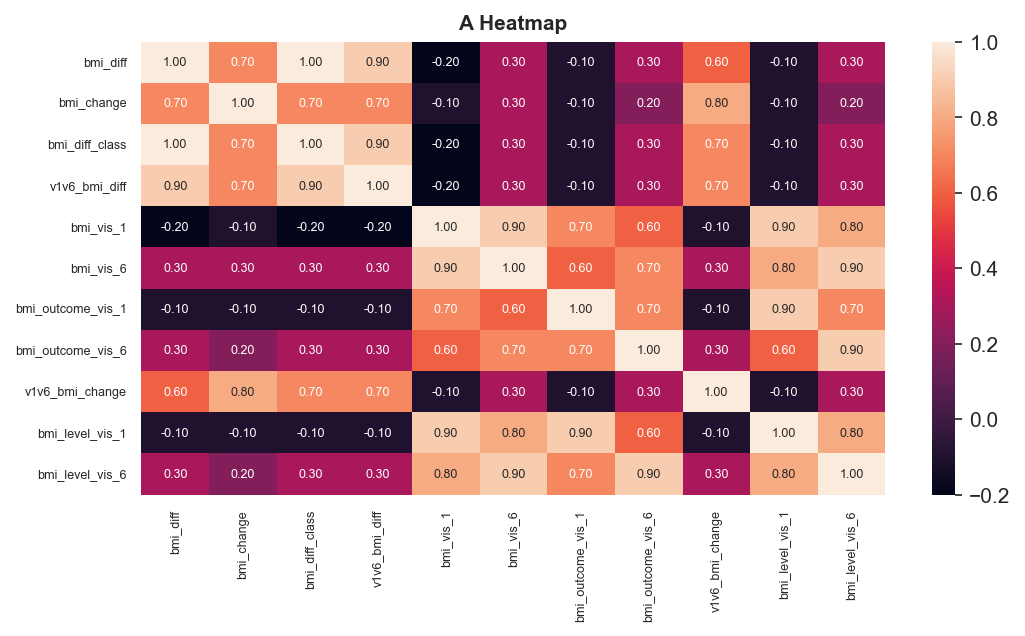

In [18]:
proj.plot_correl_heatmap(proj.get_columns_with_pattern(num_enrl, 'bmi'), precision=1)

### VARIABLE ANALYSIS PER  VISIT

In [19]:
df = pd.concat([control, manifest]).sample(frac=1).reset_index(drop=True)
df

subjid  ccdep  ccdepage  cccog  cccogage  ccapt  ccaptage  ccmtr  \
0    R354236975      1      47.0      1      50.0      1      49.0      1   
1    R695316214      0       0.0      1      63.0      0       0.0      1   
2    R540426144      1       0.0      0       0.0      0       0.0      1   
3    R006447613      0       0.0      0       0.0      0       0.0      1   
4    R457433110      1      40.0      1      31.0      1      54.0      1   
..          ...    ...       ...    ...       ...    ...       ...    ...   
861  R372440627      1      50.0      1      62.0      1      57.0      1   
862  R98290549X      1       0.0      0       0.0      0       0.0      1   
863  R533213434      0       0.0      0       0.0      1      50.0      1   
864  R991644661      1      18.0      0       0.0      0       0.0      1   
865  R405321238      1       0.0      0       0.0      0       0.0      1   

     ccmtrage  study_timeyr  bmi_diff  bmi_change  bmi_diff_class  \
0        46.0           5.1      -2.6        -1.0              27   
1        60.0           5.1      -0.5        -1.0              29   
2         0.0           5.6       1.8         1.0              31   
3        51.0           6.1      -0.3        -1.0              29   
4        37.0           4.7      -1.9        -1.0              28   
..        ...           ...       ...         ...             ...   
861      50.0           6.0      -2.5        -1.0              27   
862       0.0           6.1      -1.2        -1.0              28   
863      47.0           4.8      -1.1        -1.0              28   
864      33.0           5.0      -5.8        -1.0              24   
865       0.0           5.9       1.0         1.0              31   

      bmi_diff_band  baseline_age_above29  visitnum          hd_status0  \
0    [-3.0 to -2.0)                     1         6         3. manifest   
1     [-1.0 to 0.0)                     1         6         3. manifest   
2      [1.0 to 2.0)                     1         6  5. family controls   
3     [-1.0 to 0.0)                     1         7         3. manifest   
4    [-2.0 to -1.0)                     1         6         3. manifest   
..              ...                   ...       ...                 ...   
861  [-3.0 to -2.0)                     1         7         3. manifest   
862  [-2.0 to -1.0)                     1         6  5. family controls   
863  [-2.0 to -1.0)                     1         6         3. manifest   
864  [-6.0 to -5.0)                     1         6         3. manifest   
865    [1.0 to 2.0)                     1         7  5. family controls   

     baseline_manifest_hd  is_high_calorie  treated_chorea  tetrabenazine_use  \
0                       1                0               1                  0   
1                       1                0               0                  0   
2                       0                0               0                  0   
3                       1                0               0                  0   
4                       1                0               1                  0   
..                    ...              ...             ...                ...   
861                     1                0               0                  0   
862                     0                0               0                  0   
863                     1                0               0                  0   
864                     1                0               1                  1   
865                     0                0               0                  0   

     received_swallowing_therapy  had_gi_illness  is_male  caglow_num  \
0                              0               1        1          23   
1                              0               0        0          17   
2                              0               0        0          17   
3                              0               0        1          17   
4               

['0. underweight',
 '1. normal',
 '2. overweight',
 '3. obese',
 '4. severely obese']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'CAG Length per Participant Category'}, xlabel='Participant Category', ylabel='CAG length'>

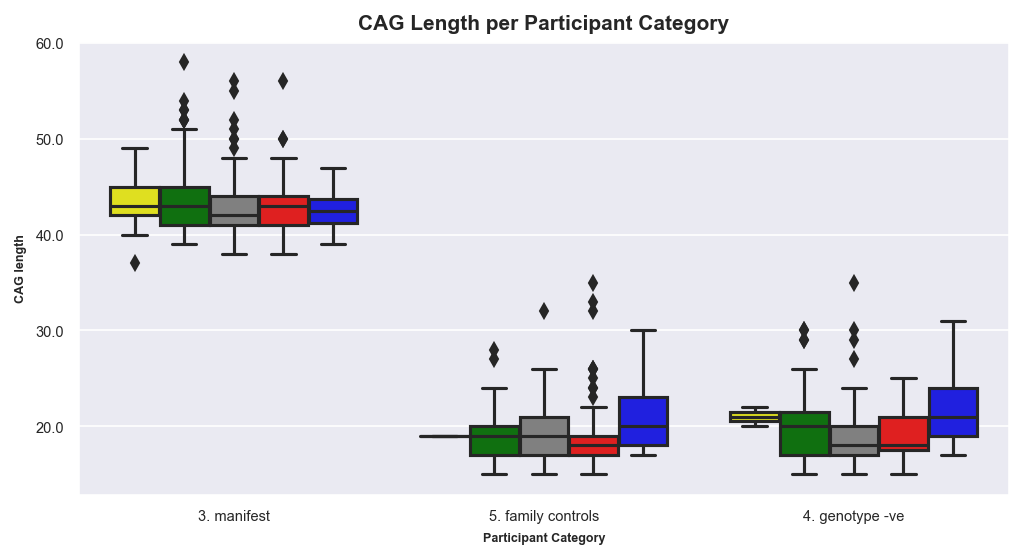

In [20]:
order = sorted([c for c in df['bmi_level_vis_1'].unique()])
display(order)
proj.plot_box(x=df['hd_status_vis_1'], y=df['caghigh_num'], condition_on=df['bmi_level_vis_1'],
              plot_title='CAG Length per Participant Category', title_size=10,
              y_labe='CAG length', x_labe='Participant Category',
             orientation='v', paletter=proj.bmi_level_cmap, condition_order=order)

['0. underweight',
 '1. normal',
 '2. overweight',
 '3. obese',
 '4. severely obese']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'CAG Length per Participant Category'}, xlabel='CAG Band', ylabel='CAG length'>

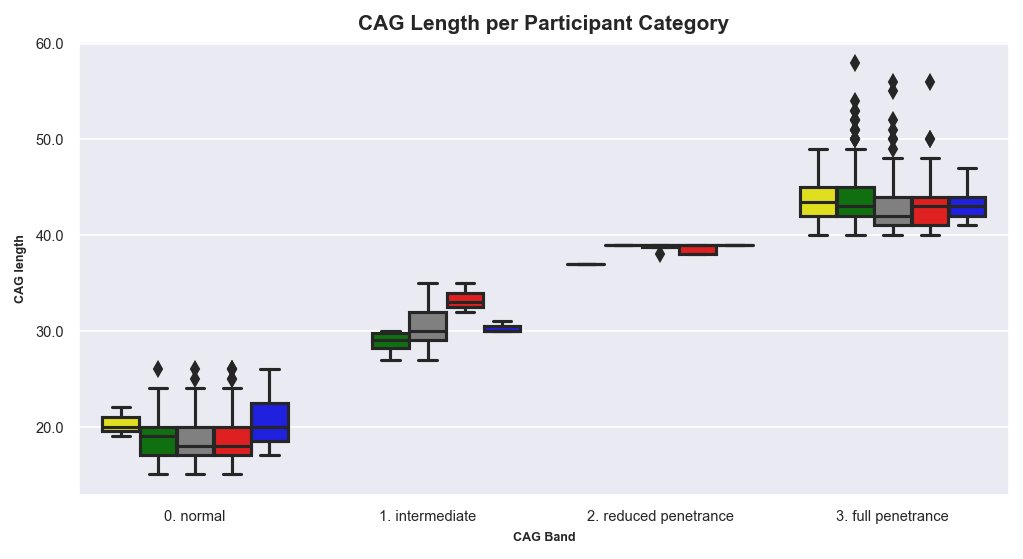

In [21]:
order = sorted([c for c in df['bmi_level_vis_1'].unique()])
x_order = sorted([labe for labe in df['caghigh_band'].unique()])
display(order)
proj.plot_box(x=df['caghigh_band'], y=df['caghigh_num'], condition_on=df['bmi_level_vis_1'],
              plot_title='CAG Length per Participant Category', title_size=10,
              y_labe='CAG length', x_labe='CAG Band',
             orientation='v', x_labe_order=x_order, paletter=proj.bmi_level_cmap, condition_order=order)

behaviour_score_vis_1


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

behaviour_score_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

chorea_score_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

chorea_score_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

cognitive_score_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

cognitive_score_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fascore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fascore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fiscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fiscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

independent_feeding_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

independent_feeding_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

indepscl_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

indepscl_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

miscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

miscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

motscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

motscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

tfcscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

tfcscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


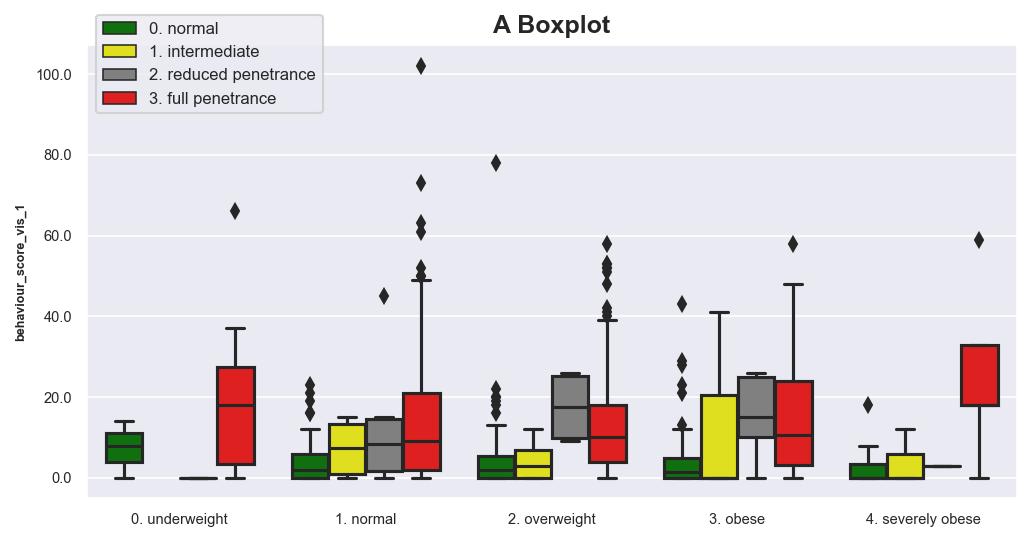

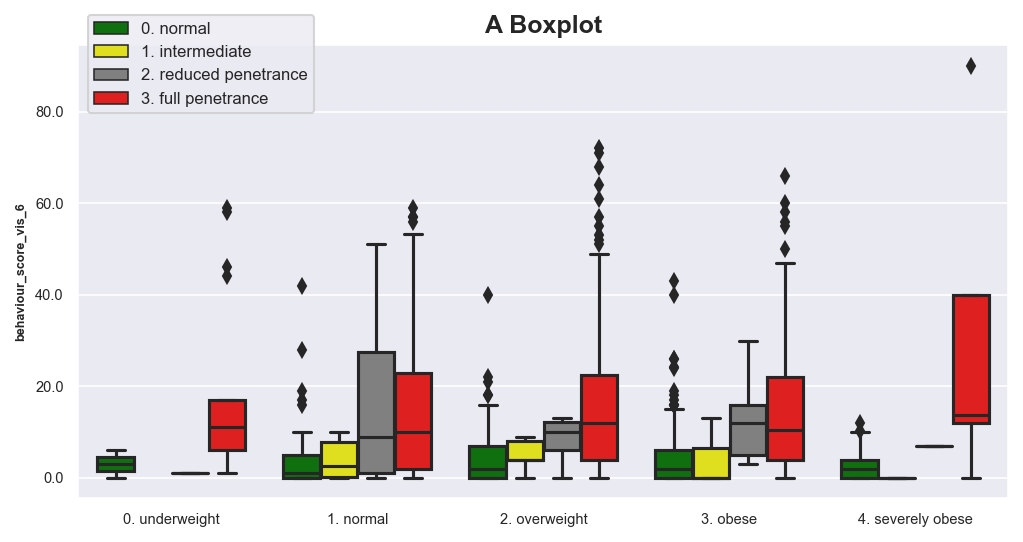

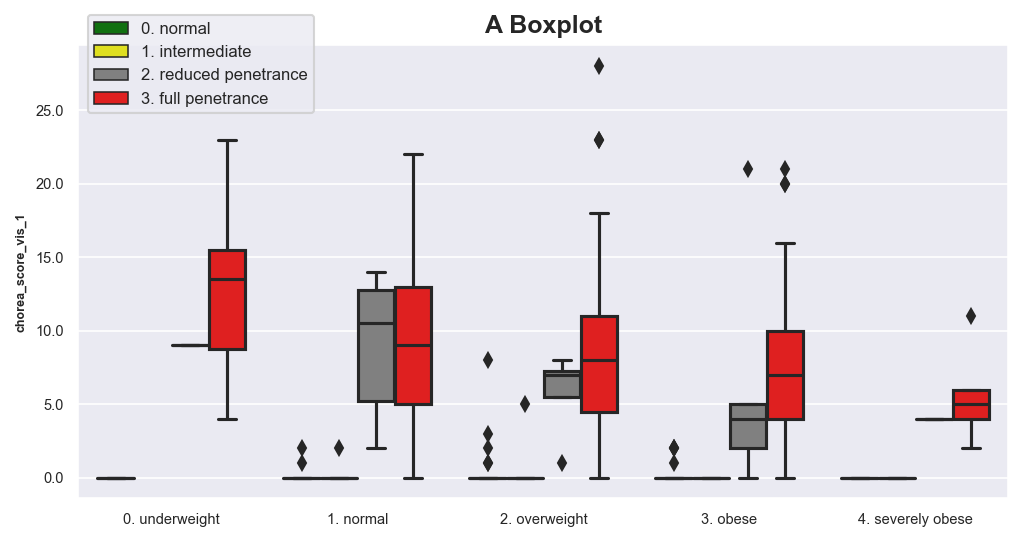

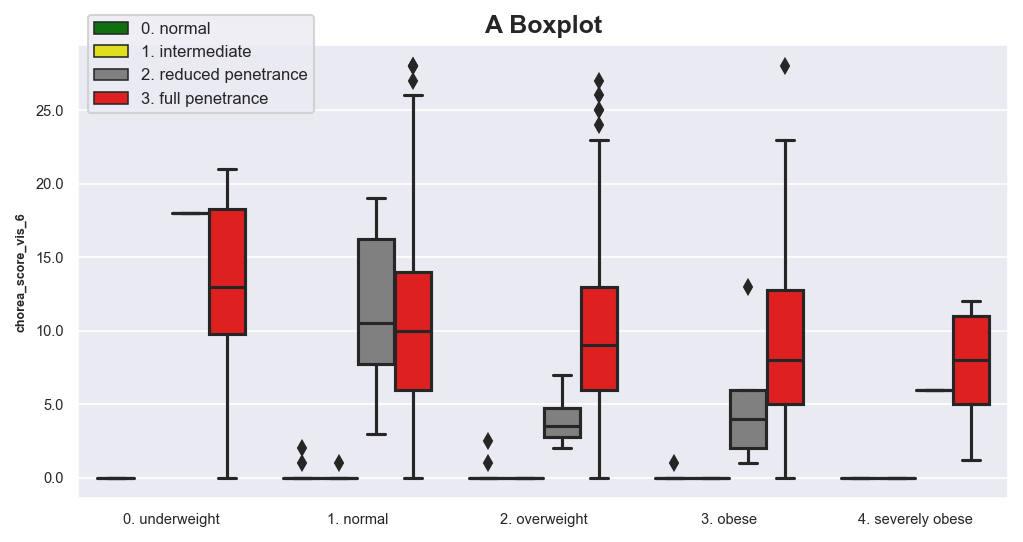

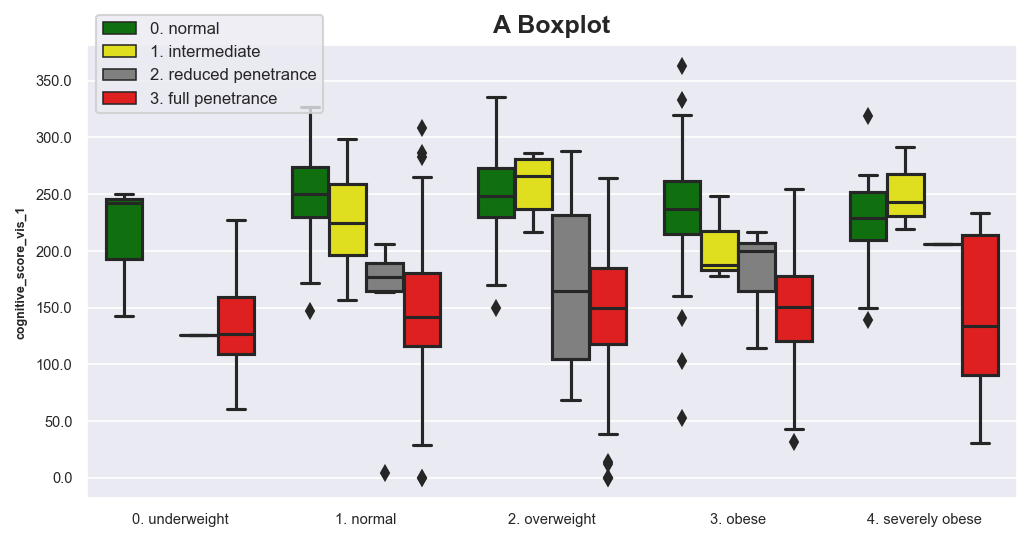

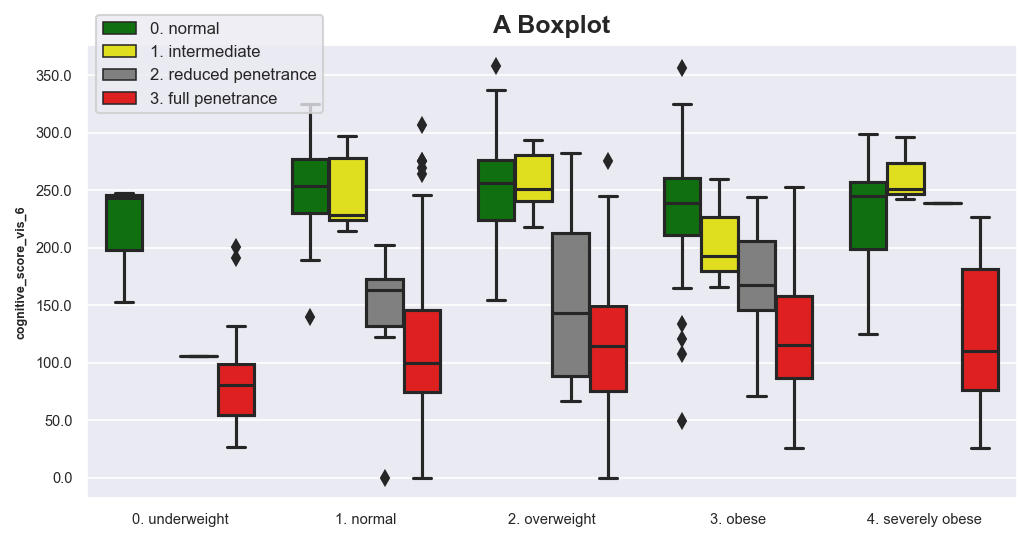

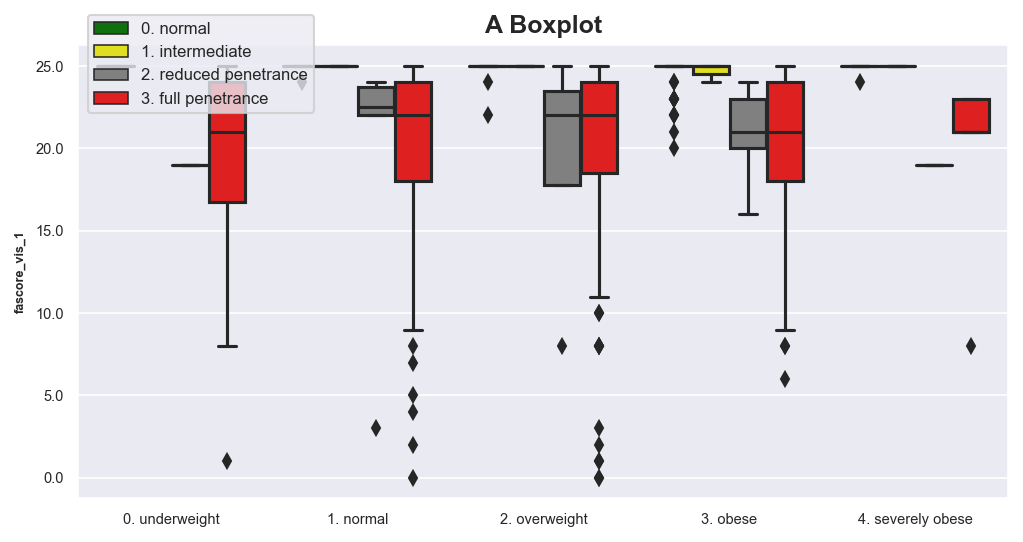

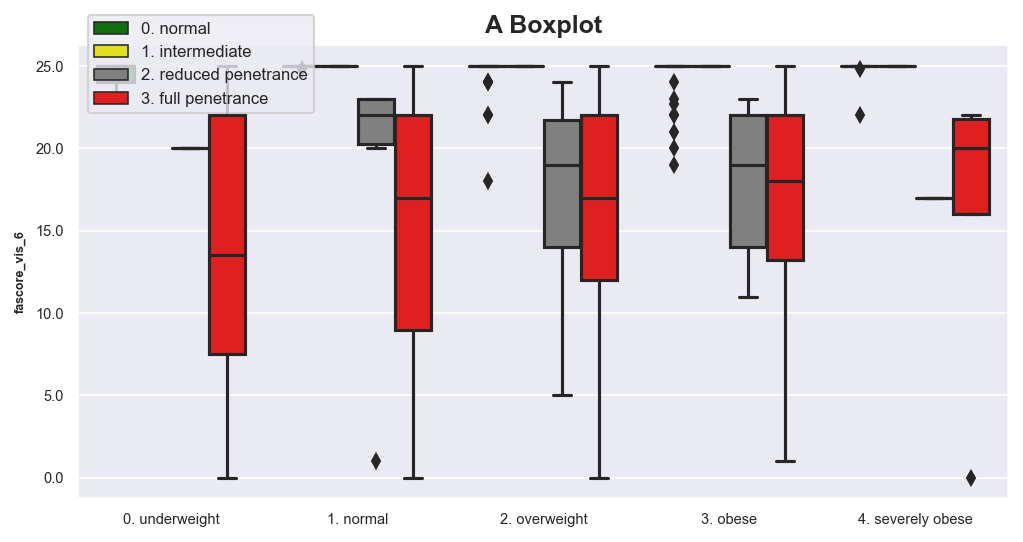

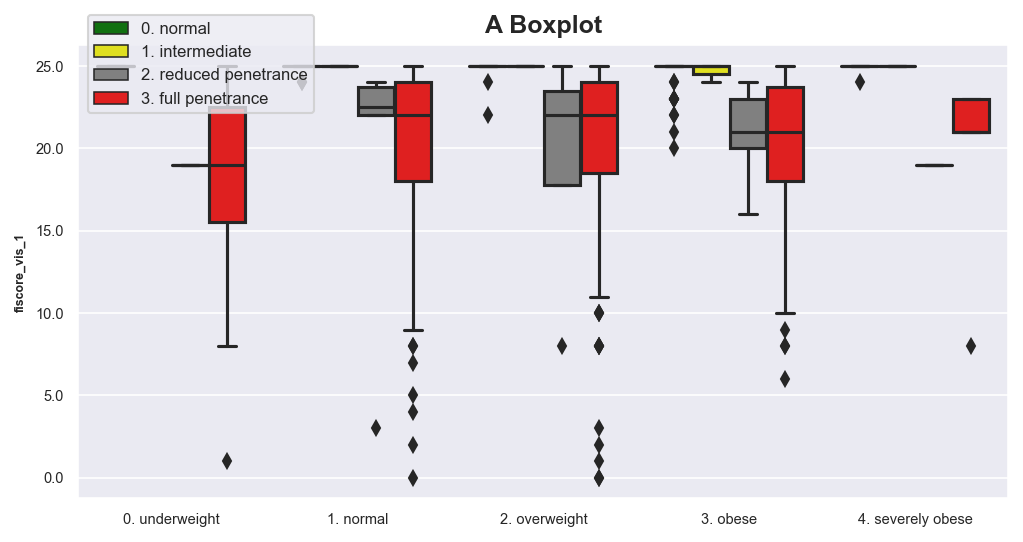

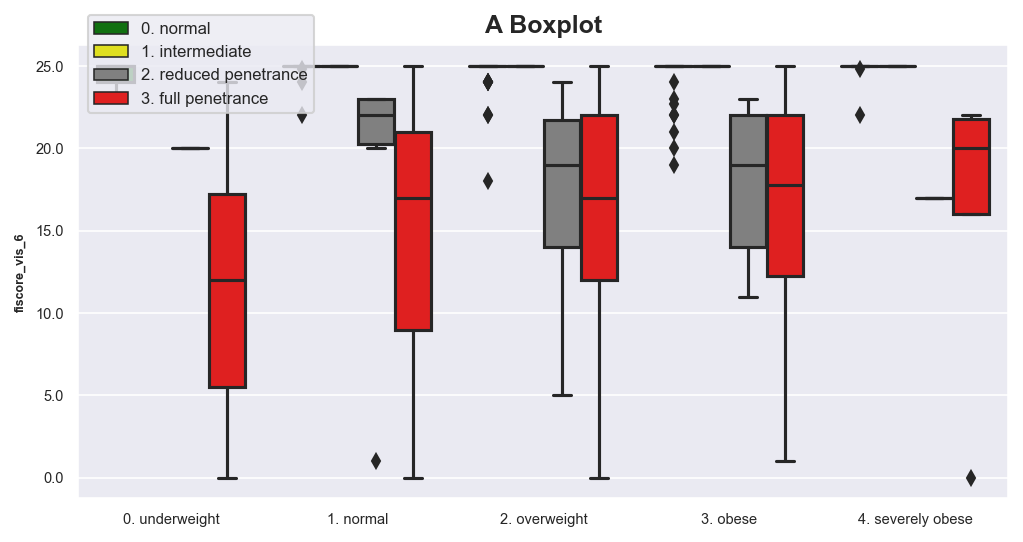

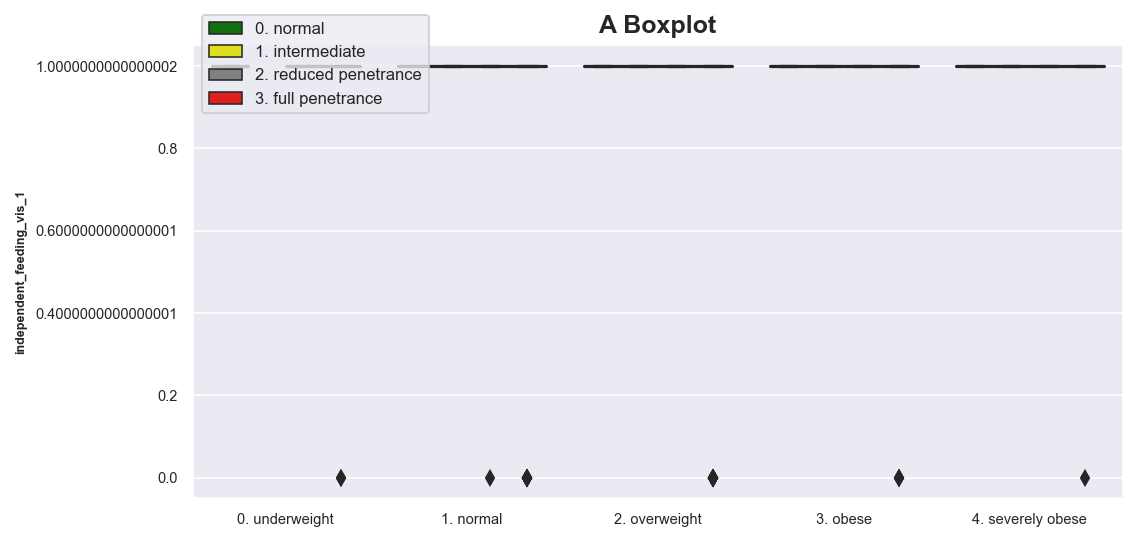

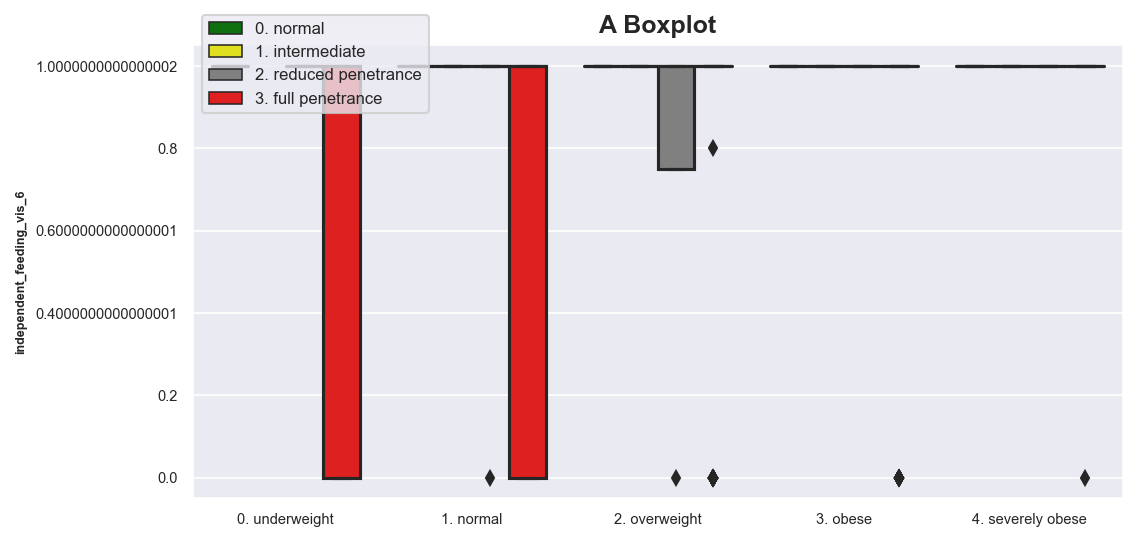

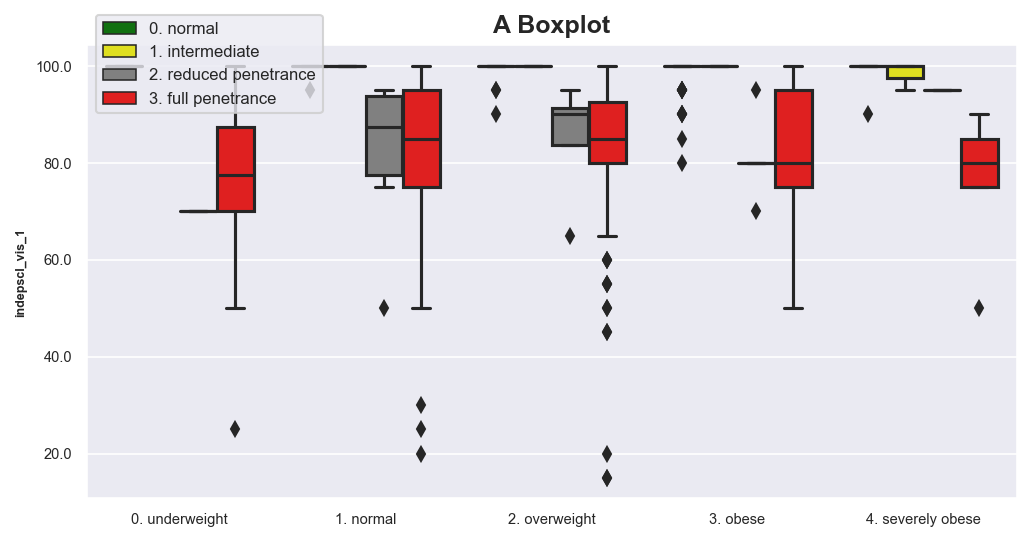

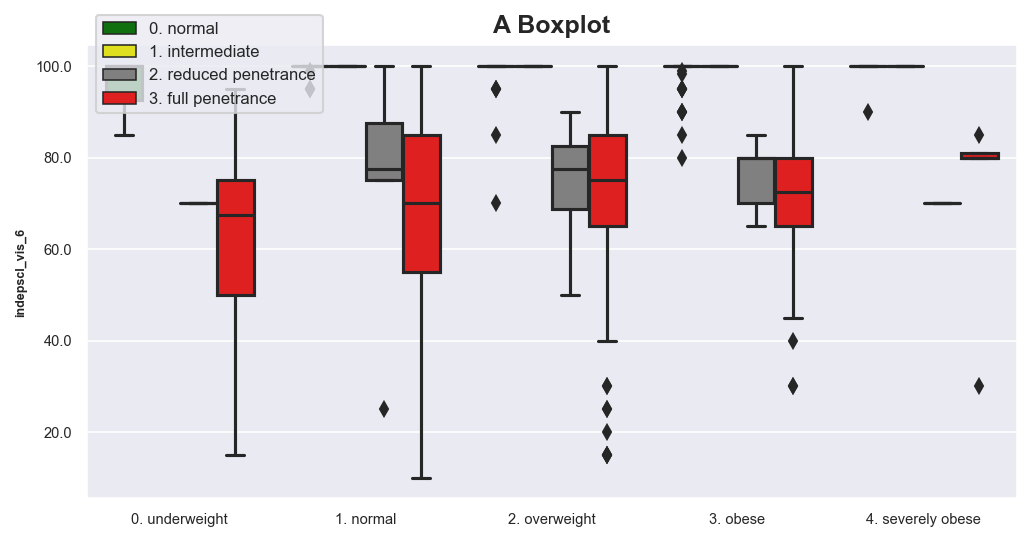

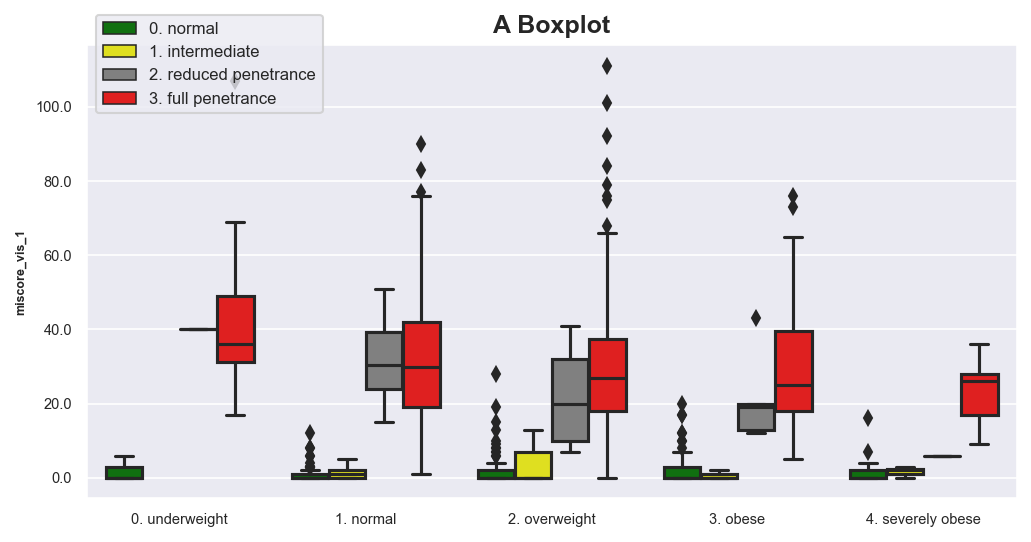

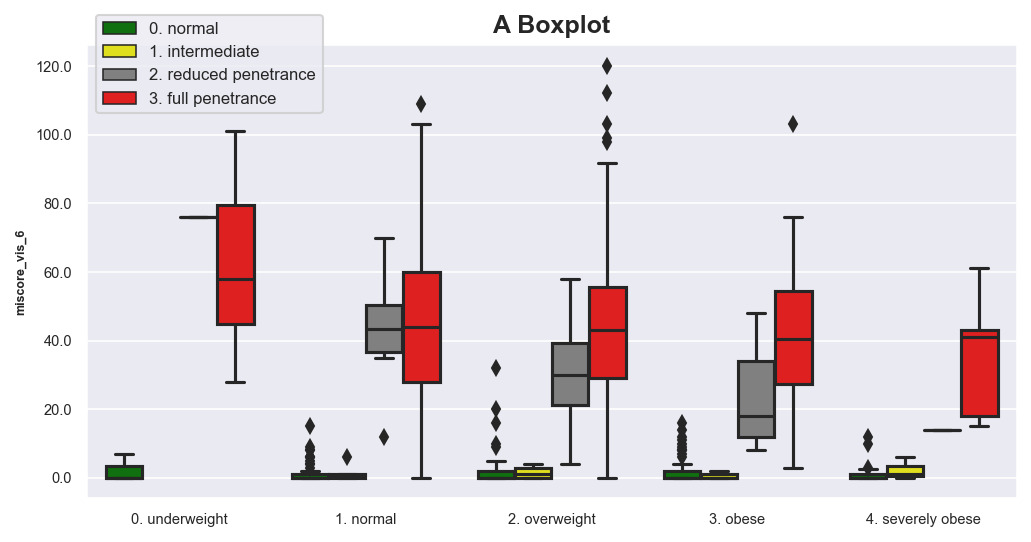

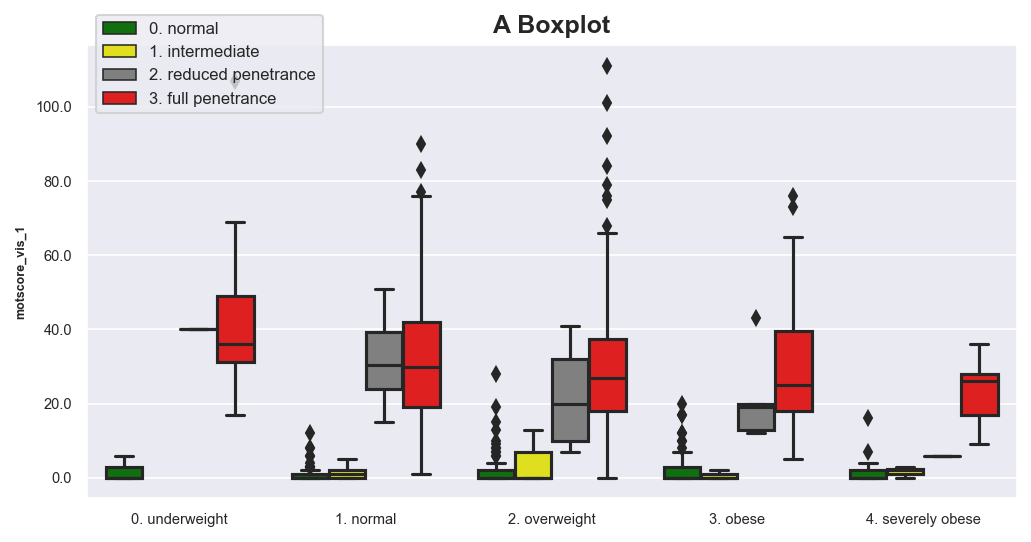

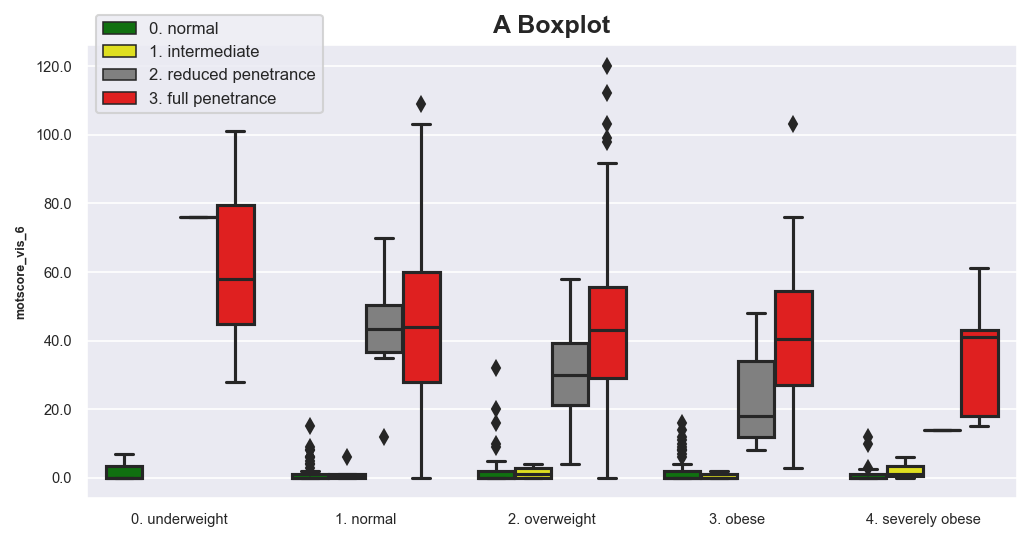

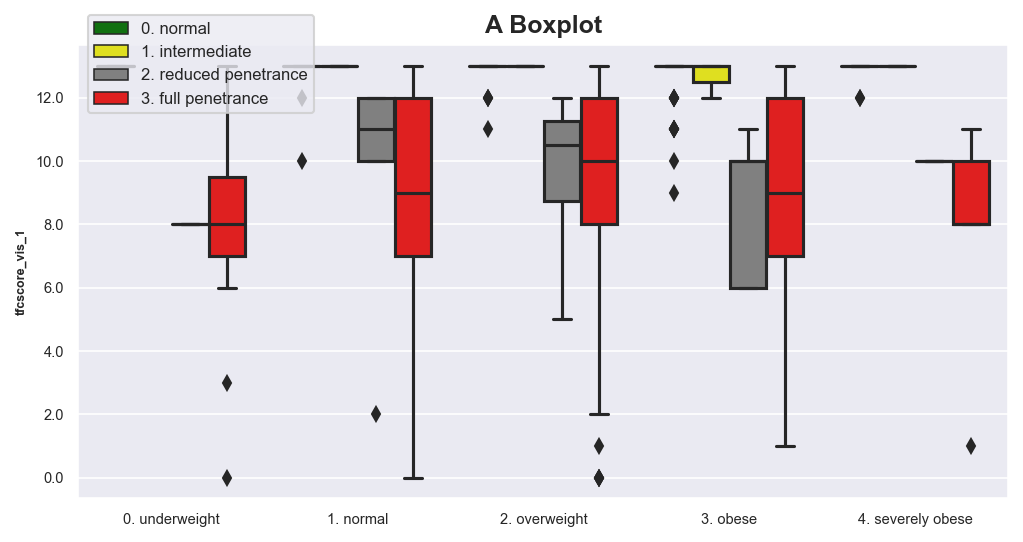

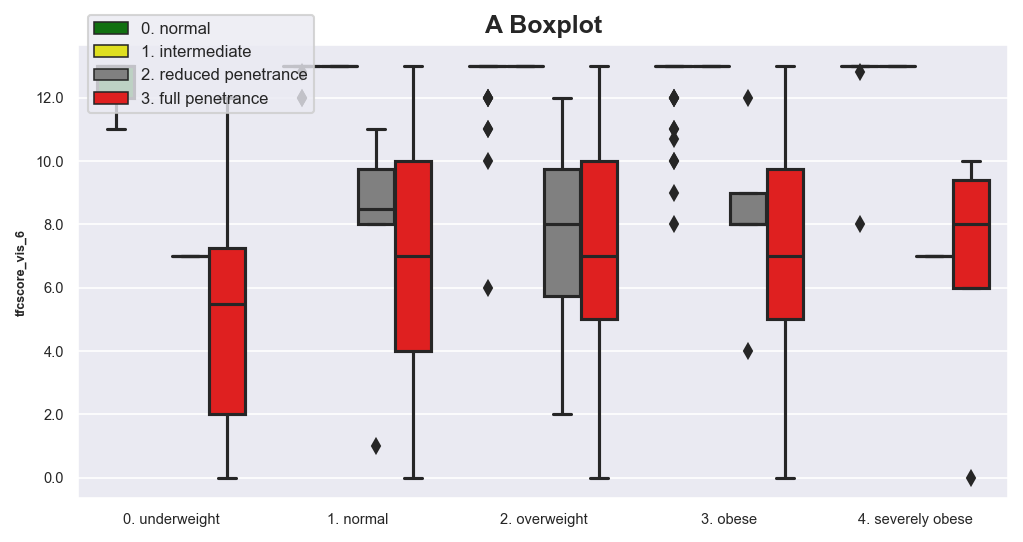

In [22]:
for col in proj.get_columns_with_pattern(df, ['score', 'indep']):
    print(col)
    cols = ['bmi_level_vis_1', col, 'caghigh_band']
    order = sorted([c for c in df[cols[-1]].unique()])
    x_order = sorted([labe for labe in df[cols[0]].unique()])
    display(order)
    proj.plot_box(x=df[cols[0]], y=df[cols[1]], condition_on=df[cols[-1]],
                 orientation='v', x_labe_order=x_order, paletter=proj.cagrepeat_band_cmap,
                  y_labe=col,
                  condition_order=order, show_legend_at=[0.01, 0.85])

behaviour_score_vis_1


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

behaviour_score_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

chorea_score_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

chorea_score_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

cognitive_score_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

cognitive_score_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fascore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fascore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fiscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

fiscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

independent_feeding_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

independent_feeding_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

indepscl_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

indepscl_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

miscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

miscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

motscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

motscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

tfcscore_vis_1


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

tfcscore_vis_6


W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2336: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), fontdict={'fontsize':xy_ticksize})


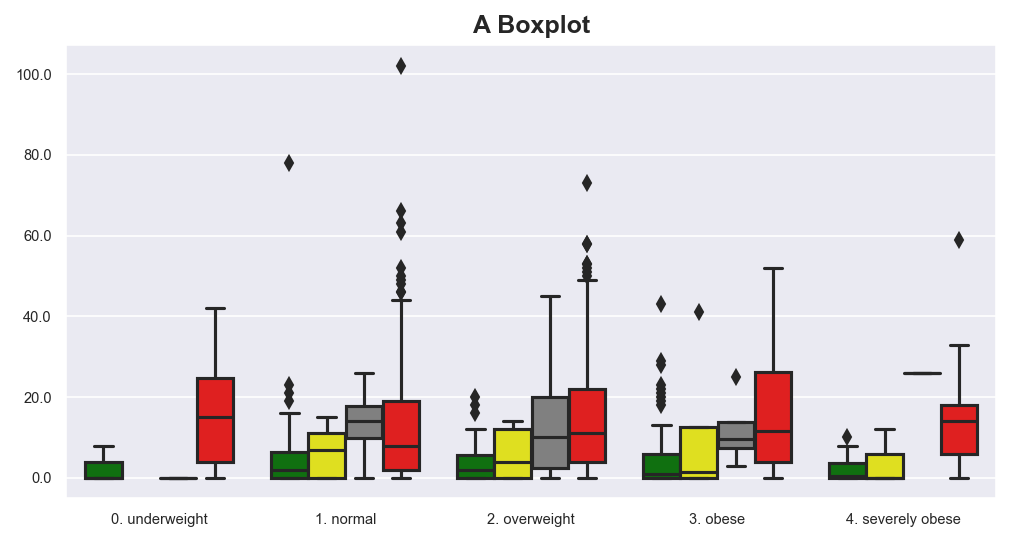

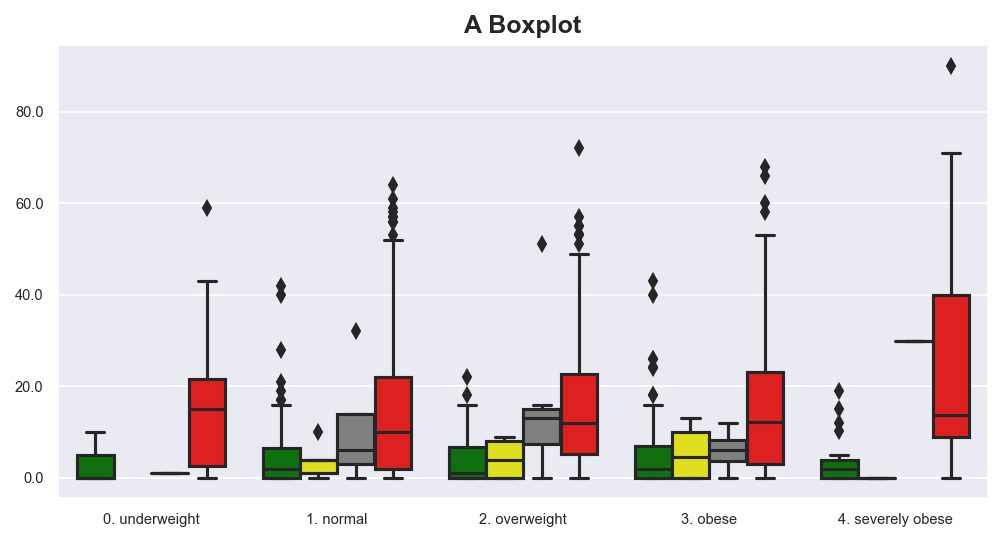

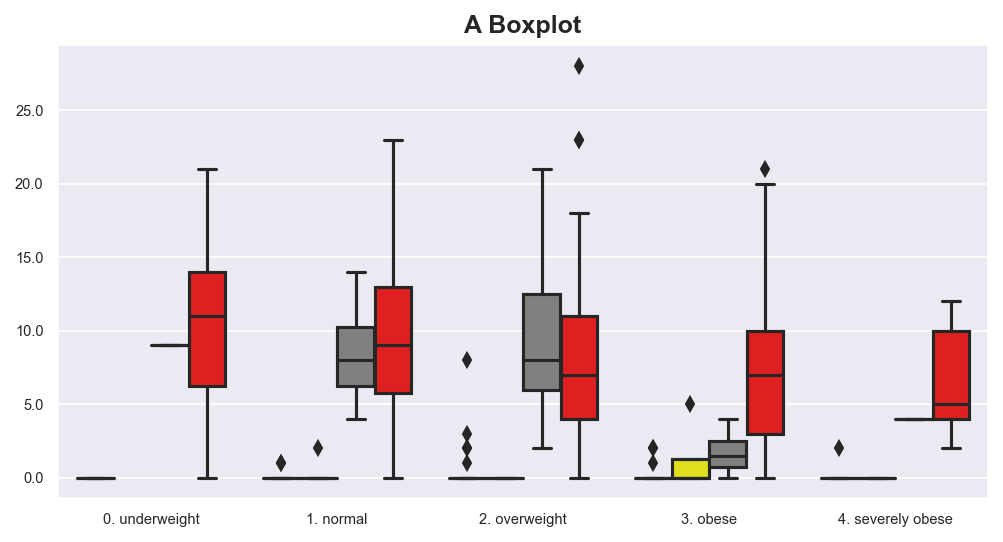

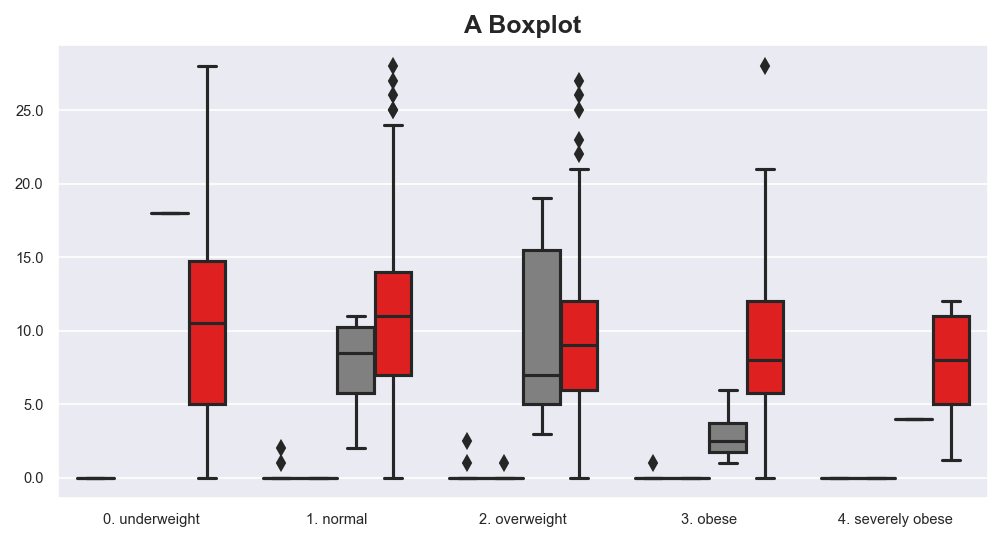

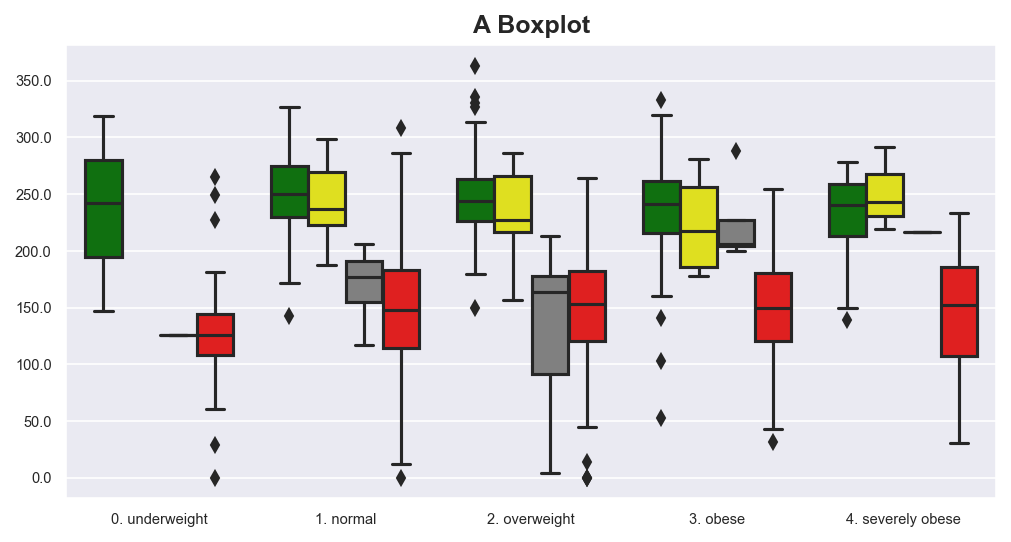

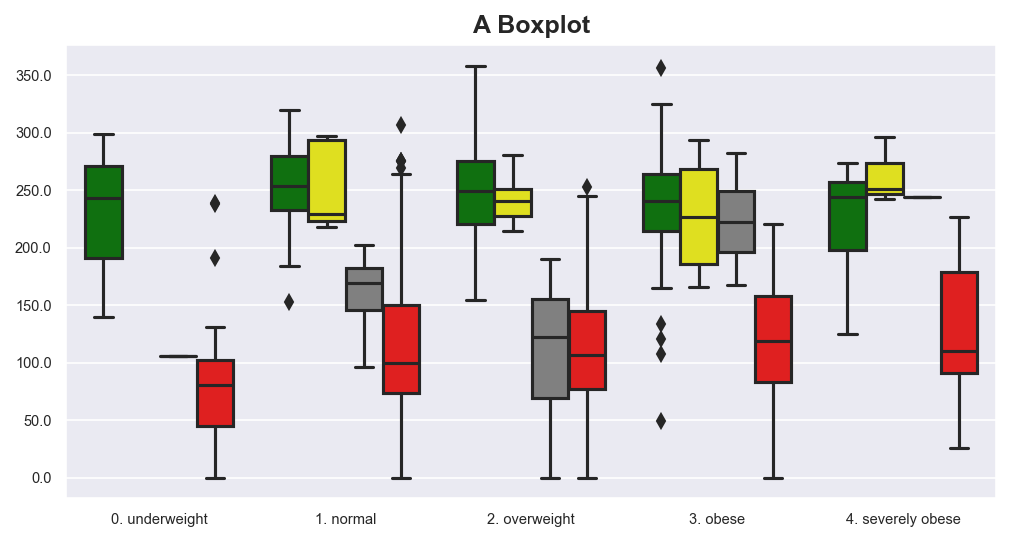

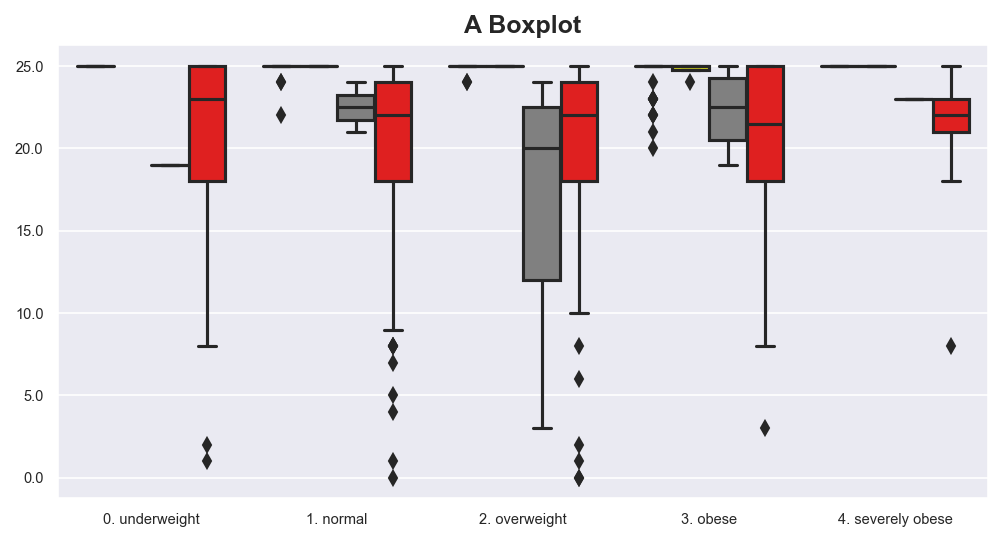

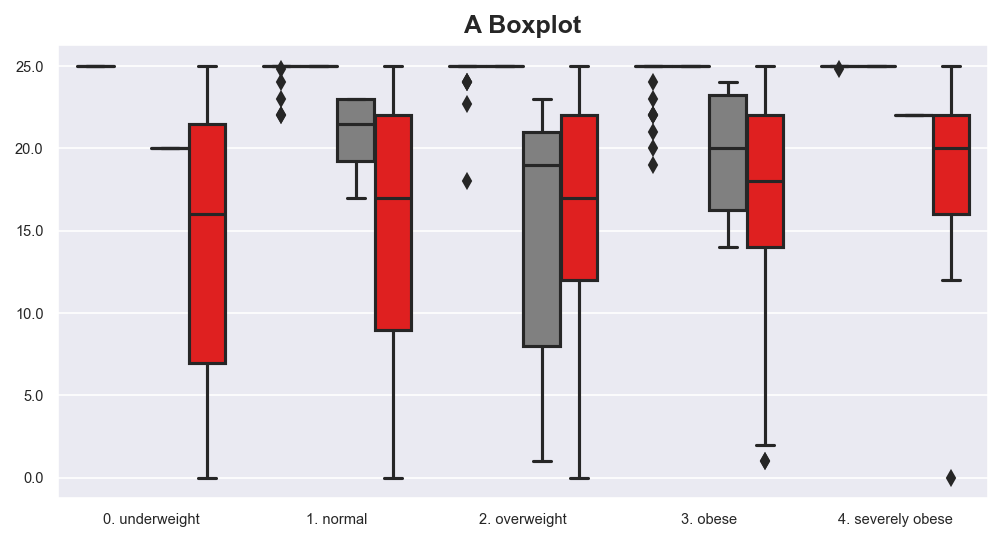

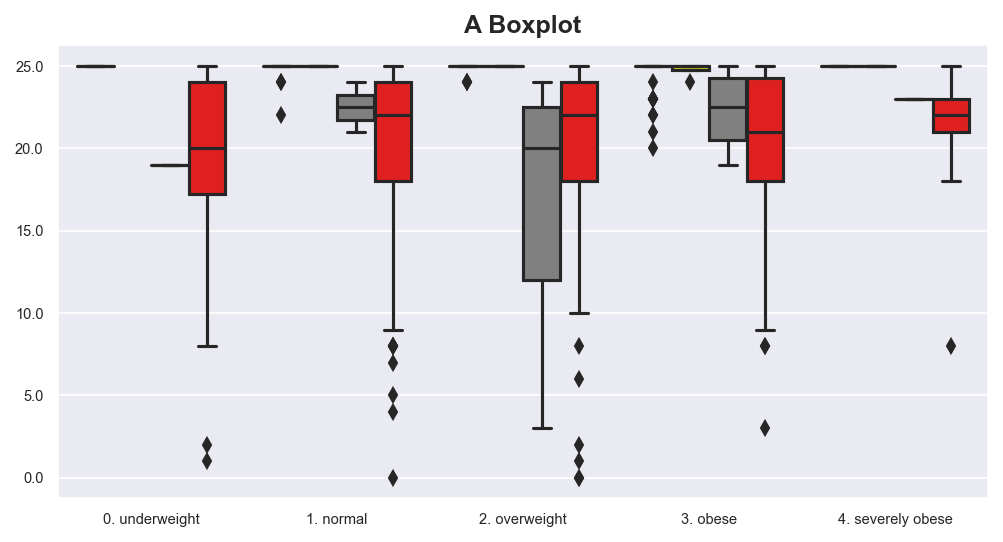

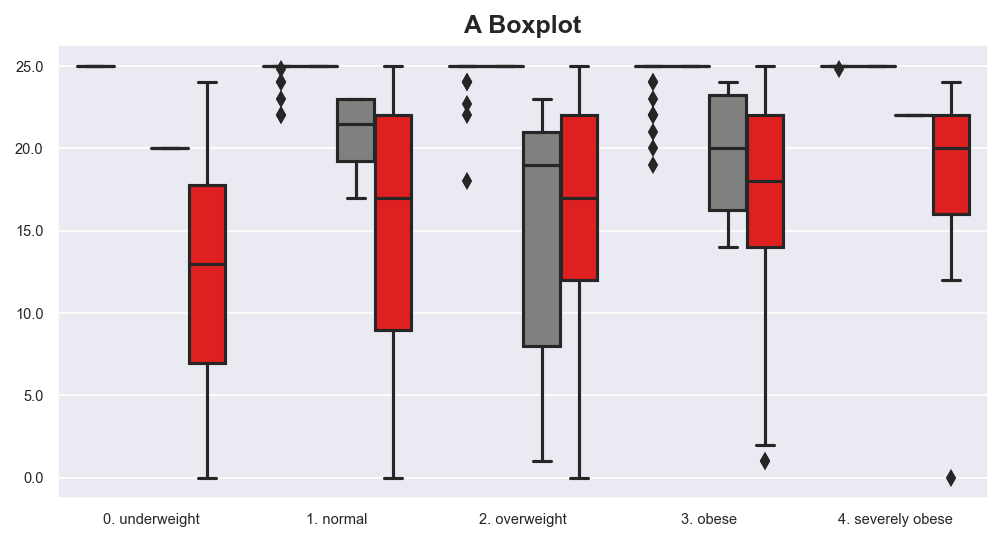

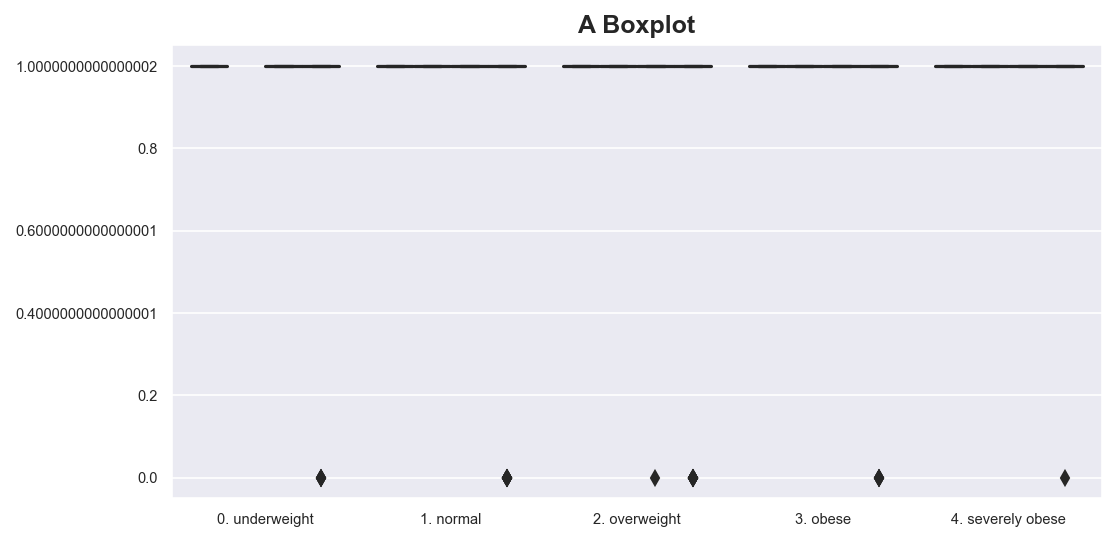

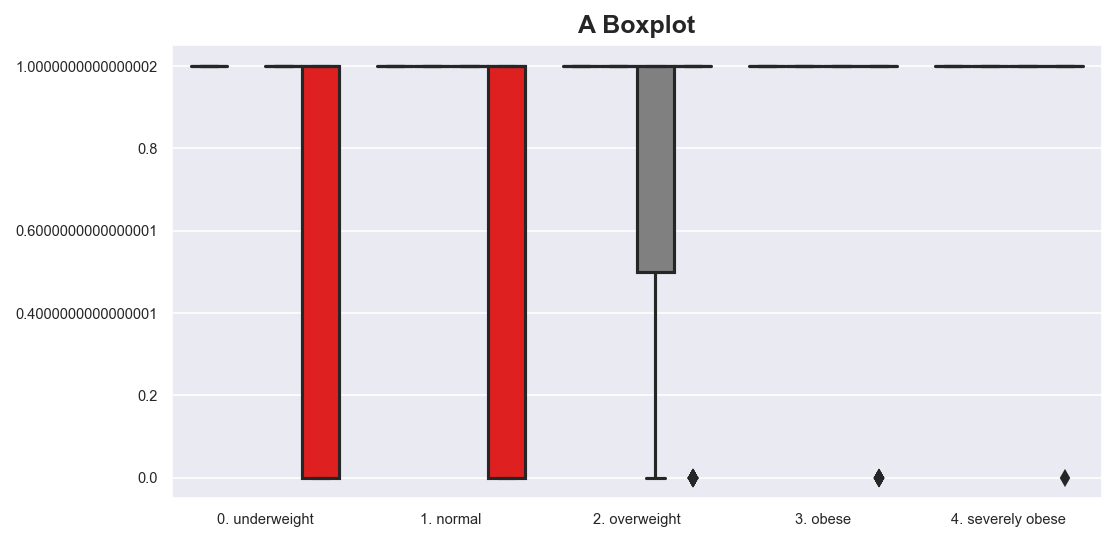

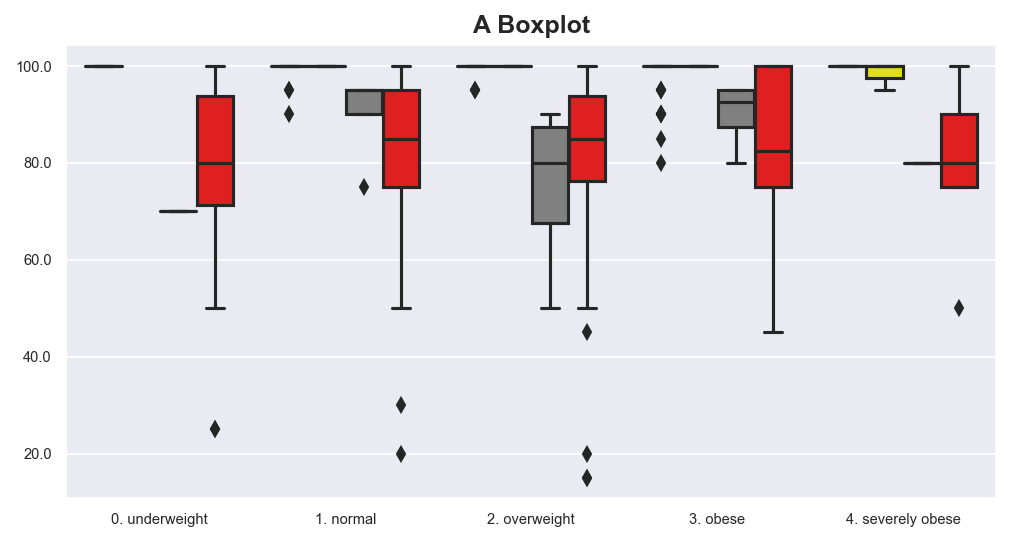

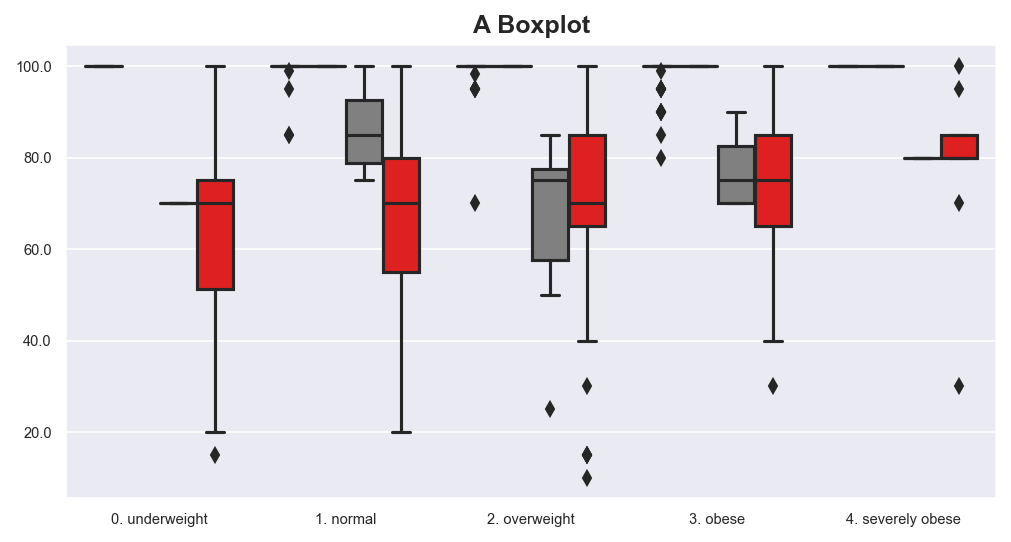

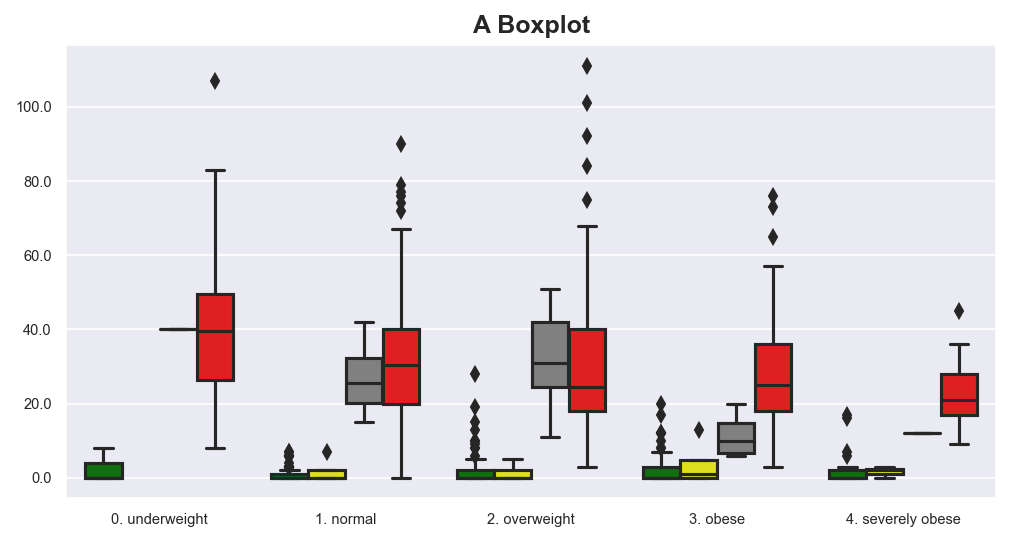

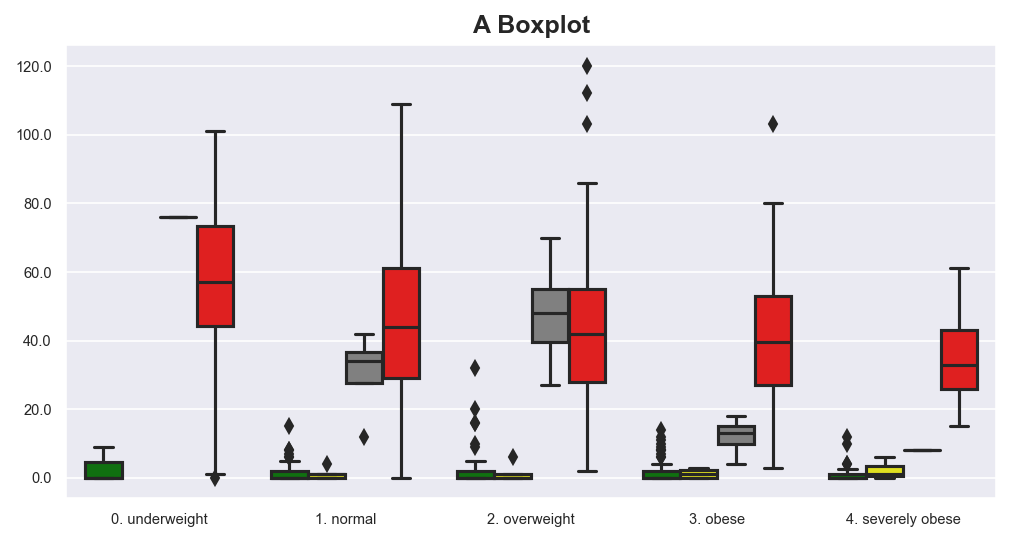

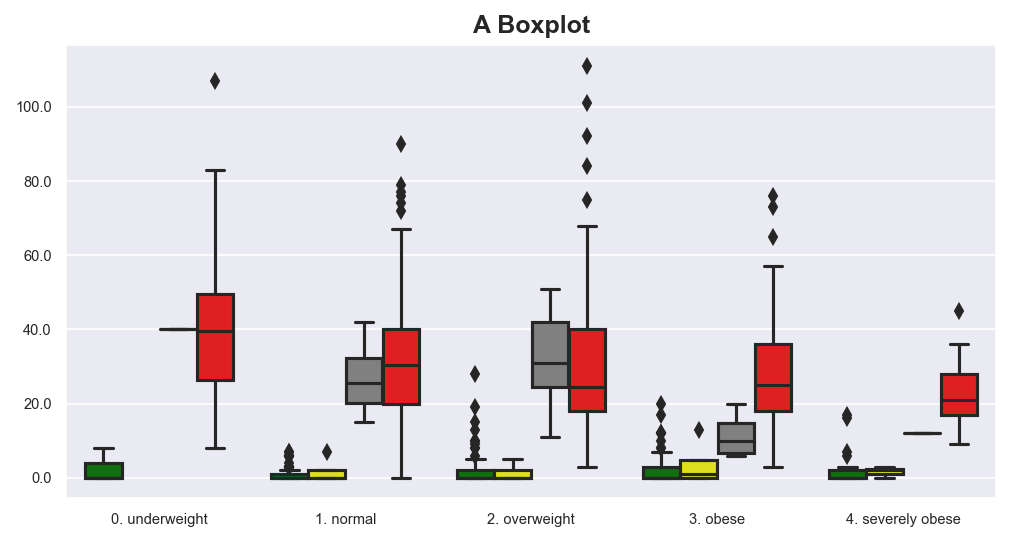

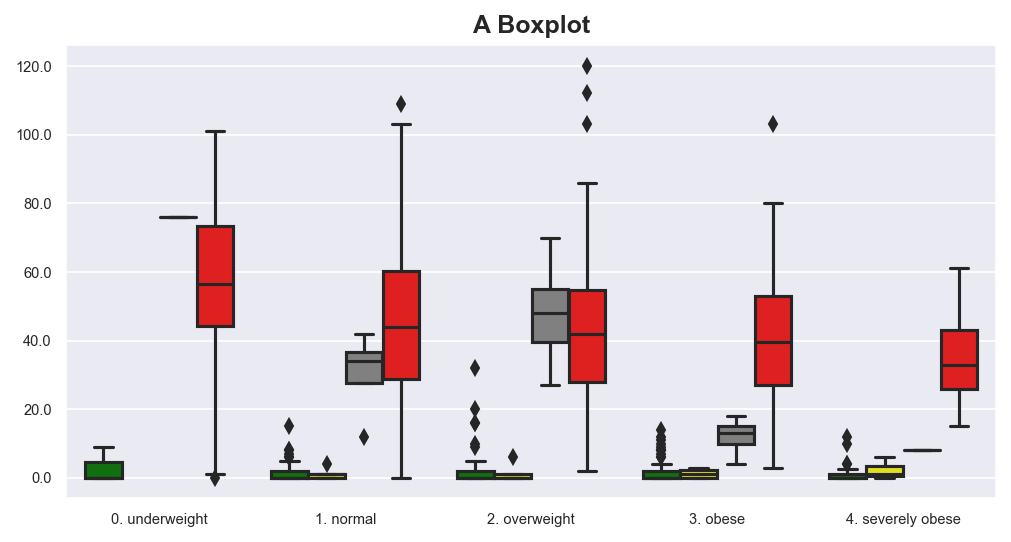

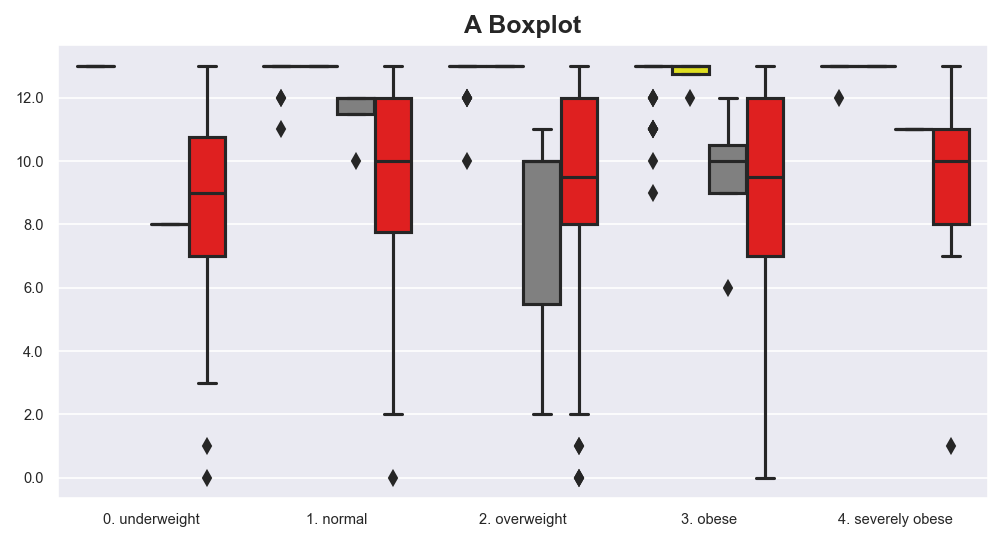

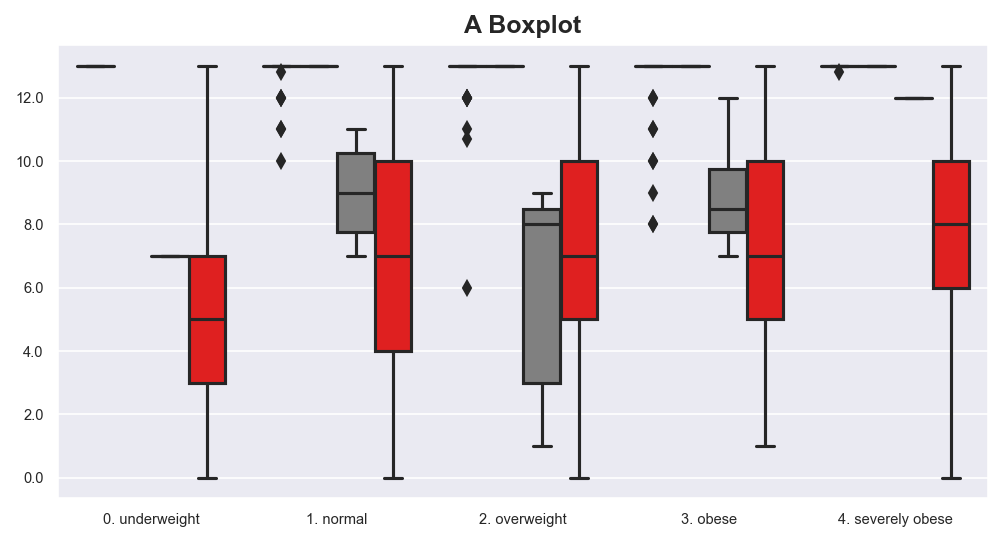

In [23]:
for col in proj.get_columns_with_pattern(df, ['score', 'indep']):
    print(col)
    cols = ['bmi_level_vis_6', col, 'caghigh_band']
    order = sorted([c for c in df[cols[-1]].unique()])
    x_order = sorted([labe for labe in df[cols[0]].unique()])
    display(order)
    proj.plot_box(x=df[cols[0]], y=df[cols[1]], condition_on=df[cols[-1]],
                 orientation='v', x_labe_order=x_order, paletter=proj.cagrepeat_band_cmap, condition_order=order)

### BMI Level

In [24]:
ctrl_freq = proj.get_columns_with_pattern(control,
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
display(mnf_freq)

0. underweight  1. normal  2. overweight  3. obese  \
bmi_level_vis_1               3         88            100       107   
bmi_level_vis_6               3         84            103       101   

                 4. severely obese visit  
bmi_level_vis_1                 22     1  
bmi_level_vis_6                 29     6

0. underweight  1. normal  2. overweight  3. obese  \
bmi_level_vis_1              21        245            183        91   
bmi_level_vis_6              31        268            153        84   

                 4. severely obese visit  
bmi_level_vis_1                  6     1  
bmi_level_vis_6                 10     6

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'BMI Level per Visit (Manifest)'}, xlabel='visit'>

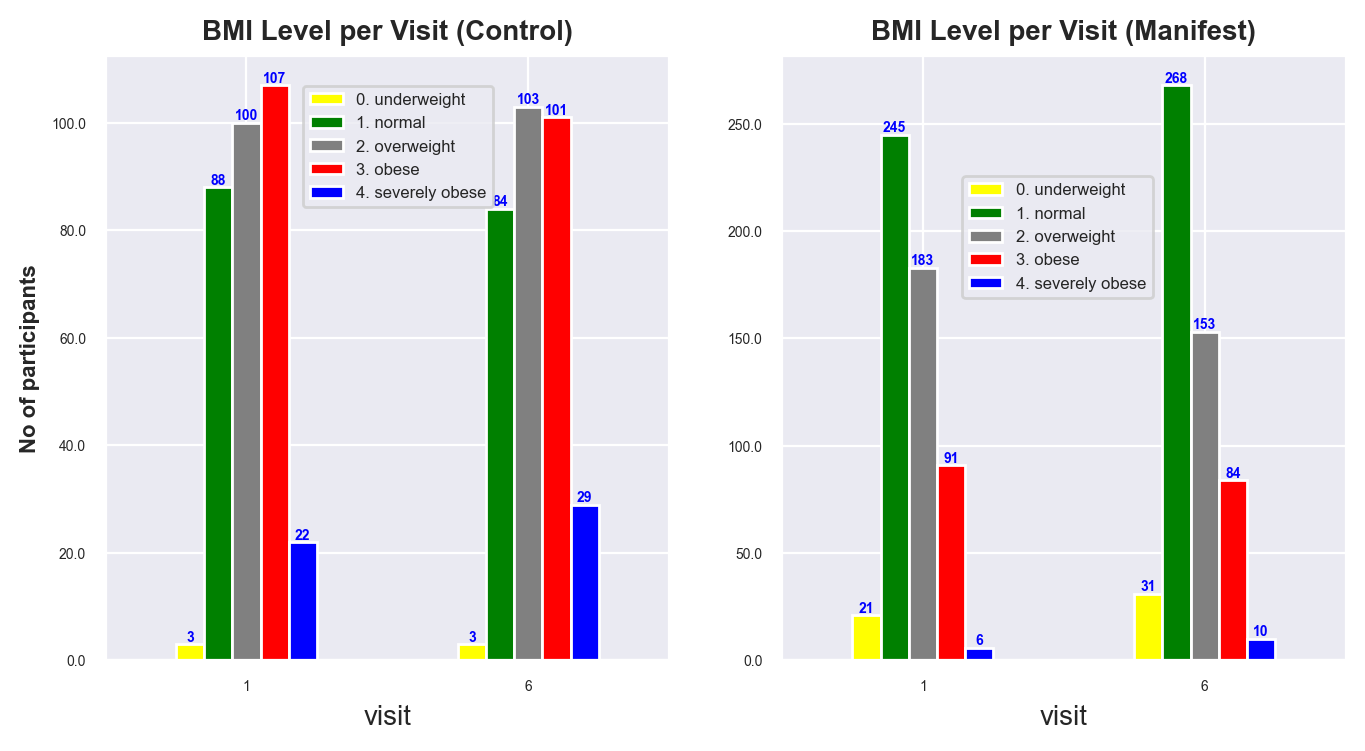

In [25]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.35, 0.75], legend_size=6)

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.32, 0.6], legend_size=6)

#### In Percentage

In [26]:
ctrl_freq = proj.get_columns_with_pattern(control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

visit  0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0     1             0.9       27.5           31.2      33.4                6.9
1     6             0.9       26.2           32.2      31.6                9.1

visit  0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0     1             3.8       44.9           33.5      16.7                1.1
1     6             5.7       49.1           28.0      15.4                1.8

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%BMI Level per Visit (Manifest)'}, xlabel='visit'>

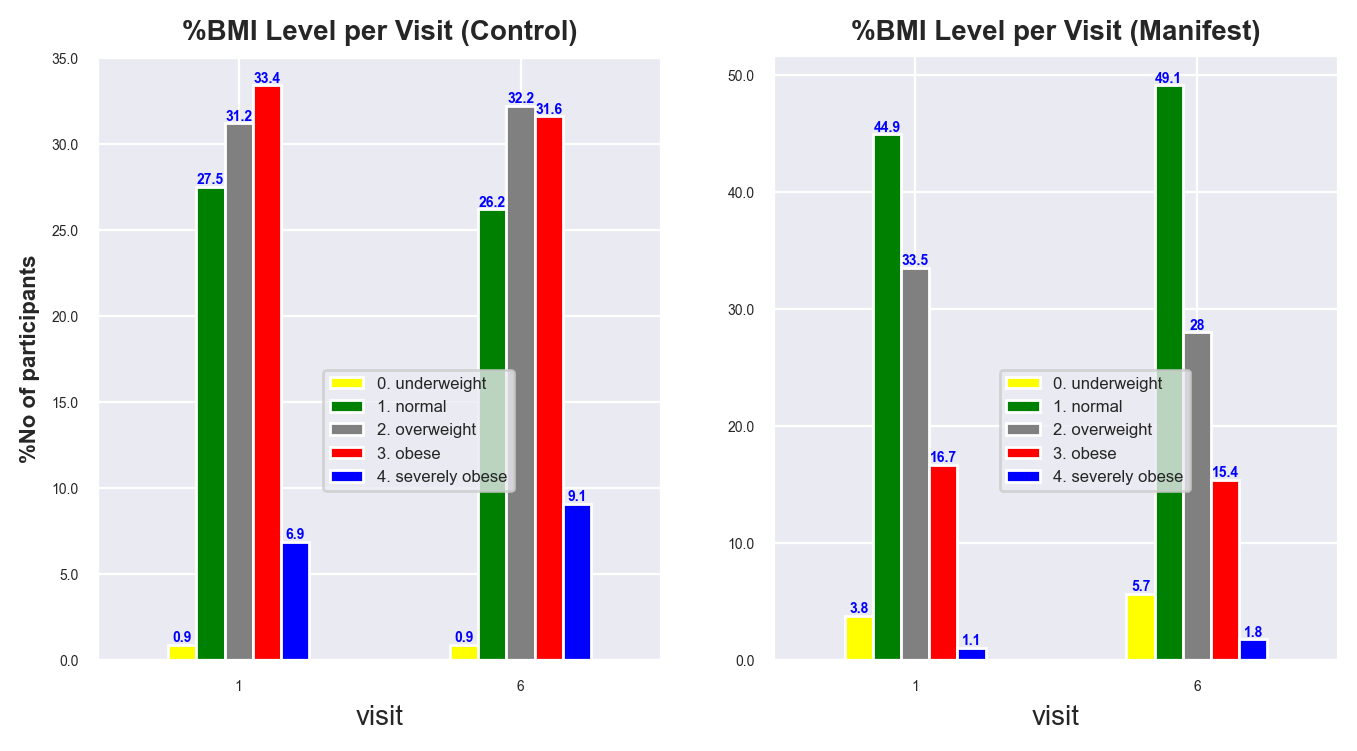

In [27]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28], legend_size=6)

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28], legend_size=6)

#### Gender Effect

In [28]:
# male pps
ctrl_freq = proj.get_columns_with_pattern(male_control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
# ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(male_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
# mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

1. normal  2. overweight  3. obese  4. severely obese visit
bmi_level_vis_1         22             44        45                  4     1
bmi_level_vis_6         17             49        44                  5     6

0. underweight  1. normal  2. overweight  3. obese  \
bmi_level_vis_1               4        120            119        41   
bmi_level_vis_6              13        138             95        37   

                 4. severely obese visit  
bmi_level_vis_1                  2     1  
bmi_level_vis_6                  3     6

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

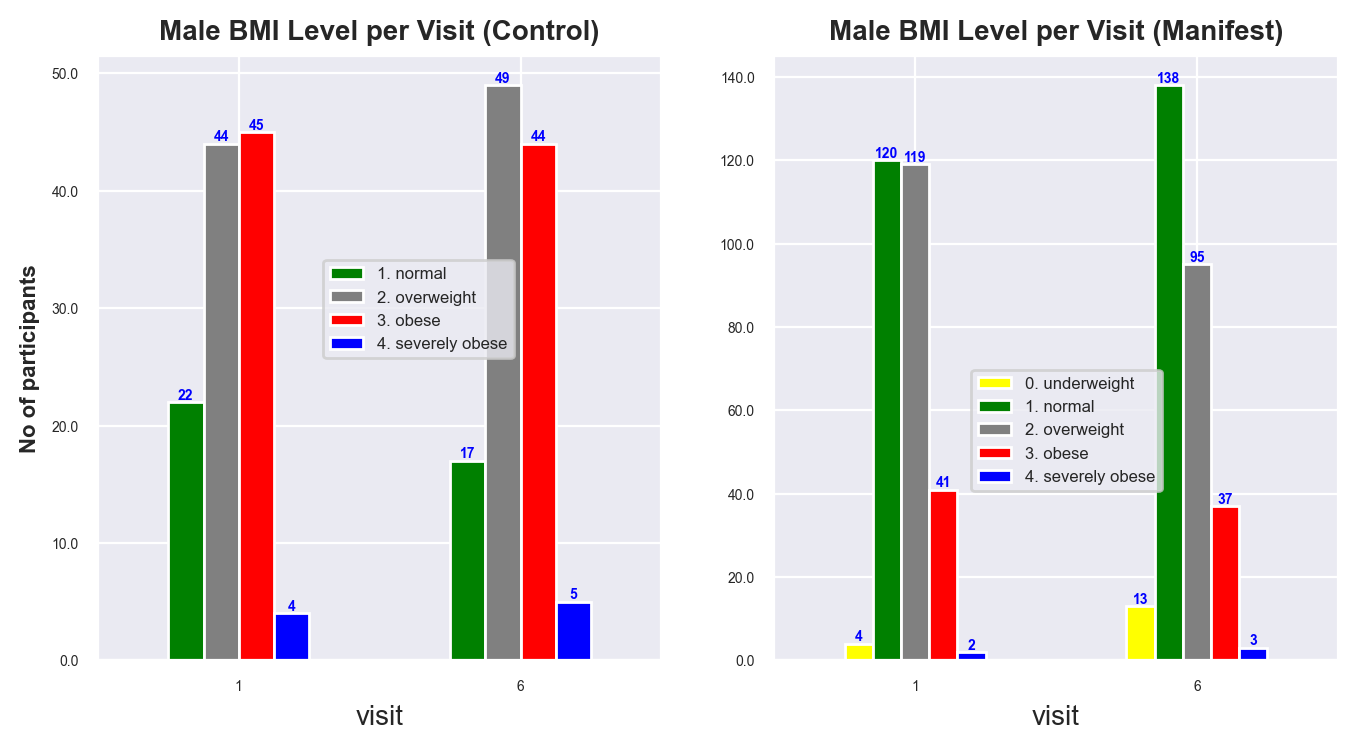

In [29]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.5], legend_size=6)

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='Male BMI Level per Visit (Manifest)', title_size=10, 
                 show_legend_at=[0.35, 0.28], legend_size=6)

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

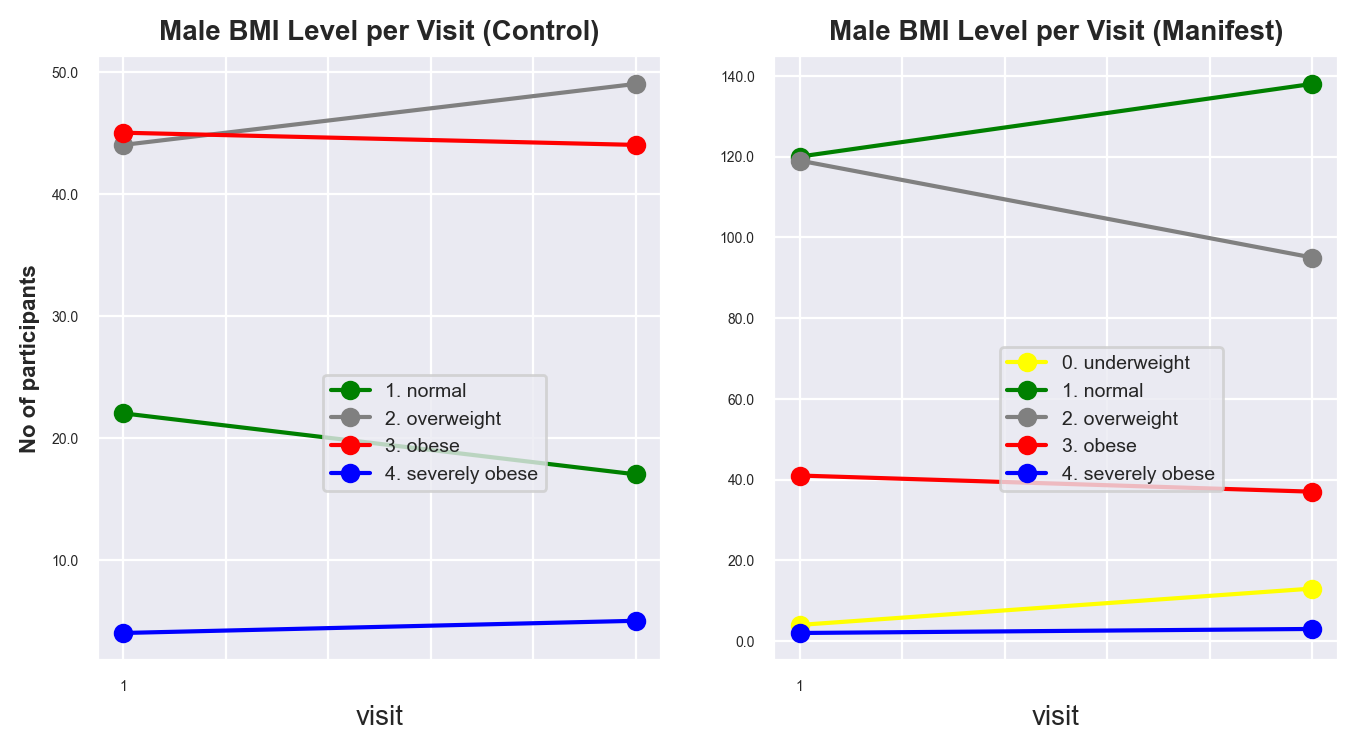

In [30]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=l, marker='o'), 
                 plot_title='Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=r, marker='o'), 
                 plot_title='Male BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

In [31]:
# in percentage
ctrl_freq = proj.get_columns_with_pattern(male_control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(male_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

visit  1. normal  2. overweight  3. obese  4. severely obese
0     1       19.1           38.3      39.1                3.5
1     6       14.8           42.6      38.3                4.3

visit  0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0     1             1.4       42.0           41.6      14.3                0.7
1     6             4.5       48.3           33.2      12.9                1.0

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

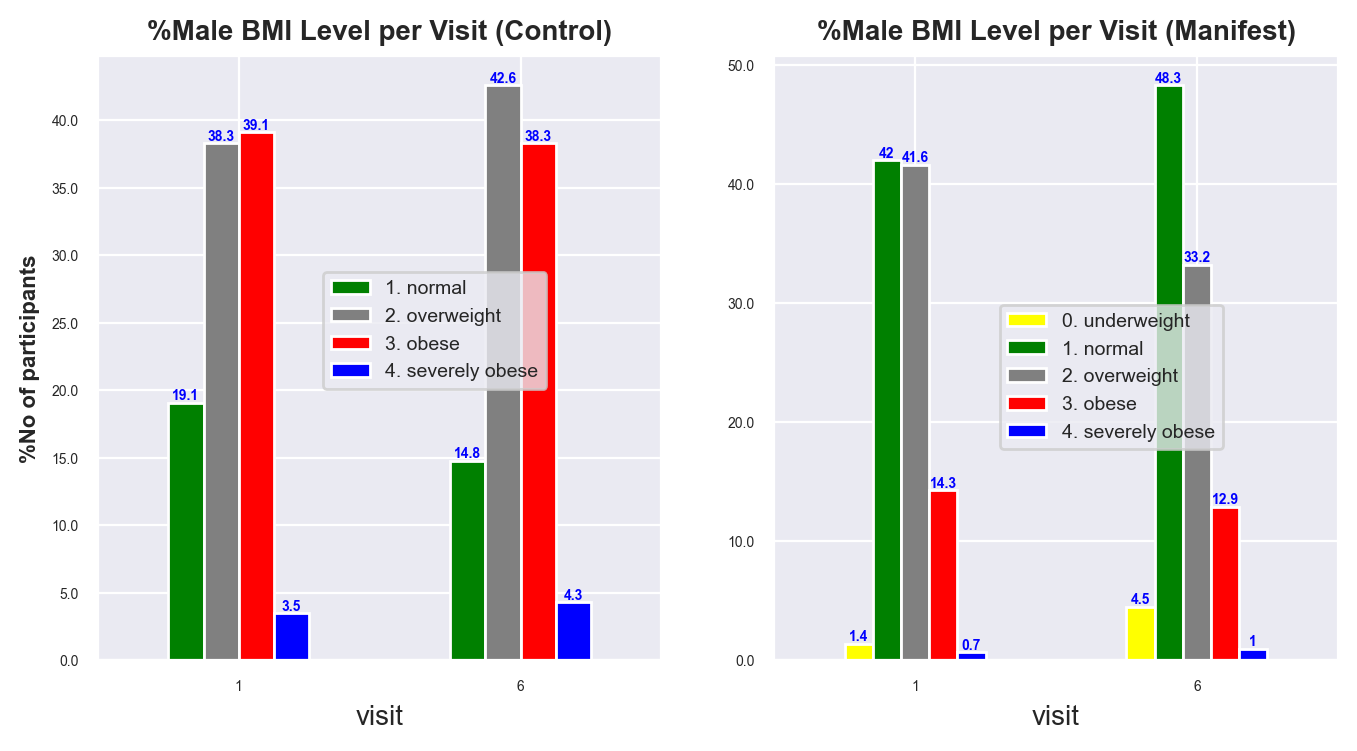

In [32]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.45])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%Male BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.35])

In [33]:
# female pps
ctrl_freq = proj.get_columns_with_pattern(female_control,
                                          'bmi_level_vis').apply(pd.Series.value_counts,
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
# ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(female_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
# mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

0. underweight  1. normal  2. overweight  3. obese  \
bmi_level_vis_1               3         66             56        62   
bmi_level_vis_6               3         67             54        57   

                 4. severely obese visit  
bmi_level_vis_1                 18     1  
bmi_level_vis_6                 24     6

0. underweight  1. normal  2. overweight  3. obese  \
bmi_level_vis_1              17        125             64        50   
bmi_level_vis_6              18        130             58        47   

                 4. severely obese visit  
bmi_level_vis_1                  4     1  
bmi_level_vis_6                  7     6

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

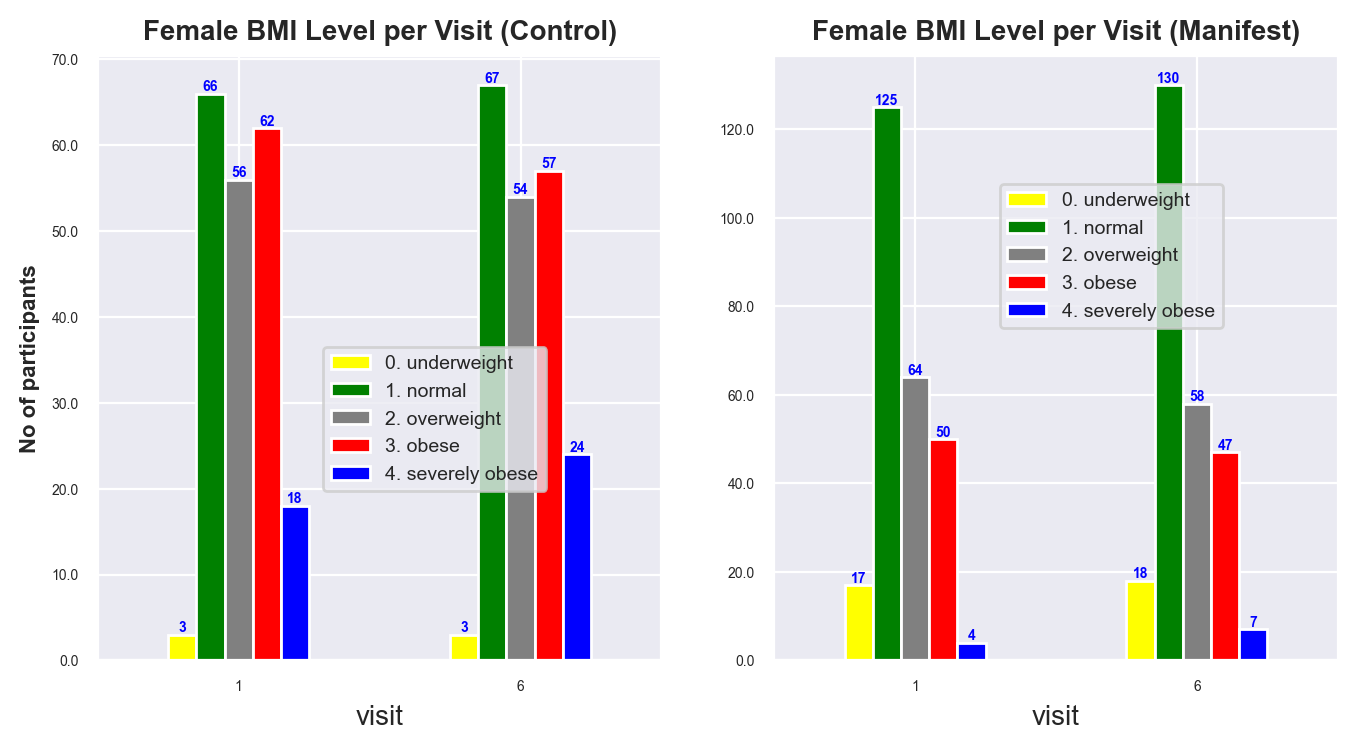

In [34]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.55])

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

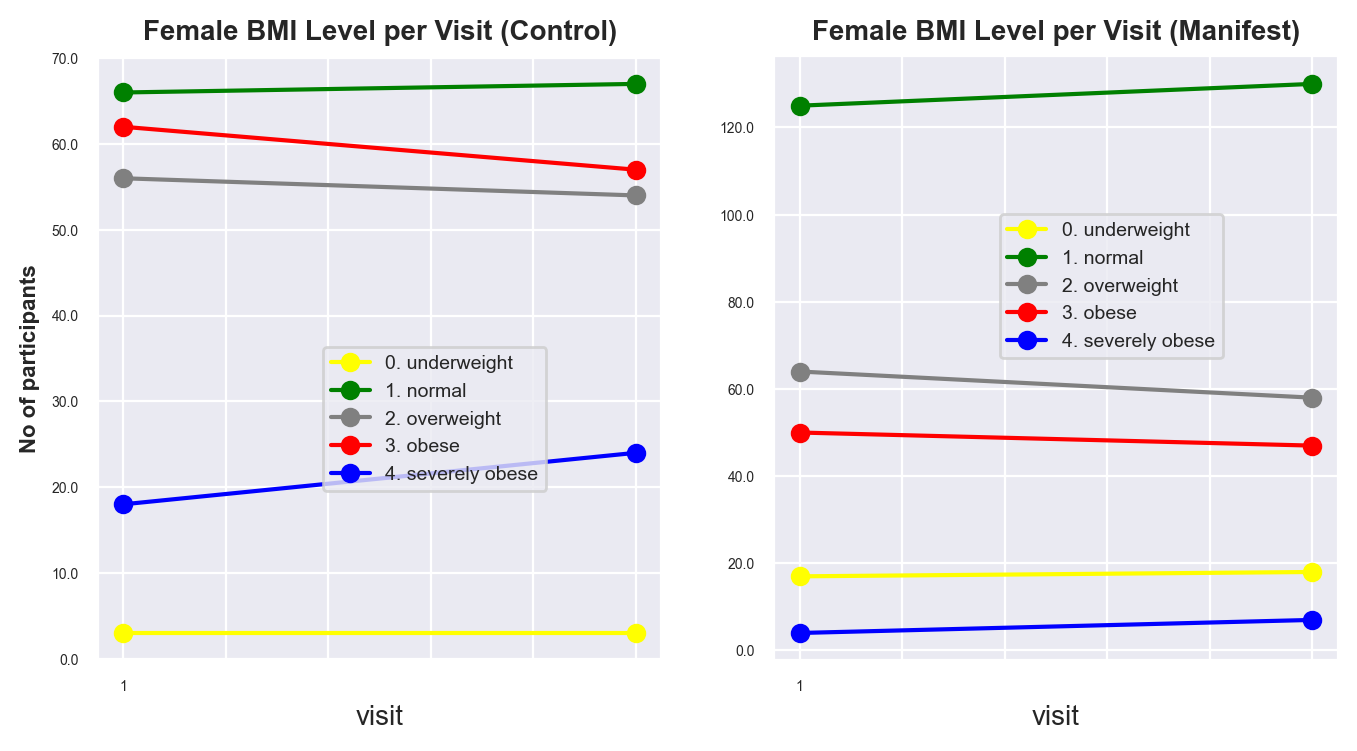

In [35]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=l, marker='o'), 
                 plot_title='Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=r, marker='o'), 
                 plot_title='Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.5])

In [36]:
# in percentage
ctrl_freq = proj.get_columns_with_pattern(female_control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts,
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(female_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.array([1, 6]).astype(str)
mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

visit  0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0     1             1.5       32.2           27.3      30.2                8.8
1     6             1.5       32.7           26.3      27.8               11.7

visit  0. underweight  1. normal  2. overweight  3. obese  4. severely obese
0     1             6.5       48.1           24.6      19.2                1.5
1     6             6.9       50.0           22.3      18.1                2.7

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

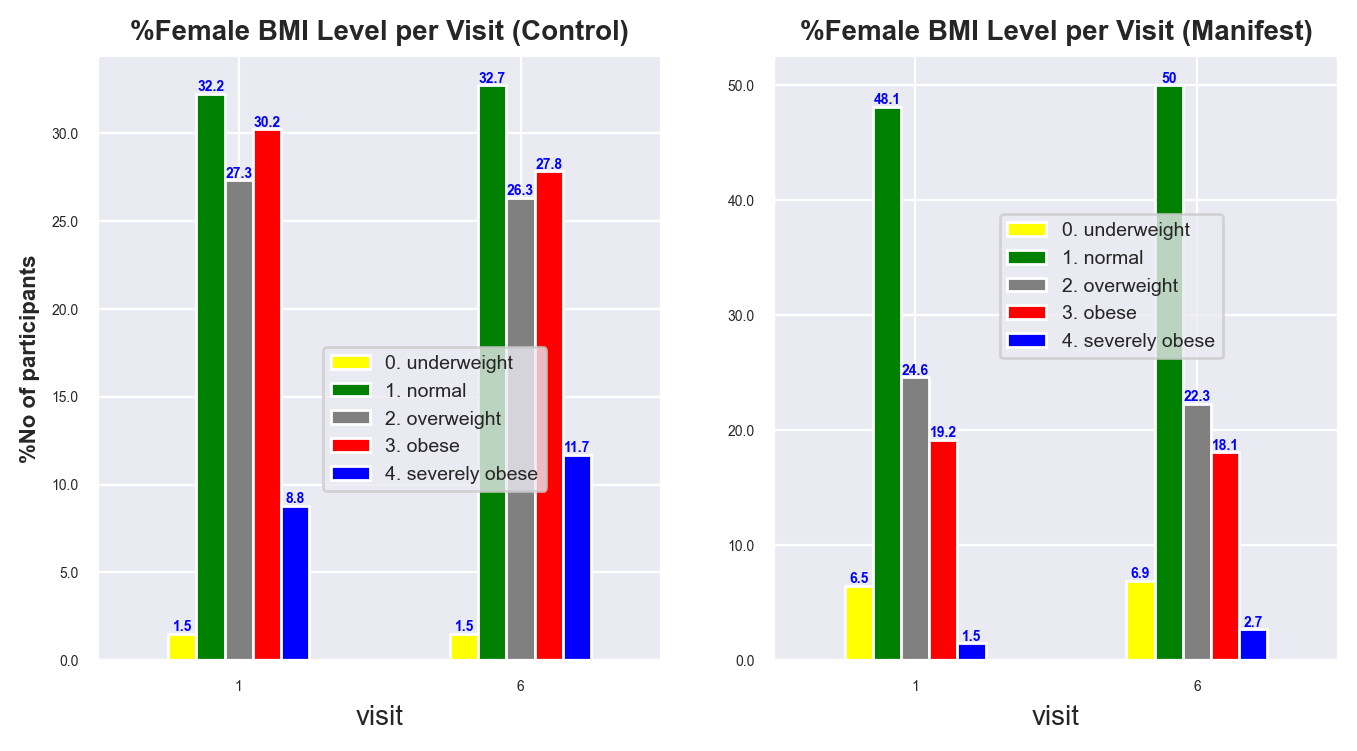

In [37]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.5])

### CAGHIGH BAND

0. normal          303
1. intermediate     17
Name: caghigh_band, dtype: int64

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


2. reduced penetrance     17
3. full penetrance       529
Name: caghigh_band, dtype: int64

No handles with labels found to put in legend.
W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'CAG Repeat Distribution (Manifest)'}, xlabel='caghigh_band', ylabel=' '>

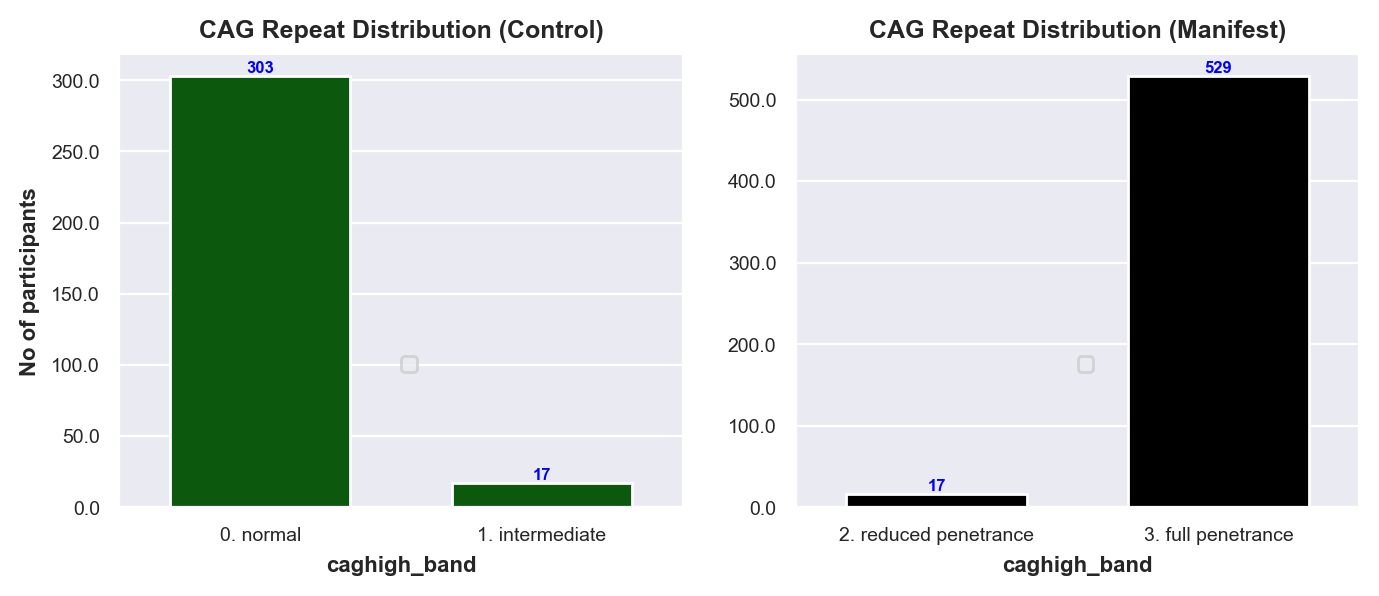

In [38]:
# freq = proj.get_columns_with_pattern(first6_vis,
#                                      'caghigh_').select_dtypes(exclude='object').drop('caghigh_num',
#                                                                                       axis=1).apply(pd.Series.value_counts)
# freq.columns = freq.columns.str.replace('caghigh_', '')
freq = control['caghigh_band'].value_counts().sort_index()
display(freq)
fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_column(axis=l, x=freq.index, y=freq,  color='darkgreen',
                 plot_title='CAG Repeat Distribution (Control)', title_size=9, annotate=True, 
                 x_labe='caghigh_band', y_labe='No of participants', show_legend_at=[0.5, 0.3],
                reduce_barw_by=1.25)

freq = manifest['caghigh_band'].value_counts().sort_index()
display(freq)
proj.plot_column(axis=r, x=freq.index, y=freq,  color='black',
                 plot_title='CAG Repeat Distribution (Manifest)', title_size=9, annotate=True, 
                 x_labe='caghigh_band', y_labe=' ', show_legend_at=[0.5, 0.3],
                reduce_barw_by=1.25)

caghigh_band    bmi_level_vis_1
34     0. normal     0. underweight
91     0. normal     0. underweight
90     0. normal     0. underweight
159    0. normal          1. normal
176    0. normal          1. normal
..           ...                ...
181    0. normal  4. severely obese
260    0. normal  4. severely obese
291    0. normal  4. severely obese
204    0. normal  4. severely obese
200    0. normal  4. severely obese

[320 rows x 2 columns]

['0. normal', '1. intermediate']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:1920: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), size=xy_ticklabe_size, rotation=rotate_yticklabe)


caghigh_band    bmi_level_vis_6
90         0. normal     0. underweight
3          0. normal     0. underweight
59         0. normal     0. underweight
159        0. normal          1. normal
150  1. intermediate          1. normal
..               ...                ...
15         0. normal  4. severely obese
221        0. normal  4. severely obese
292        0. normal  4. severely obese
304        0. normal  4. severely obese
93         0. normal  4. severely obese

[320 rows x 2 columns]

['0. normal', '1. intermediate']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:1920: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), size=xy_ticklabe_size, rotation=rotate_yticklabe)


<Axes:title={'center':'Sixth Visit Control CAG Repeat per BMI Category'}, xlabel='caghigh_band', ylabel='bmi_level_vis_6'>

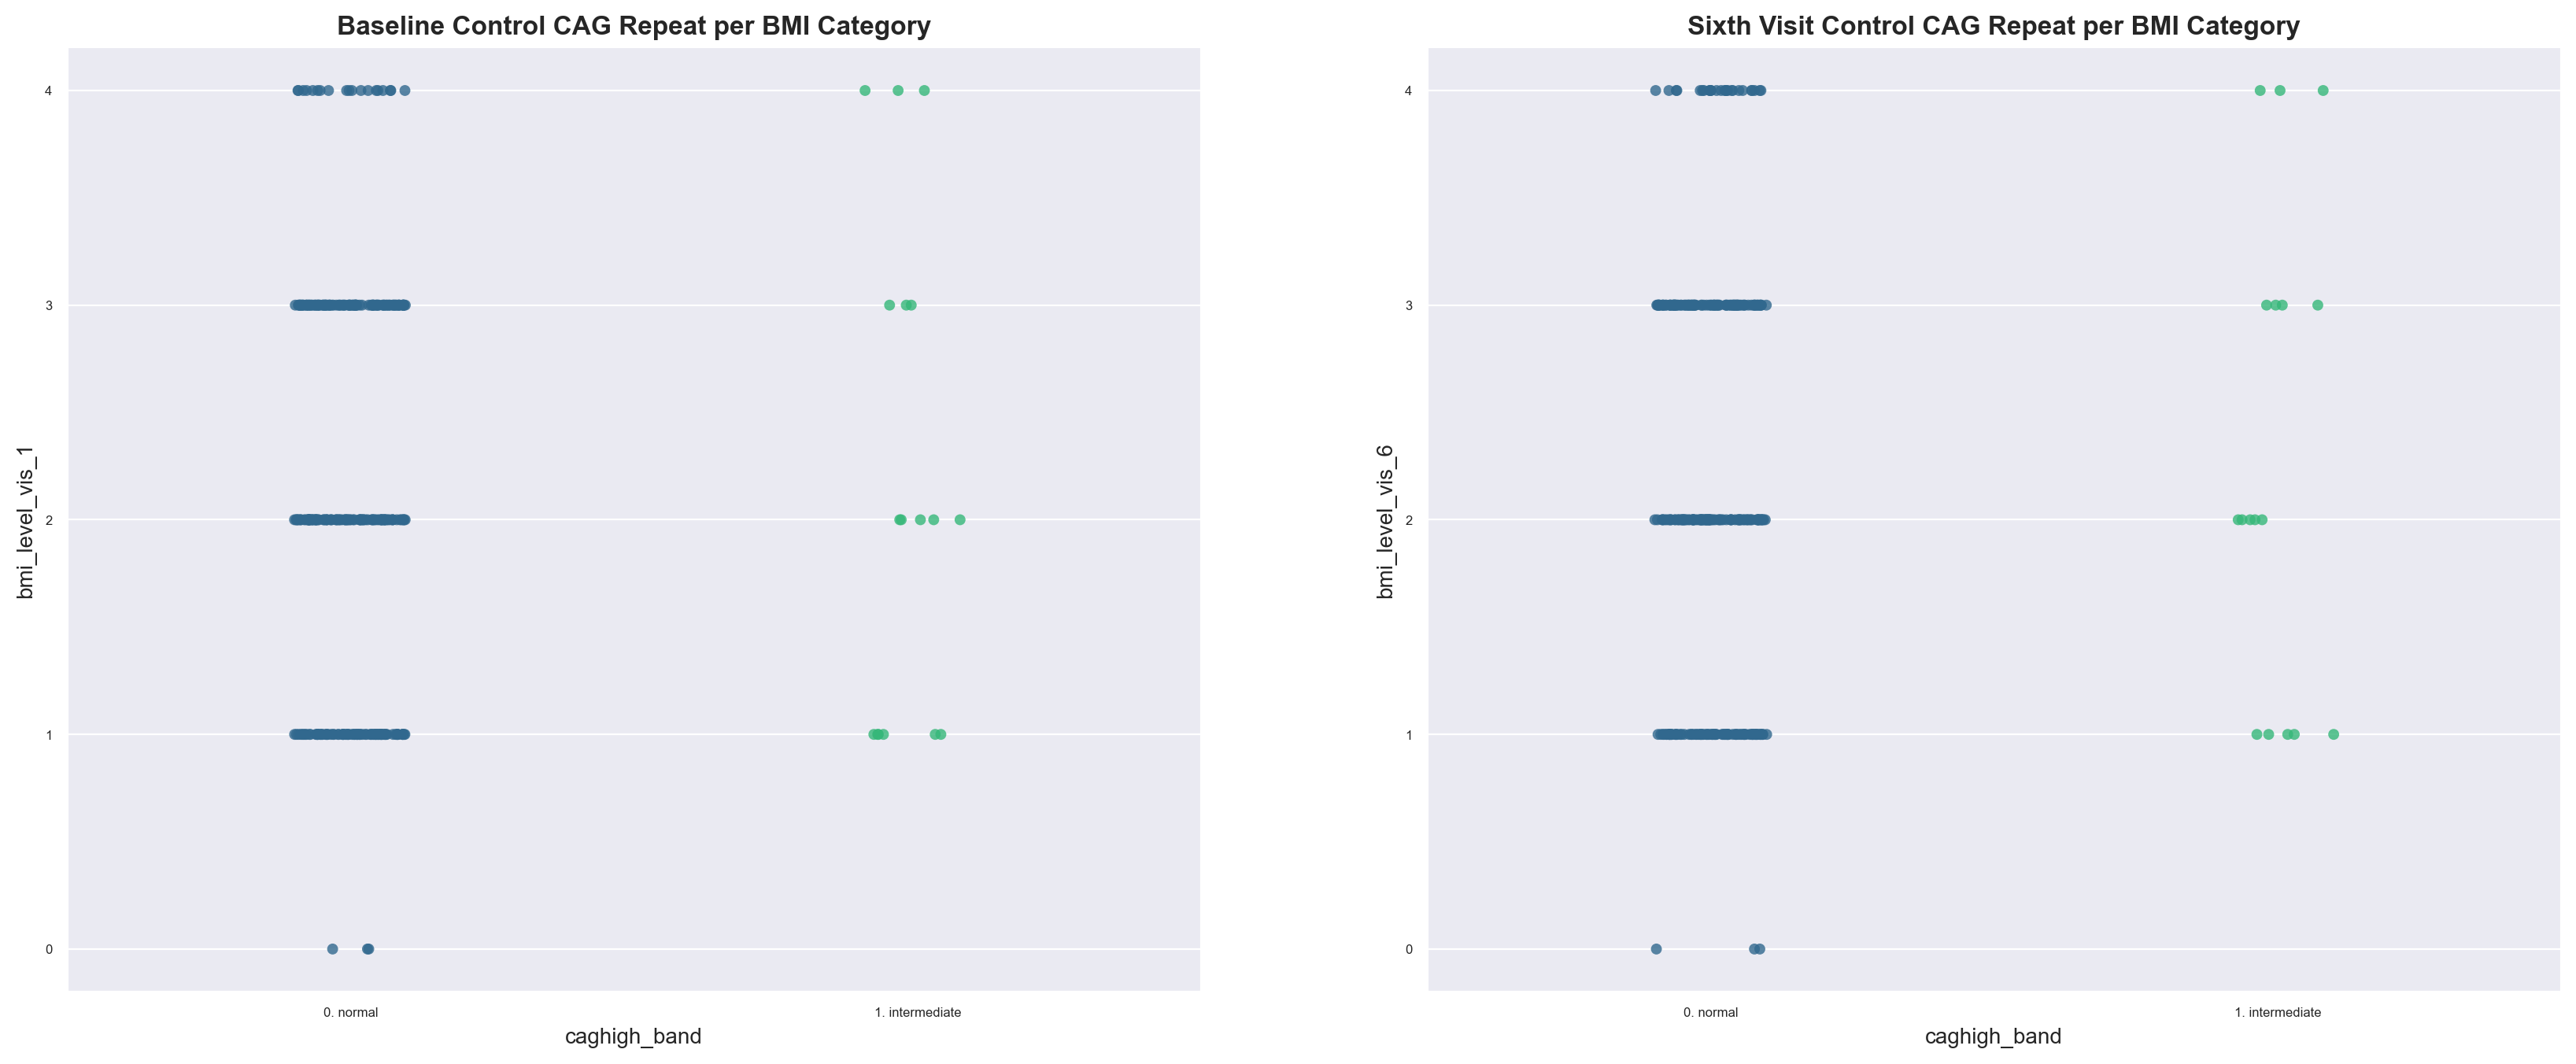

In [39]:
cols = ['caghigh_band', 'bmi_level_vis_1']
x, y = cols
df = control[cols].sort_values(by=y, key=lambda col: col.str.split('.').str[0])
ordering = sorted(list(df[x].unique()), key=lambda x: x.split('.')[0])
display(df, ordering)

fig = plt.figure(figsize=[12, 6], dpi=200)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.72, 0, 0.6, 1])
proj.plot_strip(df[x], df[y], x_labe_order=ordering,
                plot_title="Baseline Control CAG Repeat per BMI Category", title_size=12, alpha=0.8, axis=l)

cols = ['caghigh_band', 'bmi_level_vis_6']
x, y = cols
df = control[cols].sort_values(by=y, key=lambda col: col.str.split('.').str[0])
ordering = sorted(list(df[x].unique()), key=lambda x: x.split('.')[0])
display(df, ordering)
proj.plot_strip(df[x], df[y], x_labe_order=ordering,
                plot_title="Sixth Visit Control CAG Repeat per BMI Category", title_size=12, alpha=0.8, axis=r)

caghigh_band    bmi_level_vis_1
254     3. full penetrance     0. underweight
521     3. full penetrance     0. underweight
33      3. full penetrance     0. underweight
523     3. full penetrance     0. underweight
318     3. full penetrance     0. underweight
..                     ...                ...
268     3. full penetrance  4. severely obese
377  2. reduced penetrance  4. severely obese
97      3. full penetrance  4. severely obese
203     3. full penetrance  4. severely obese
470     3. full penetrance  4. severely obese

[546 rows x 2 columns]

['2. reduced penetrance', '3. full penetrance']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:1920: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), size=xy_ticklabe_size, rotation=rotate_yticklabe)


caghigh_band    bmi_level_vis_6
0    3. full penetrance     0. underweight
33   3. full penetrance     0. underweight
254  3. full penetrance     0. underweight
166  3. full penetrance     0. underweight
47   3. full penetrance     0. underweight
..                  ...                ...
26   3. full penetrance  4. severely obese
37   3. full penetrance  4. severely obese
268  3. full penetrance  4. severely obese
203  3. full penetrance  4. severely obese
97   3. full penetrance  4. severely obese

[546 rows x 2 columns]

['2. reduced penetrance', '3. full penetrance']

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:1920: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(axis.get_yticks(), size=xy_ticklabe_size, rotation=rotate_yticklabe)


<Axes:title={'center':'Sixth Visit Manifest CAG Repeat per BMI Category'}, xlabel='caghigh_band', ylabel='bmi_level_vis_6'>

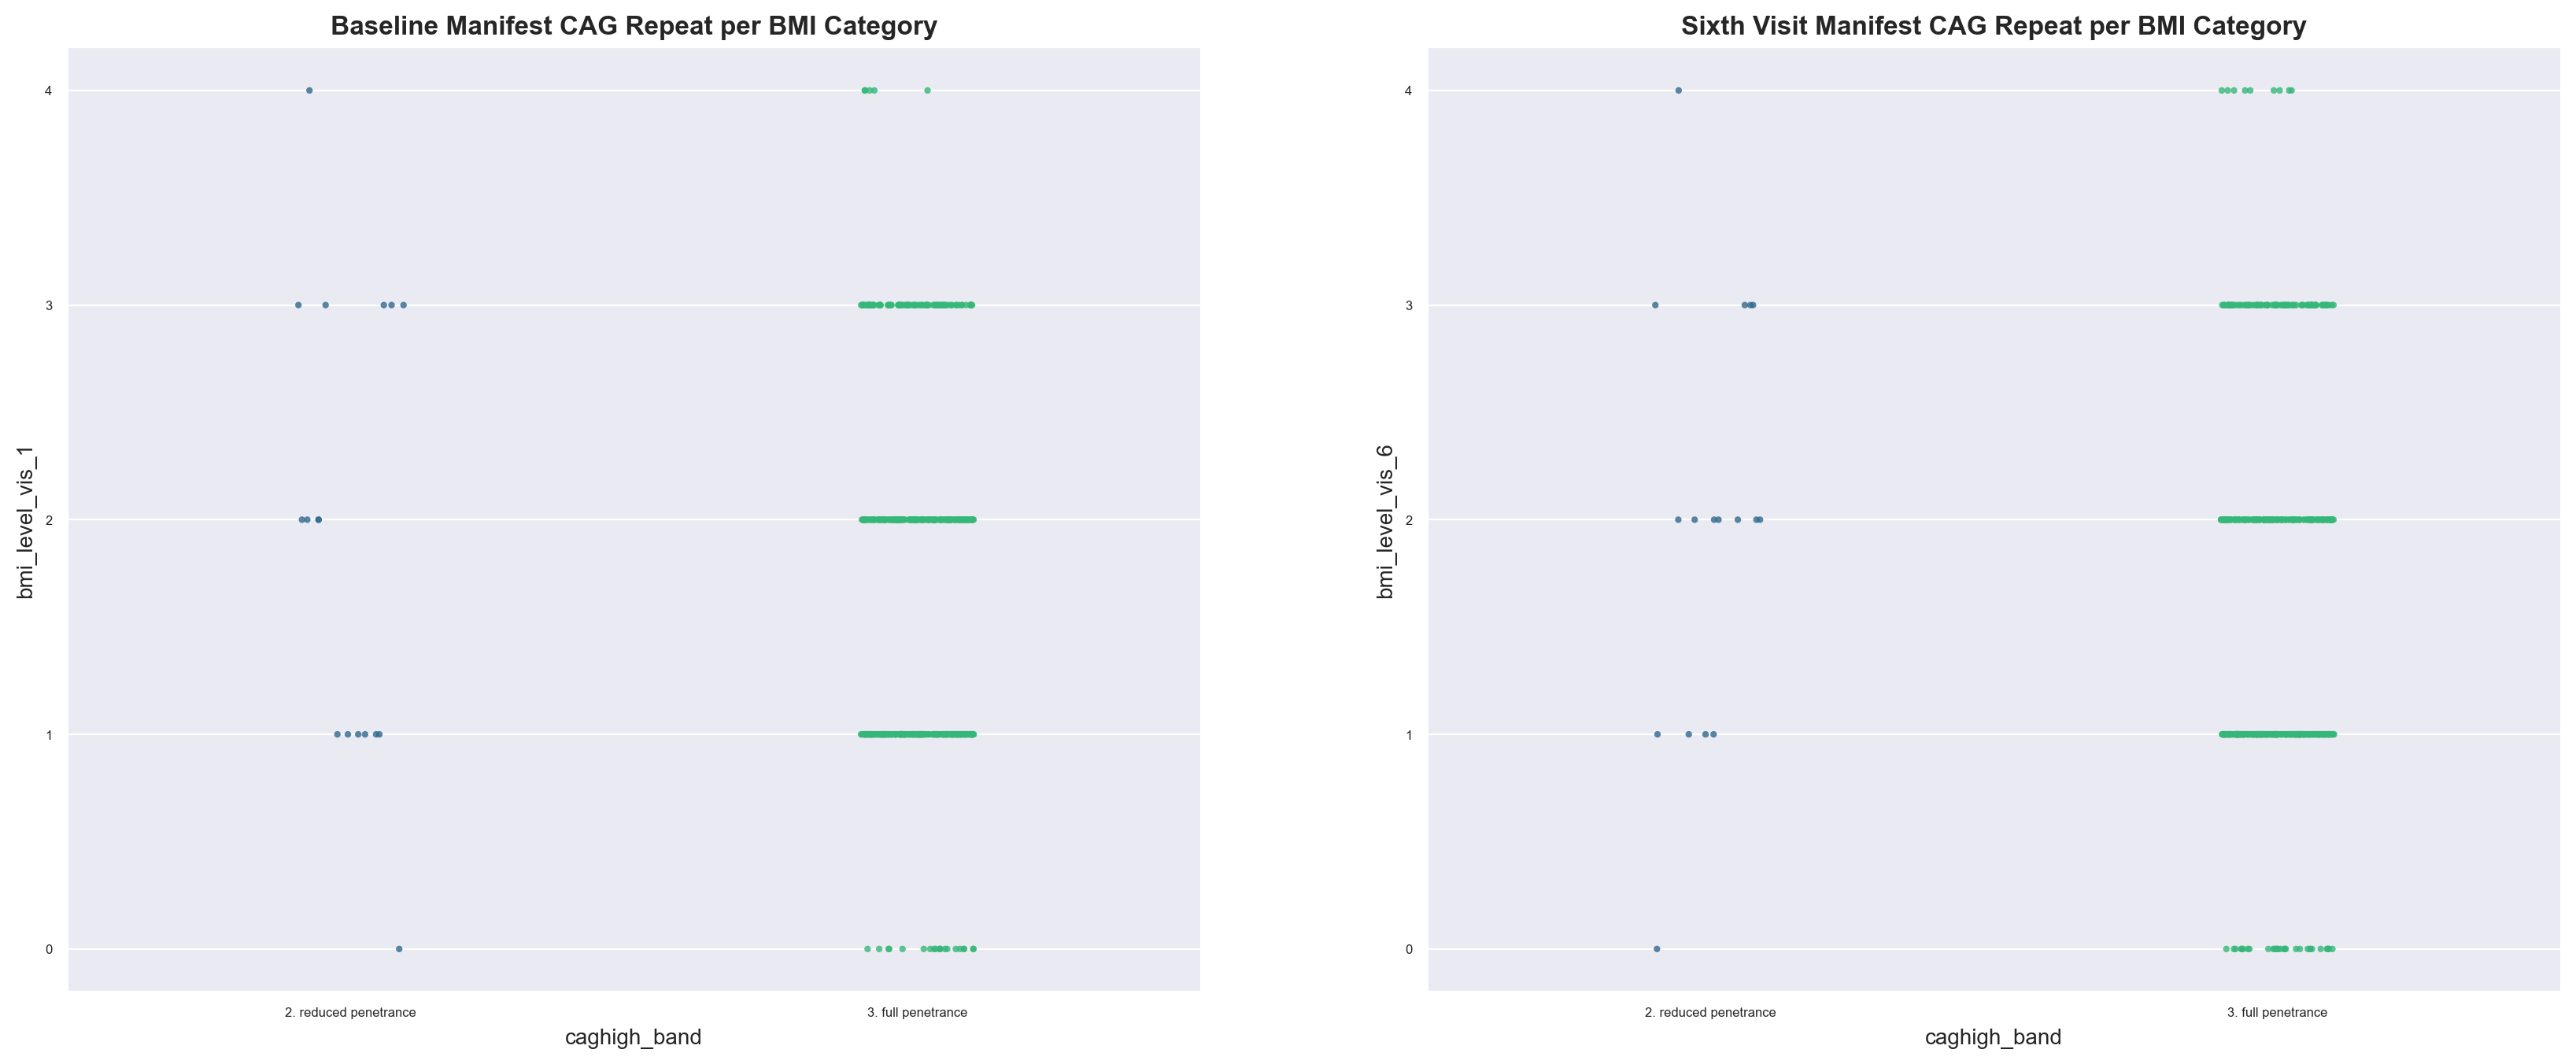

In [40]:
cols = ['caghigh_band', 'bmi_level_vis_1']
x, y = cols
df = manifest[cols].sort_values(by=y, key=lambda col: col.str.split('.').str[0])
ordering = sorted(list(df[x].unique()), key=lambda x: x.split('.')[0])
display(df, ordering)

fig = plt.figure(figsize=[12, 6], dpi=200)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.72, 0, 0.6, 1])
proj.plot_strip(df[x], df[y], x_labe_order=ordering, marker_size=3,
                plot_title="Baseline Manifest CAG Repeat per BMI Category", title_size=12, alpha=0.8, axis=l)

cols = ['caghigh_band', 'bmi_level_vis_6']
x, y = cols
df = manifest[cols].sort_values(by=y, key=lambda col: col.str.split('.').str[0])
ordering = sorted(list(df[x].unique()), key=lambda x: x.split('.')[0])
display(df, ordering)
proj.plot_strip(df[x], df[y], x_labe_order=ordering, marker_size=3,
                plot_title="Sixth Visit Manifest CAG Repeat per BMI Category", title_size=12, alpha=0.8, axis=r)

caghigh_num    24.47
dtype: float64

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Plot Title'}>

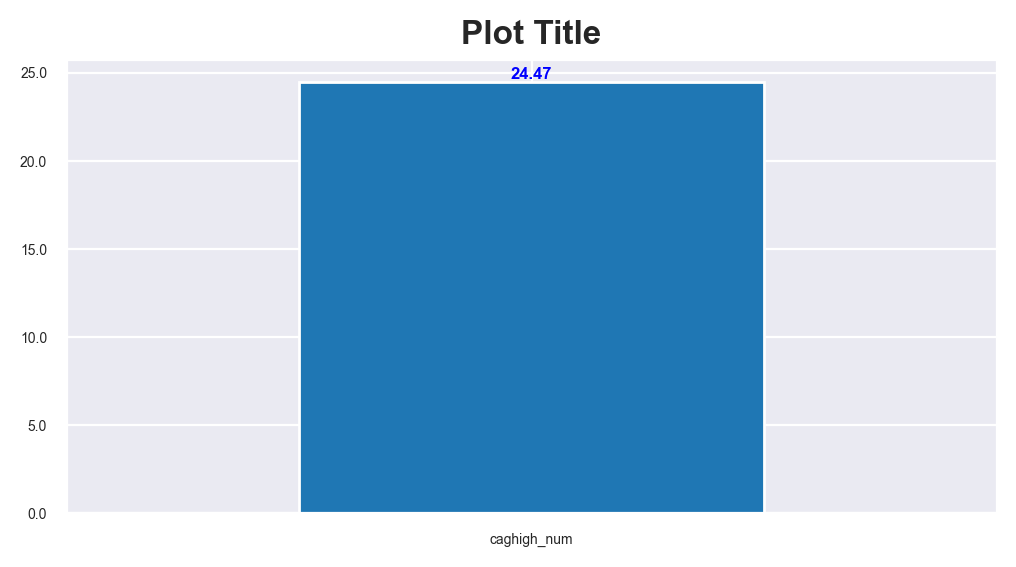

In [41]:
cols = list(proj.get_columns_with_pattern(first6_vis, 'caghigh').columns)
X = first6_vis[cols].select_dtypes(exclude='object')
y = first6_vis['bmi_level_vis_6'].str.split('.').str[0].astype(int)
corn = proj.corr_with_pearson(X, y)
display(corn)
fig, ax1 = plt.subplots(figsize=[6, 3], dpi=200)
proj.adjust_axis(corn.plot(kind='bar', ax=ax1), annotate=True)

#### Control

In [42]:
# normal cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '0. normal'
vis1 = proj.count_occurrences(control[cols], cols)
vis1.loc[:, 'visit'] = 1
display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(control[cols], cols)
vis6.loc[:, 'visit'] = 6

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_normal = vis1.append(vis6).reset_index()
display(ctl_normal)

# intermediate cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '1. intermediate'
vis1 = proj.count_occurrences(control[cols], cols)
vis1.loc[:, 'visit'] = 1
# display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(control[cols], cols)
vis6.loc[:, 'visit'] = 6
# display(vis6)

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_intermd = vis1.append(vis6).reset_index()
display(ctl_intermd)

caghigh_band    bmi_level_vis_1  total_count  visit
0        0. normal     0. underweight            3      1
1        0. normal          1. normal           82      1
2        0. normal      2. overweight           95      1
3        0. normal           3. obese          104      1
4        0. normal  4. severely obese           19      1
5  1. intermediate          1. normal            6      1
6  1. intermediate      2. overweight            5      1
7  1. intermediate           3. obese            3      1
8  1. intermediate  4. severely obese            3      1

bmi_level_vis_1  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
1                             3         82             95       104   

bmi_level_vis_1  4. severely obese  
visit                               
1                               19

bmi_level_vis_6  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
6                             3         79             98        97   

bmi_level_vis_6  4. severely obese  
visit                               
6                               26

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               3         82             95       104   
1      6               3         79             98        97   

   4. severely obese  
0                 19  
1                 26

bmi_level_vis_1  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                 
1                        6              5         3                  3

bmi_level_vis_6  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                 
6                        5              5         4                  3

visit  1. normal  2. overweight  3. obese  4. severely obese
0      1          6              5         3                  3
1      6          5              5         4                  3

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Control CAG Repeat per Visit (Intermediate CAG)'}, xlabel='visit', ylabel='No of participants'>

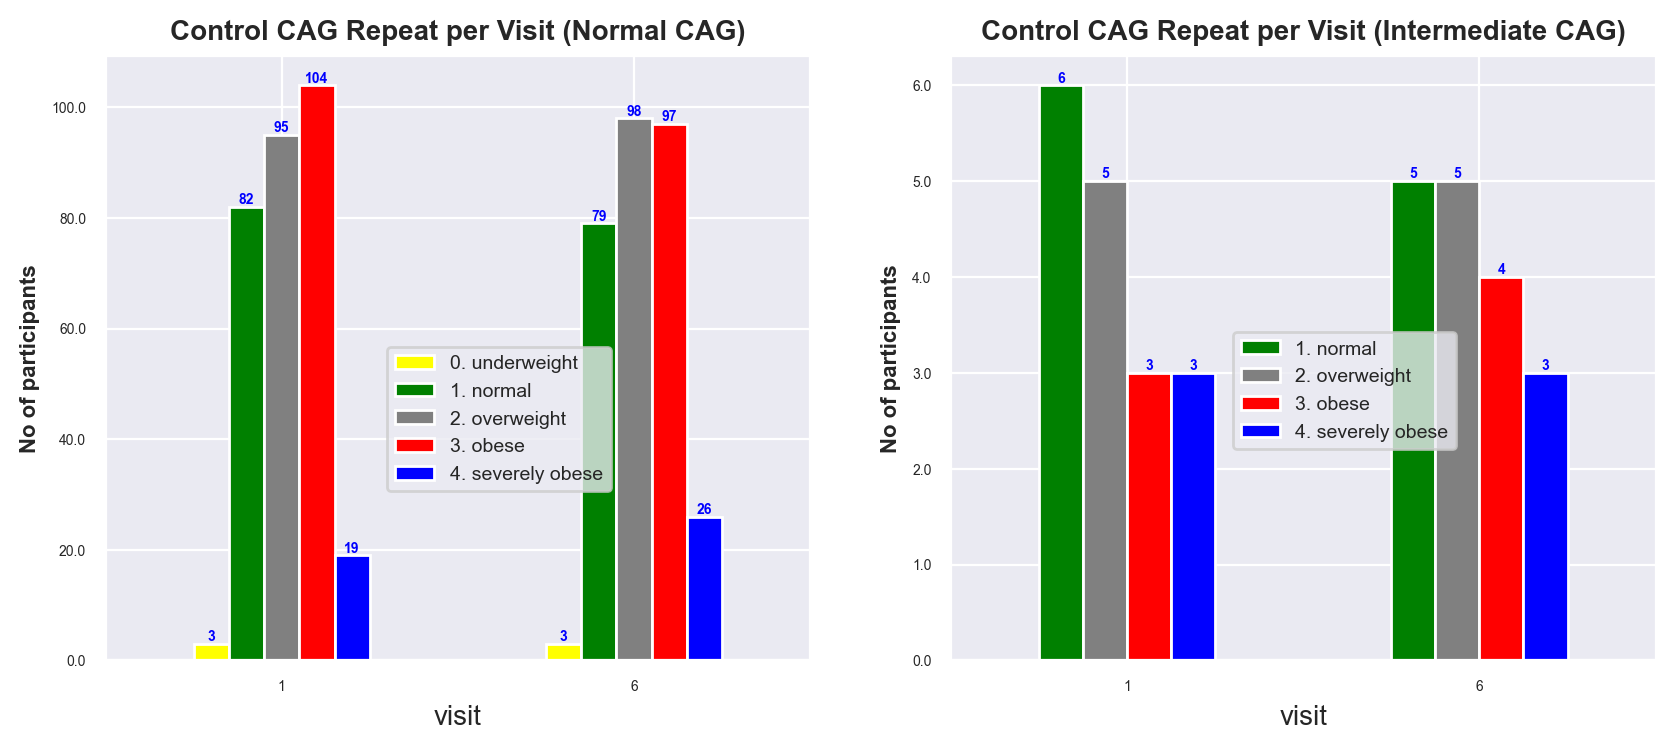

In [43]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_normal.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
ctl_intermd.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Control CAG Repeat per Visit (Normal CAG)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Control CAG Repeat per Visit (Intermediate CAG)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.35])

<AxesSubplot:title={'center':'%Control CAG Repeat per Visit (Intermediate CAG)'}, xlabel='visit', ylabel='%No of participants'>

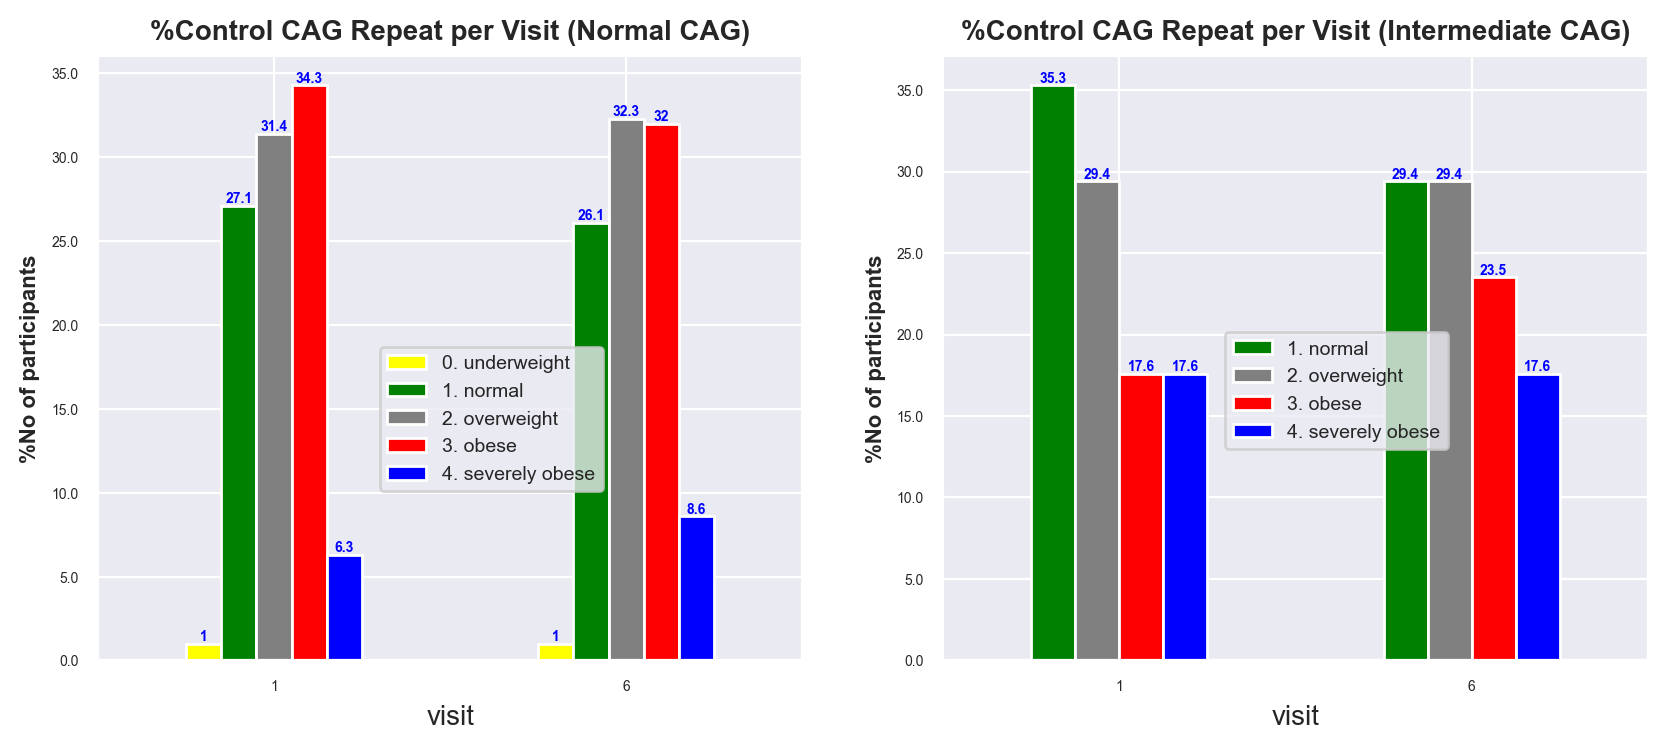

In [44]:
# in percentage
ctl_normal = proj.percentage_per_row(ctl_normal, 'visit', precision=1)
ctl_intermd = proj.percentage_per_row(ctl_intermd, 'visit', precision=1)#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_normal.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
ctl_intermd.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Control CAG Repeat per Visit (Normal CAG)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Control CAG Repeat per Visit (Intermediate CAG)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.35])

#### Manifest

In [45]:
# reduced penetrance cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '2. reduced penetrance'
vis1 = proj.count_occurrences(manifest[cols], cols)
vis1.loc[:, 'visit'] = 1
display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(manifest[cols], cols)
vis6.loc[:, 'visit'] = 6

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
mnf_redpen = vis1.append(vis6).reset_index()
display(mnf_redpen)

# full penetrance cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '3. full penetrance'
vis1 = proj.count_occurrences(manifest[cols], cols)
vis1.loc[:, 'visit'] = 1
# display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(manifest[cols], cols)
vis6.loc[:, 'visit'] = 6
# display(vis6)

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
mnf_fulpen = vis1.append(vis6).reset_index()
display(mnf_fulpen)

caghigh_band    bmi_level_vis_1  total_count  visit
0  2. reduced penetrance     0. underweight            1      1
1  2. reduced penetrance          1. normal            6      1
2  2. reduced penetrance      2. overweight            4      1
3  2. reduced penetrance           3. obese            5      1
4  2. reduced penetrance  4. severely obese            1      1
5     3. full penetrance     0. underweight           20      1
6     3. full penetrance          1. normal          239      1
7     3. full penetrance      2. overweight          179      1
8     3. full penetrance           3. obese           86      1
9     3. full penetrance  4. severely obese            5      1

bmi_level_vis_1  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
1                             1          6              4         5   

bmi_level_vis_1  4. severely obese  
visit                               
1                                1

bmi_level_vis_6  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
6                             1          4              7         4   

bmi_level_vis_6  4. severely obese  
visit                               
6                                1

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               1          6              4         5   
1      6               1          4              7         4   

   4. severely obese  
0                  1  
1                  1

bmi_level_vis_1  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
1                            20        239            179        86   

bmi_level_vis_1  4. severely obese  
visit                               
1                                5

bmi_level_vis_6  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
6                            30        264            146        80   

bmi_level_vis_6  4. severely obese  
visit                               
6                                9

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1              20        239            179        86   
1      6              30        264            146        80   

   4. severely obese  
0                  5  
1                  9

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Manifest CAG Repeat per Visit (Full Penetrance)'}, xlabel='visit', ylabel='No of participants'>

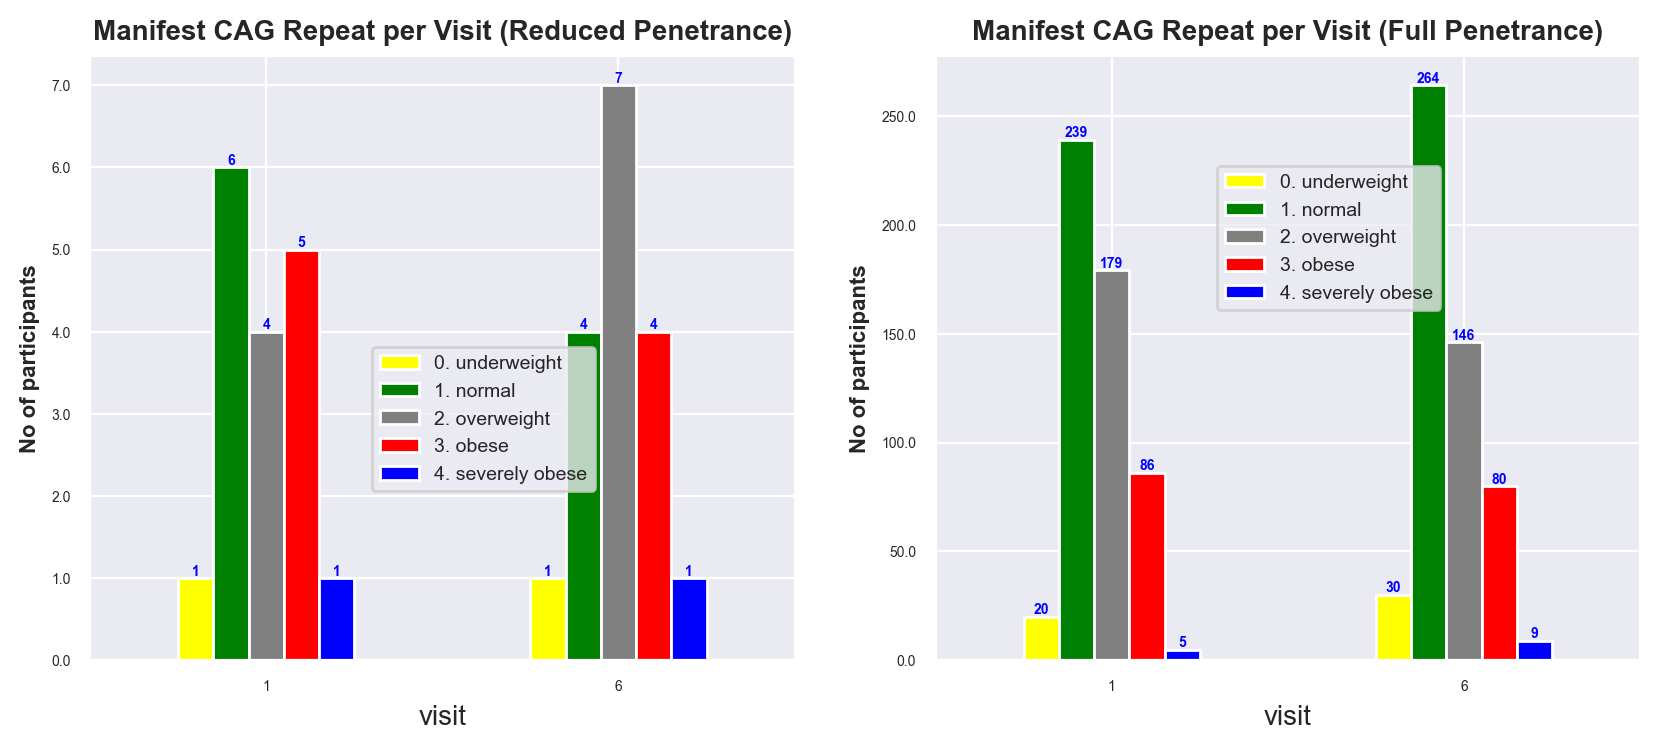

In [46]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
mnf_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
mnf_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Manifest CAG Repeat per Visit (Reduced Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Manifest CAG Repeat per Visit (Full Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.58])

<AxesSubplot:title={'center':'%Manifest CAG Repeat per Visit (Full Penetrance)'}, xlabel='visit', ylabel='%No of participants'>

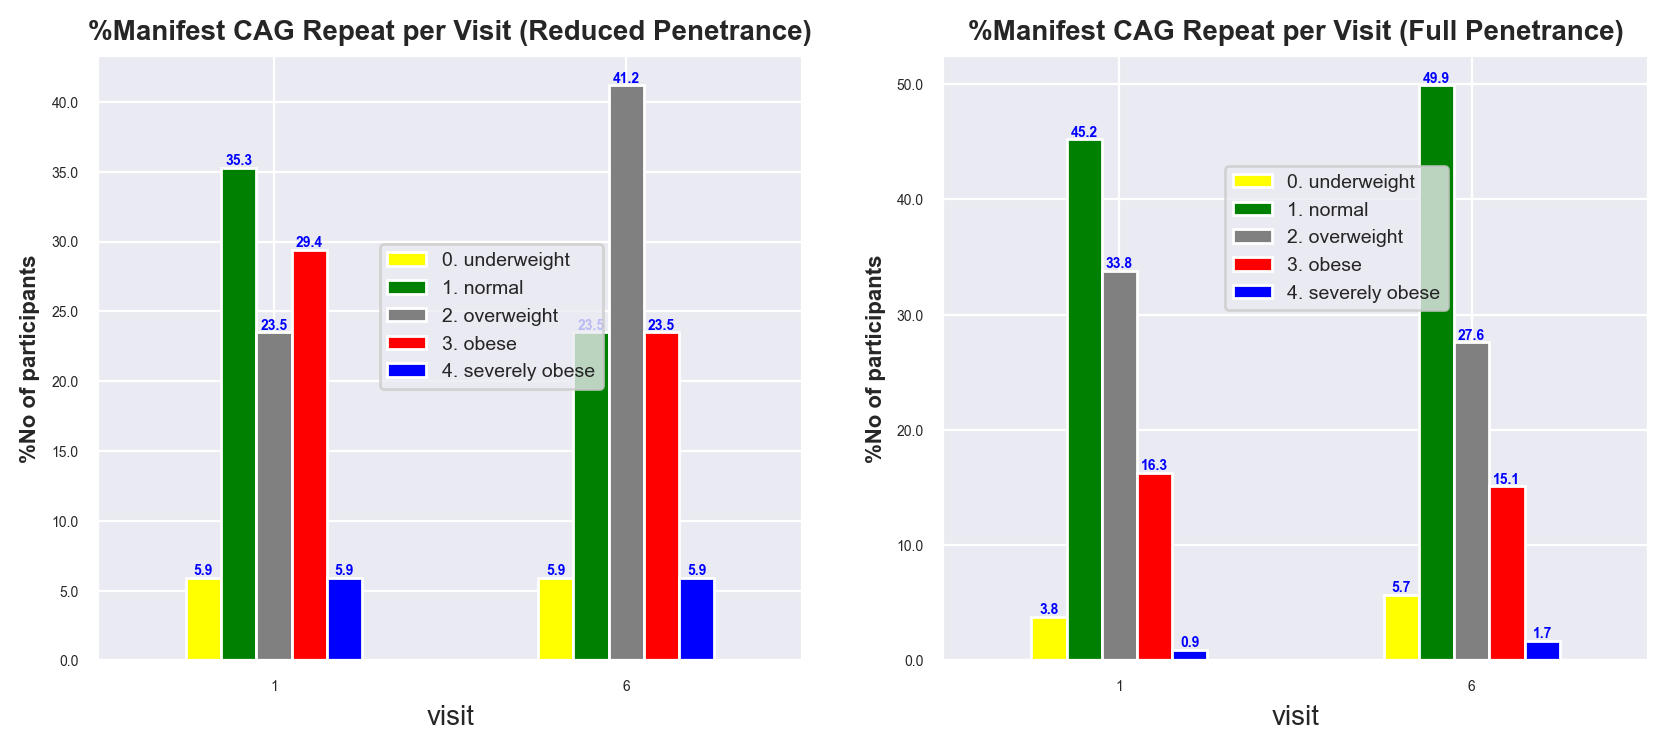

In [47]:
# in percentage
mnf_redpen = proj.percentage_per_row(mnf_redpen, 'visit', precision=1)
mnf_fulpen = proj.percentage_per_row(mnf_fulpen, 'visit', precision=1)#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
mnf_redpen.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
mnf_fulpen.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Manifest CAG Repeat per Visit (Reduced Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.45])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Manifest CAG Repeat per Visit (Full Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.58])

#### Gender Effect

is_male     caghigh_band  total_count
0       f        0. normal          196
1       f  1. intermediate            9
2       m        0. normal          107
3       m  1. intermediate            8

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


is_male           caghigh_band  total_count
0       f  2. reduced penetrance            9
1       f     3. full penetrance          251
2       m  2. reduced penetrance            8
3       m     3. full penetrance          278

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2205: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'CAG Repeat Distribution (Manifest)'}, xlabel='caghigh_band', ylabel=' '>

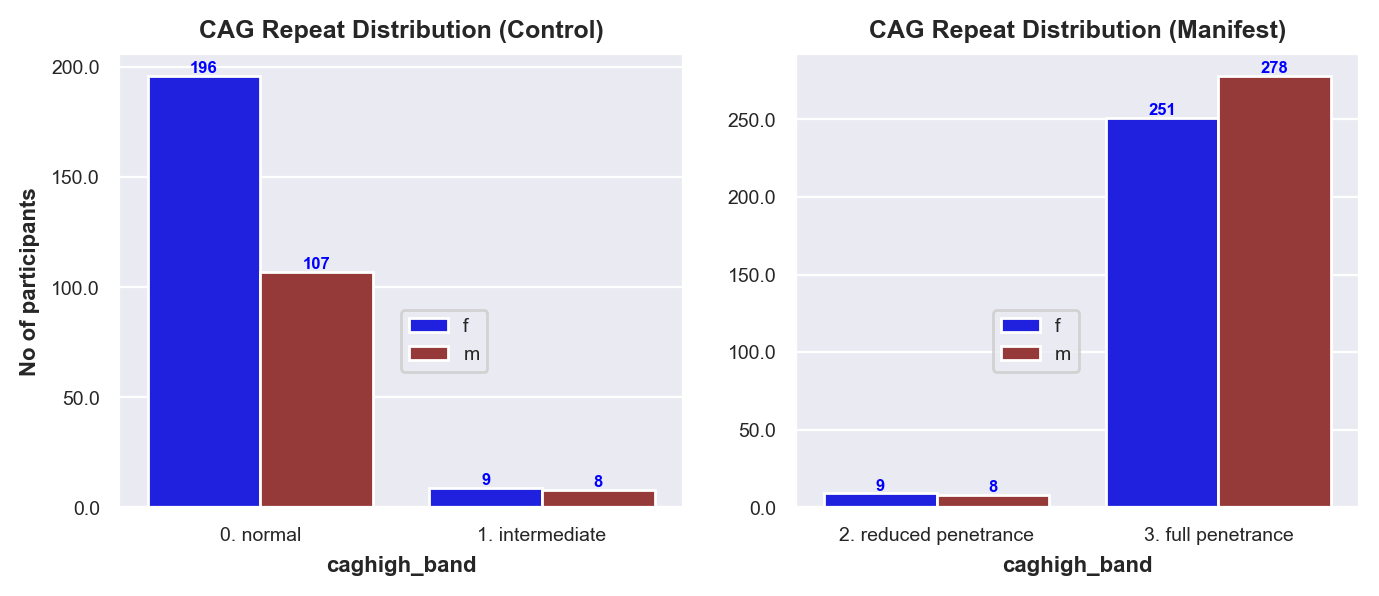

In [48]:
cols = ['is_male', 'caghigh_band']
freq = proj.replace_value_with(proj.count_occurrences(control[cols], cols),
                               replacement_guide={0:'f', 1:'m'}, colnames=['is_male'])
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[8, 3], dpi=200)
proj.plot_column(axis=l, x=freq[cols[-1]], y=freq['total_count'], condition_on=freq['is_male'],  
                 plot_title='CAG Repeat Distribution (Control)', title_size=9, annotate=True, 
                 x_labe='caghigh_band', y_labe='No of participants', show_legend_at=[0.5, 0.3],
                 paletter=proj.gender_cmap,)# reduce_barw_by=1.25)

cols = ['is_male', 'caghigh_band']
freq = proj.replace_value_with(proj.count_occurrences(manifest[cols], cols),
                               replacement_guide={0:'f', 1:'m'}, colnames=['is_male'])
display(freq)
proj.plot_column(axis=r, x=freq[cols[-1]], y=freq['total_count'], condition_on=freq['is_male'],
                 plot_title='CAG Repeat Distribution (Manifest)', title_size=9, annotate=True, 
                 x_labe='caghigh_band', y_labe=' ', show_legend_at=[0.35, 0.3],
                paletter=proj.gender_cmap,)#reduce_barw_by=1.25)

#### Male Control

In [49]:
# normal cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '0. normal'
vis1 = proj.count_occurrences(male_control[cols], cols)
vis1.loc[:, 'visit'] = 1
display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(male_control[cols], cols)
vis6.loc[:, 'visit'] = 6

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_normal = vis1.append(vis6).reset_index()
display(ctl_normal)

# intermediate cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '1. intermediate'
vis1 = proj.count_occurrences(male_control[cols], cols)
vis1.loc[:, 'visit'] = 1
# display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(male_control[cols], cols)
vis6.loc[:, 'visit'] = 6
# display(vis6)

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_intermd = vis1.append(vis6).reset_index()
display(ctl_intermd)

caghigh_band    bmi_level_vis_1  total_count  visit
0        0. normal          1. normal           20      1
1        0. normal      2. overweight           43      1
2        0. normal           3. obese           42      1
3        0. normal  4. severely obese            2      1
4  1. intermediate          1. normal            2      1
5  1. intermediate      2. overweight            1      1
6  1. intermediate           3. obese            3      1
7  1. intermediate  4. severely obese            2      1

bmi_level_vis_1  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                 
1                       20             43        42                  2

bmi_level_vis_6  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                 
6                       16             47        41                  3

visit  1. normal  2. overweight  3. obese  4. severely obese
0      1         20             43        42                  2
1      6         16             47        41                  3

bmi_level_vis_1  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                 
1                        2              1         3                  2

bmi_level_vis_6  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                 
6                        1              2         3                  2

visit  1. normal  2. overweight  3. obese  4. severely obese
0      1          2              1         3                  2
1      6          1              2         3                  2

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Male control CAG Repeat per Visit (Intermediate CAG)'}, xlabel='visit', ylabel='No of participants'>

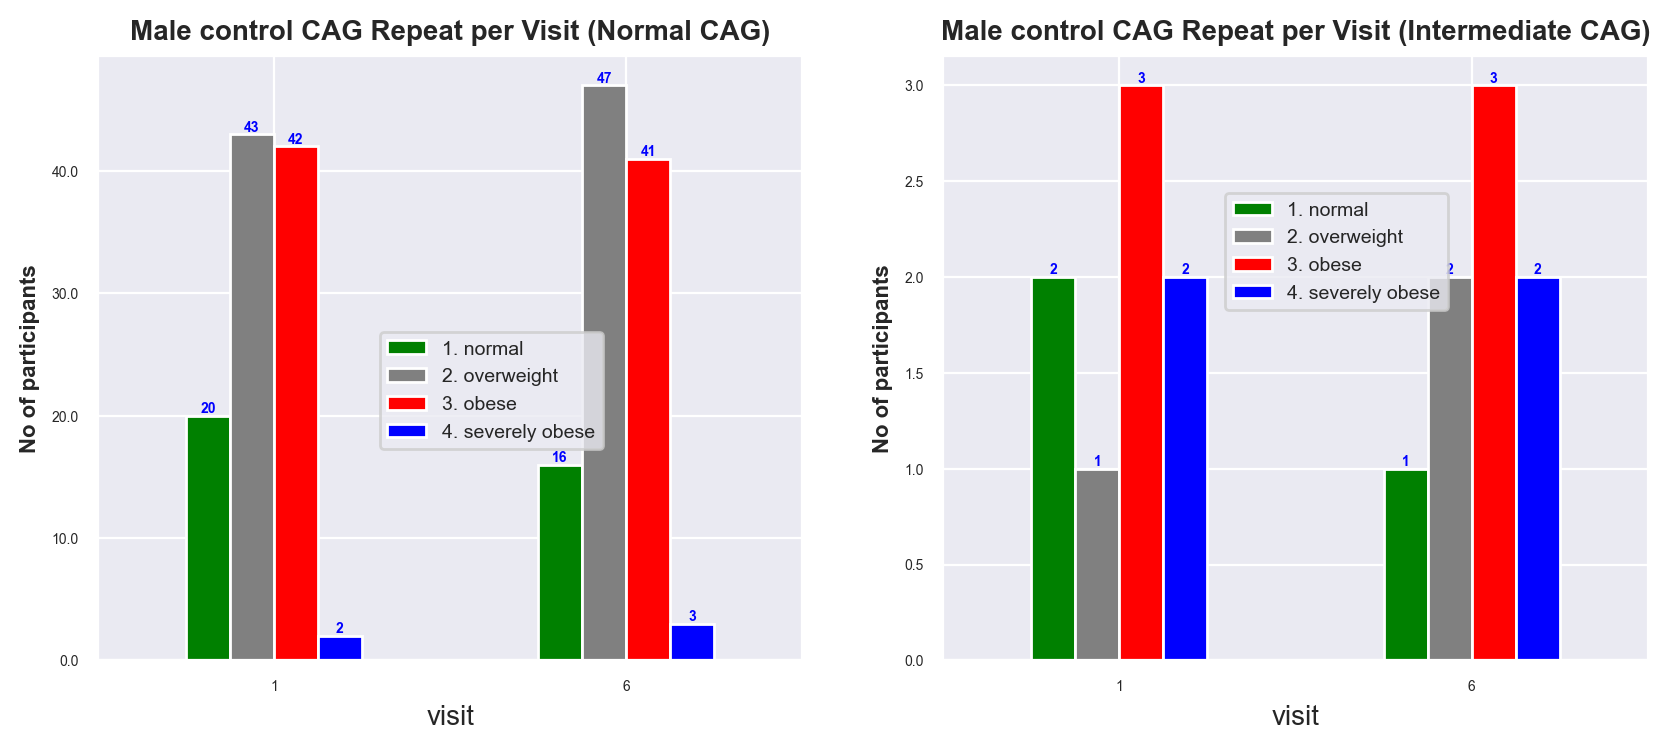

In [50]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_normal.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
ctl_intermd.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Male control CAG Repeat per Visit (Normal CAG)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.35])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Male control CAG Repeat per Visit (Intermediate CAG)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.58])

<AxesSubplot:title={'center':'%Male control CAG Repeat per Visit (Intermediate CAG)'}, xlabel='visit', ylabel='%No of participants'>

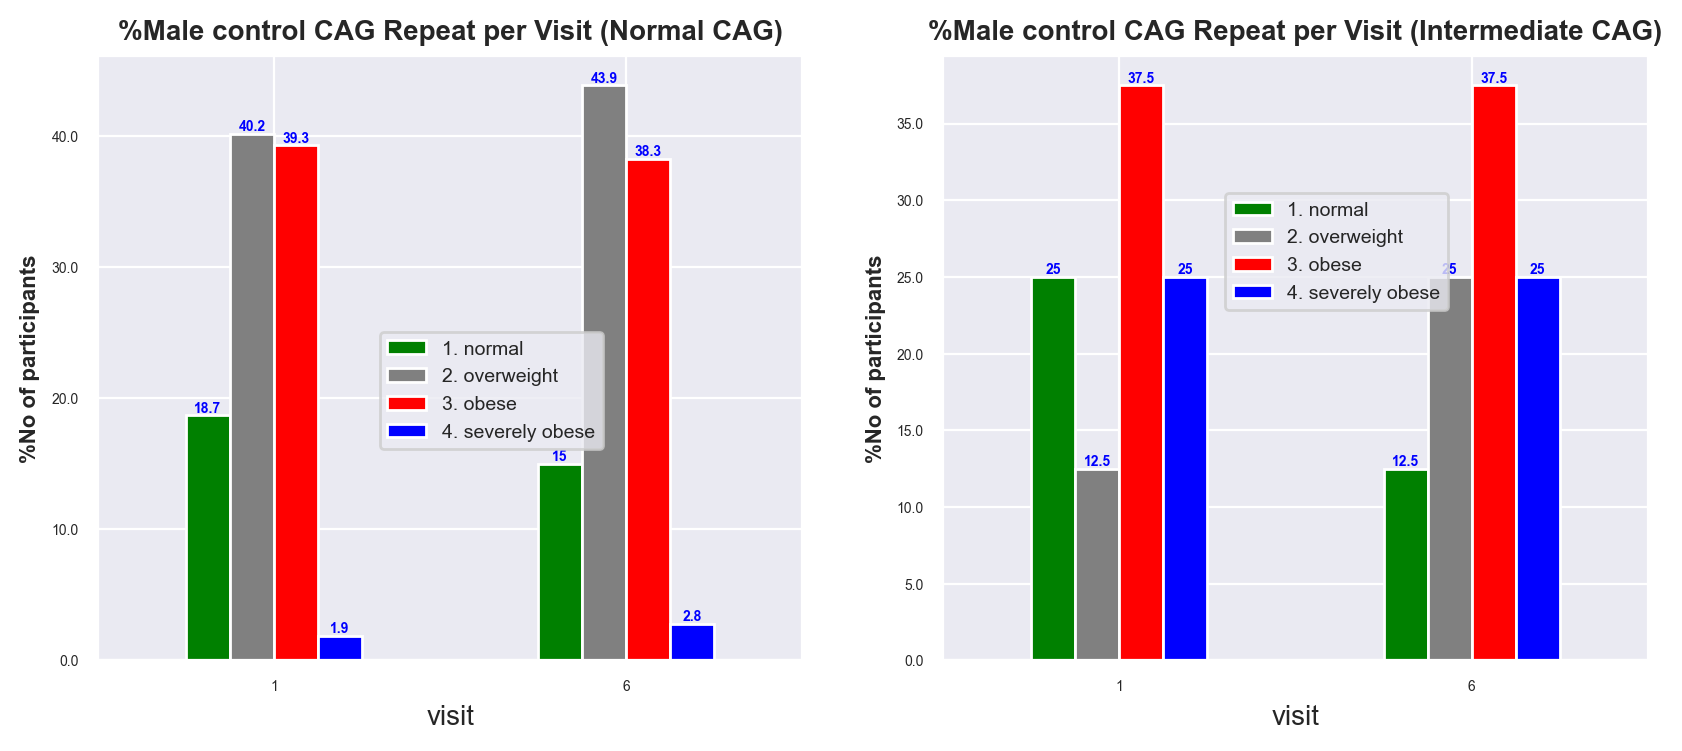

In [51]:
# in percentage
ctl_normal = proj.percentage_per_row(ctl_normal, 'visit', precision=1)
ctl_intermd = proj.percentage_per_row(ctl_intermd, 'visit', precision=1)#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_normal.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
ctl_intermd.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Male control CAG Repeat per Visit (Normal CAG)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.35])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Male control CAG Repeat per Visit (Intermediate CAG)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.58])

#### Male Manifest

In [52]:
# reduced penetrance
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '2. reduced penetrance'
vis1 = proj.count_occurrences(male_manifest[cols], cols)
vis1.loc[:, 'visit'] = 1
display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(male_manifest[cols], cols)
vis6.loc[:, 'visit'] = 6

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_redpen = vis1.append(vis6).reset_index()
display(ctl_redpen)

# Full Penetrance
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '3. full penetrance'
vis1 = proj.count_occurrences(male_manifest[cols], cols)
vis1.loc[:, 'visit'] = 1
# display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(male_manifest[cols], cols)
vis6.loc[:, 'visit'] = 6
# display(vis6)

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_fulpen = vis1.append(vis6).reset_index()
display(ctl_fulpen)

caghigh_band    bmi_level_vis_1  total_count  visit
0  2. reduced penetrance          1. normal            3      1
1  2. reduced penetrance      2. overweight            3      1
2  2. reduced penetrance           3. obese            2      1
3     3. full penetrance     0. underweight            4      1
4     3. full penetrance          1. normal          117      1
5     3. full penetrance      2. overweight          116      1
6     3. full penetrance           3. obese           39      1
7     3. full penetrance  4. severely obese            2      1

bmi_level_vis_1  1. normal  2. overweight  3. obese
visit                                              
1                        3              3         2

bmi_level_vis_6  1. normal  2. overweight  3. obese
visit                                              
6                        2              4         2

visit  1. normal  2. overweight  3. obese
0      1          3              3         2
1      6          2              4         2

bmi_level_vis_1  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
1                             4        117            116        39   

bmi_level_vis_1  4. severely obese  
visit                               
1                                2

bmi_level_vis_6  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
6                            13        136             91        35   

bmi_level_vis_6  4. severely obese  
visit                               
6                                3

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               4        117            116        39   
1      6              13        136             91        35   

   4. severely obese  
0                  2  
1                  3

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Male manifest CAG Repeat per Visit (Full Penetrance)'}, xlabel='visit', ylabel='No of participants'>

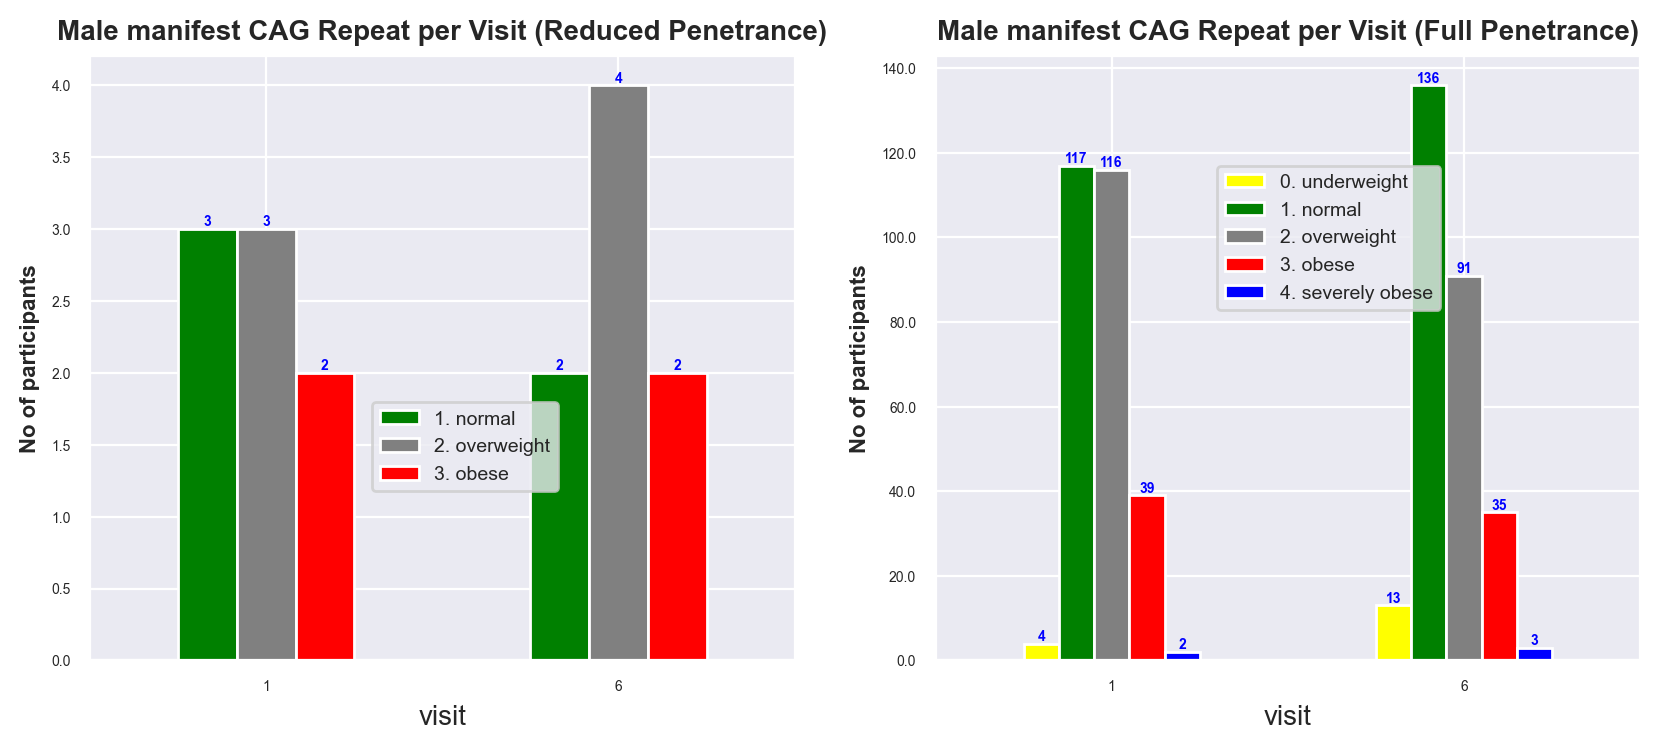

In [53]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
ctl_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Male manifest CAG Repeat per Visit (Reduced Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Male manifest CAG Repeat per Visit (Full Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.58])

<AxesSubplot:title={'center':'%Male manifest CAG Repeat per Visit (Full Penetrance)'}, xlabel='visit', ylabel='%No of participants'>

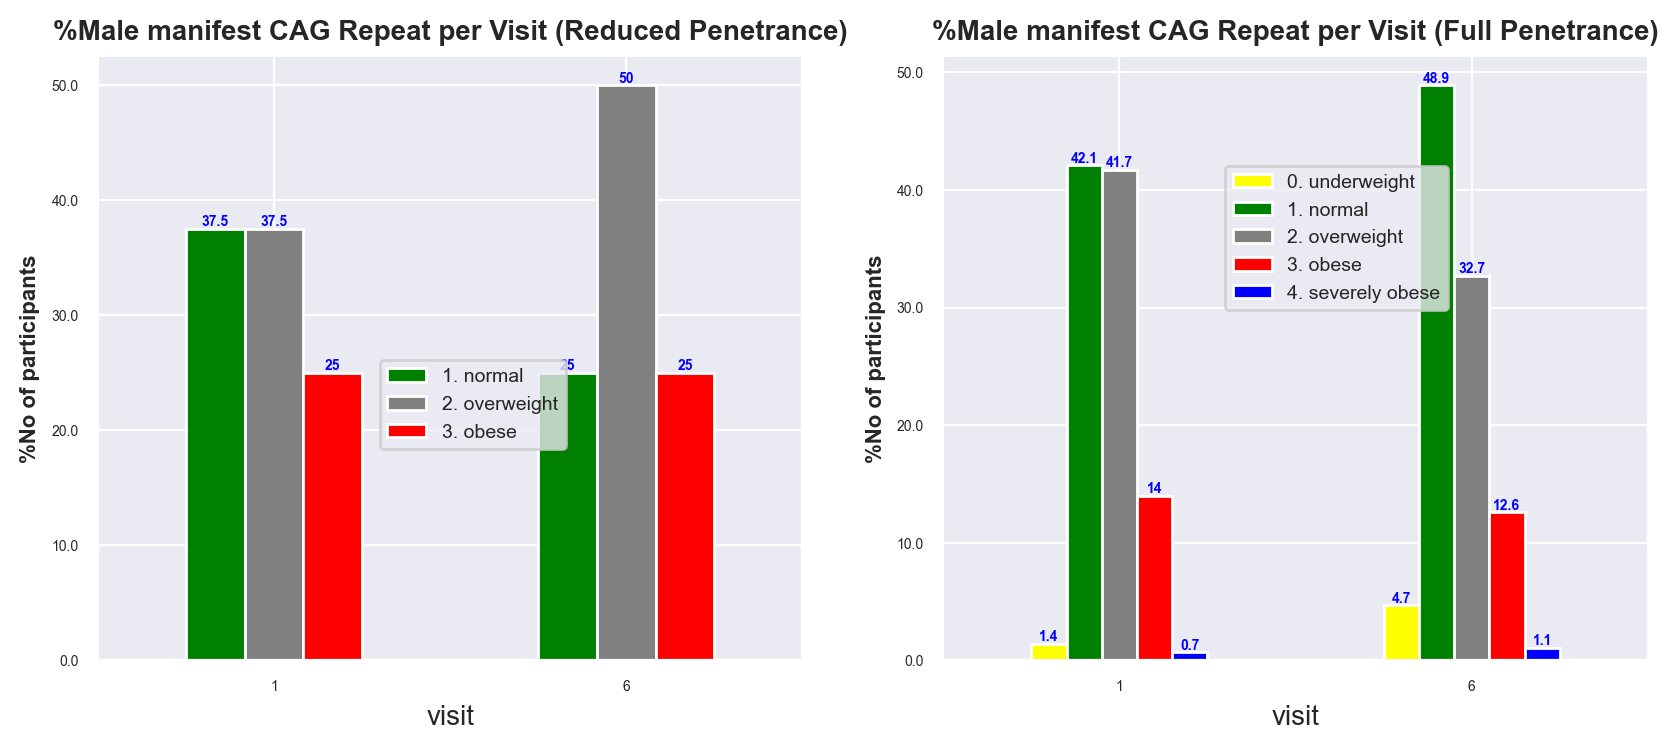

In [54]:
# in percentage
ctl_redpen = proj.percentage_per_row(ctl_redpen, 'visit', precision=1)
ctl_fulpen = proj.percentage_per_row(ctl_fulpen, 'visit', precision=1)#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_redpen.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
ctl_fulpen.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Male manifest CAG Repeat per Visit (Reduced Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.35])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Male manifest CAG Repeat per Visit (Full Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.58])

#### Female Control

In [55]:
# normal cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '0. normal'
vis1 = proj.count_occurrences(female_control[cols], cols)
vis1.loc[:, 'visit'] = 1
display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(female_control[cols], cols)
vis6.loc[:, 'visit'] = 6

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_normal = vis1.append(vis6).reset_index()
display(ctl_normal)

# intermediate cag
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '1. intermediate'
vis1 = proj.count_occurrences(female_control[cols], cols)
vis1.loc[:, 'visit'] = 1
# display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(female_control[cols], cols)
vis6.loc[:, 'visit'] = 6
# display(vis6)

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_intermd = vis1.append(vis6).reset_index()
display(ctl_intermd)

caghigh_band    bmi_level_vis_1  total_count  visit
0        0. normal     0. underweight            3      1
1        0. normal          1. normal           62      1
2        0. normal      2. overweight           52      1
3        0. normal           3. obese           62      1
4        0. normal  4. severely obese           17      1
5  1. intermediate          1. normal            4      1
6  1. intermediate      2. overweight            4      1
7  1. intermediate  4. severely obese            1      1

bmi_level_vis_1  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
1                             3         62             52        62   

bmi_level_vis_1  4. severely obese  
visit                               
1                               17

bmi_level_vis_6  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
6                             3         63             51        56   

bmi_level_vis_6  4. severely obese  
visit                               
6                               23

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               3         62             52        62   
1      6               3         63             51        56   

   4. severely obese  
0                 17  
1                 23

bmi_level_vis_1  1. normal  2. overweight  4. severely obese
visit                                                       
1                        4              4                  1

bmi_level_vis_6  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                 
6                        4              3         1                  1

visit  1. normal  2. overweight  4. severely obese  3. obese
0      1          4              4                  1       NaN
1      6          4              3                  1       1.0

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Female control CAG Repeat per Visit (Intermediate CAG)'}, xlabel='visit', ylabel='No of participants'>

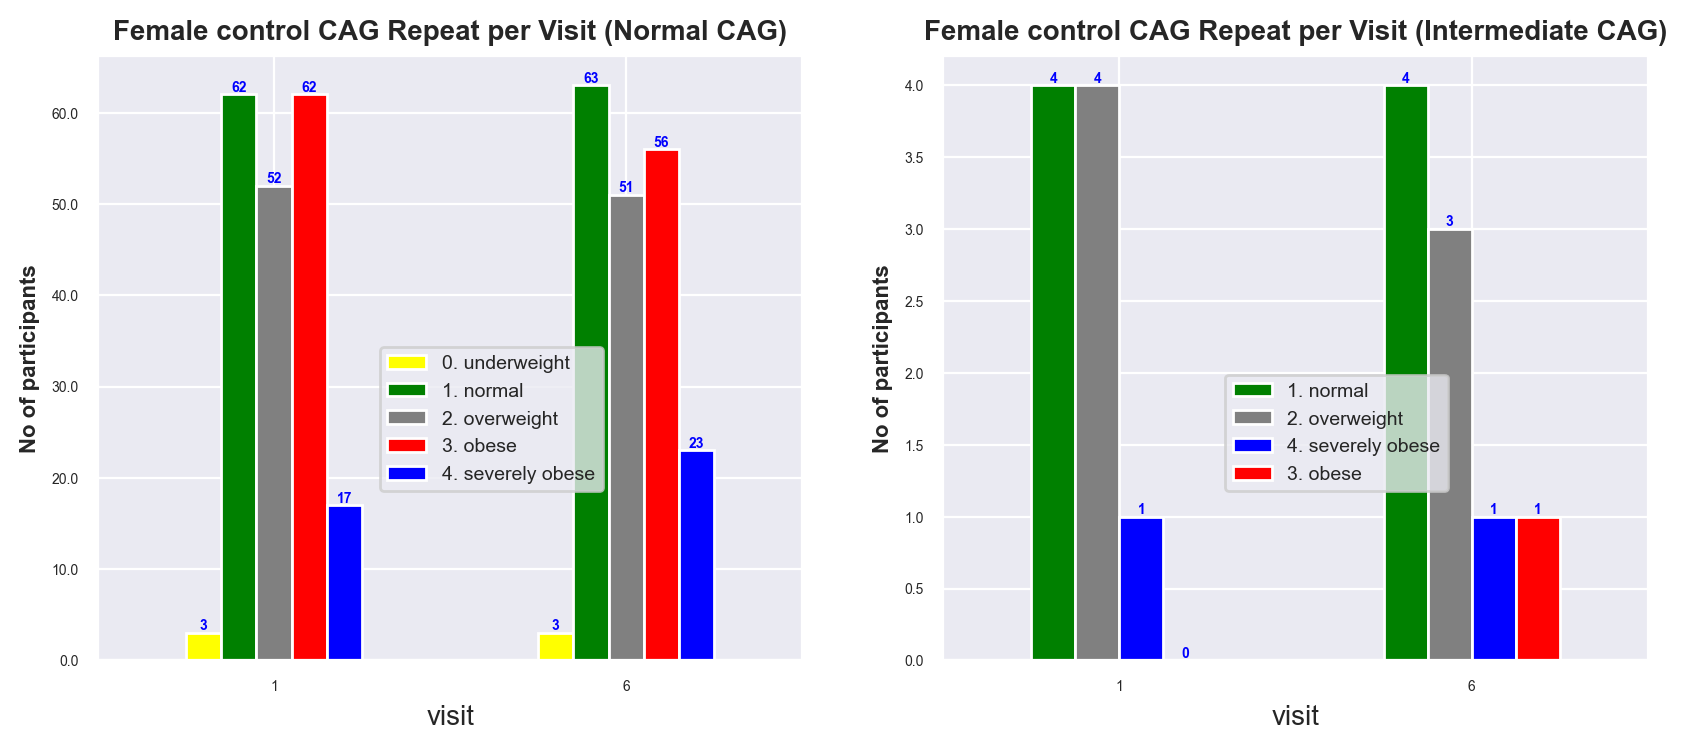

In [56]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_normal.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
ctl_intermd.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Female control CAG Repeat per Visit (Normal CAG)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Female control CAG Repeat per Visit (Intermediate CAG)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

<AxesSubplot:title={'center':'%Female control CAG Repeat per Visit (Intermediate CAG)'}, xlabel='visit', ylabel='%No of participants'>

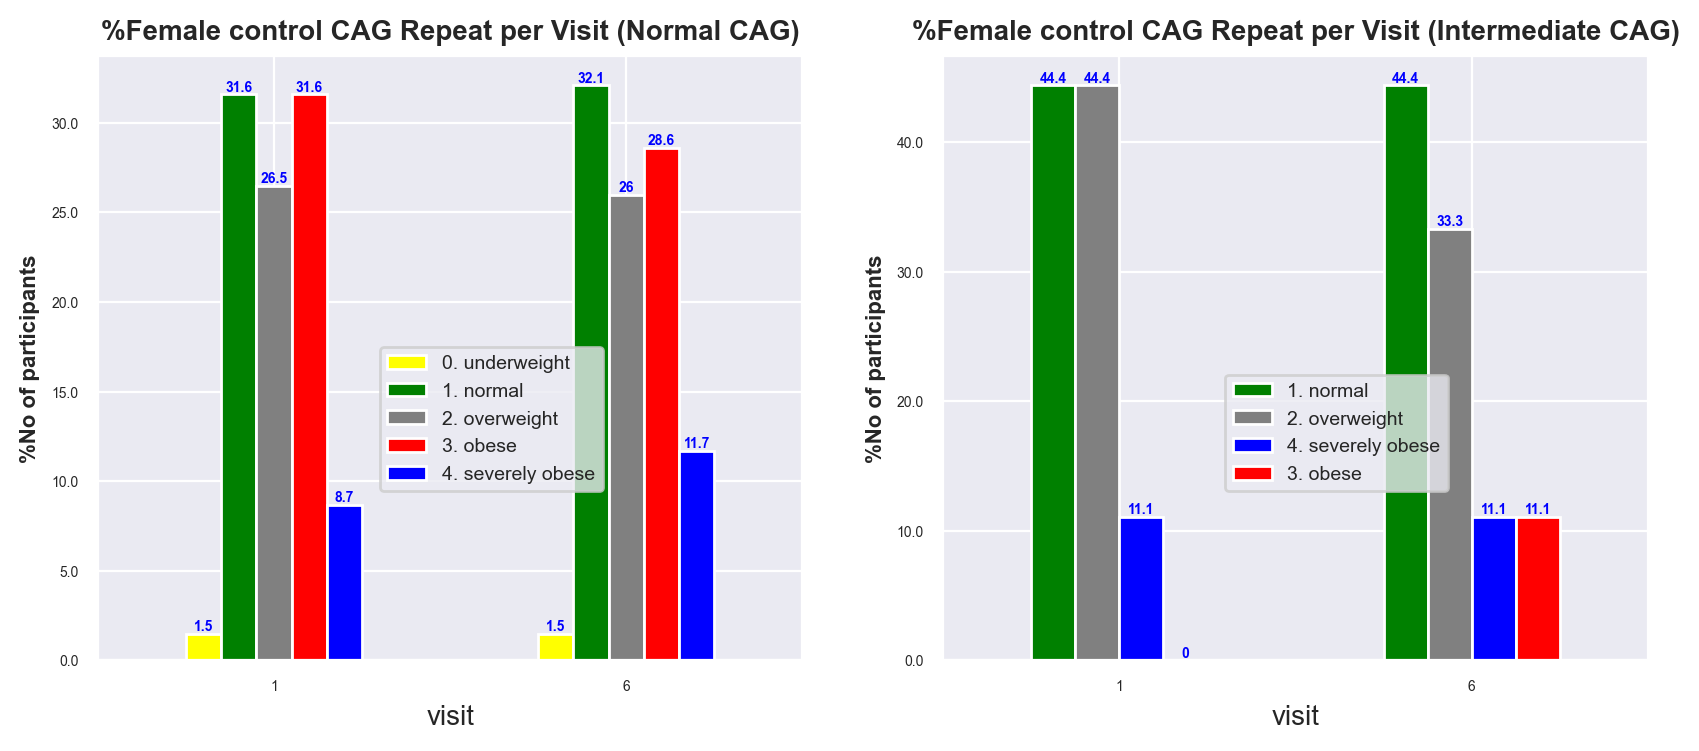

In [57]:
# in percentage
ctl_normal = proj.percentage_per_row(ctl_normal, 'visit', precision=1)
ctl_intermd = proj.percentage_per_row(ctl_intermd, 'visit', precision=1)#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_normal.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
ctl_intermd.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Female control CAG Repeat per Visit (Normal CAG)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Female control CAG Repeat per Visit (Intermediate CAG)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

#### Female Manifest

In [58]:
# reduced penetrance
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '2. reduced penetrance'
vis1 = proj.count_occurrences(female_manifest[cols], cols)
vis1.loc[:, 'visit'] = 1
display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(female_manifest[cols], cols)
vis6.loc[:, 'visit'] = 6

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_redpen = vis1.append(vis6).reset_index()
display(ctl_redpen)

# Full Penetrance
# vis 1
cols = ['caghigh_band', 'bmi_level_vis_1',]
cag_lvl = '3. full penetrance'
vis1 = proj.count_occurrences(female_manifest[cols], cols)
vis1.loc[:, 'visit'] = 1
# display(vis1)

vis1 = vis1.loc[vis1[cols[0]] == cag_lvl]
vis1 = pd.pivot(vis1, values='total_count', index='visit', columns=cols[-1])
display(vis1)

# vis 6
cols = ['caghigh_band', 'bmi_level_vis_6',]
vis6 = proj.count_occurrences(female_manifest[cols], cols)
vis6.loc[:, 'visit'] = 6
# display(vis6)

vis6 = vis6.loc[vis6[cols[0]] == cag_lvl]
vis6 = pd.pivot(vis6, values='total_count', index='visit', columns=cols[-1])
display(vis6)
ctl_fulpen = vis1.append(vis6).reset_index()
display(ctl_fulpen)

caghigh_band    bmi_level_vis_1  total_count  visit
0  2. reduced penetrance     0. underweight            1      1
1  2. reduced penetrance          1. normal            3      1
2  2. reduced penetrance      2. overweight            1      1
3  2. reduced penetrance           3. obese            3      1
4  2. reduced penetrance  4. severely obese            1      1
5     3. full penetrance     0. underweight           16      1
6     3. full penetrance          1. normal          122      1
7     3. full penetrance      2. overweight           63      1
8     3. full penetrance           3. obese           47      1
9     3. full penetrance  4. severely obese            3      1

bmi_level_vis_1  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
1                             1          3              1         3   

bmi_level_vis_1  4. severely obese  
visit                               
1                                1

bmi_level_vis_6  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
6                             1          2              3         2   

bmi_level_vis_6  4. severely obese  
visit                               
6                                1

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               1          3              1         3   
1      6               1          2              3         2   

   4. severely obese  
0                  1  
1                  1

bmi_level_vis_1  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
1                            16        122             63        47   

bmi_level_vis_1  4. severely obese  
visit                               
1                                3

bmi_level_vis_6  0. underweight  1. normal  2. overweight  3. obese  \
visit                                                                 
6                            17        128             55        45   

bmi_level_vis_6  4. severely obese  
visit                               
6                                6

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1              16        122             63        47   
1      6              17        128             55        45   

   4. severely obese  
0                  3  
1                  6

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Female manifest CAG Repeat per Visit (Full Penetrance)'}, xlabel='visit', ylabel='No of participants'>

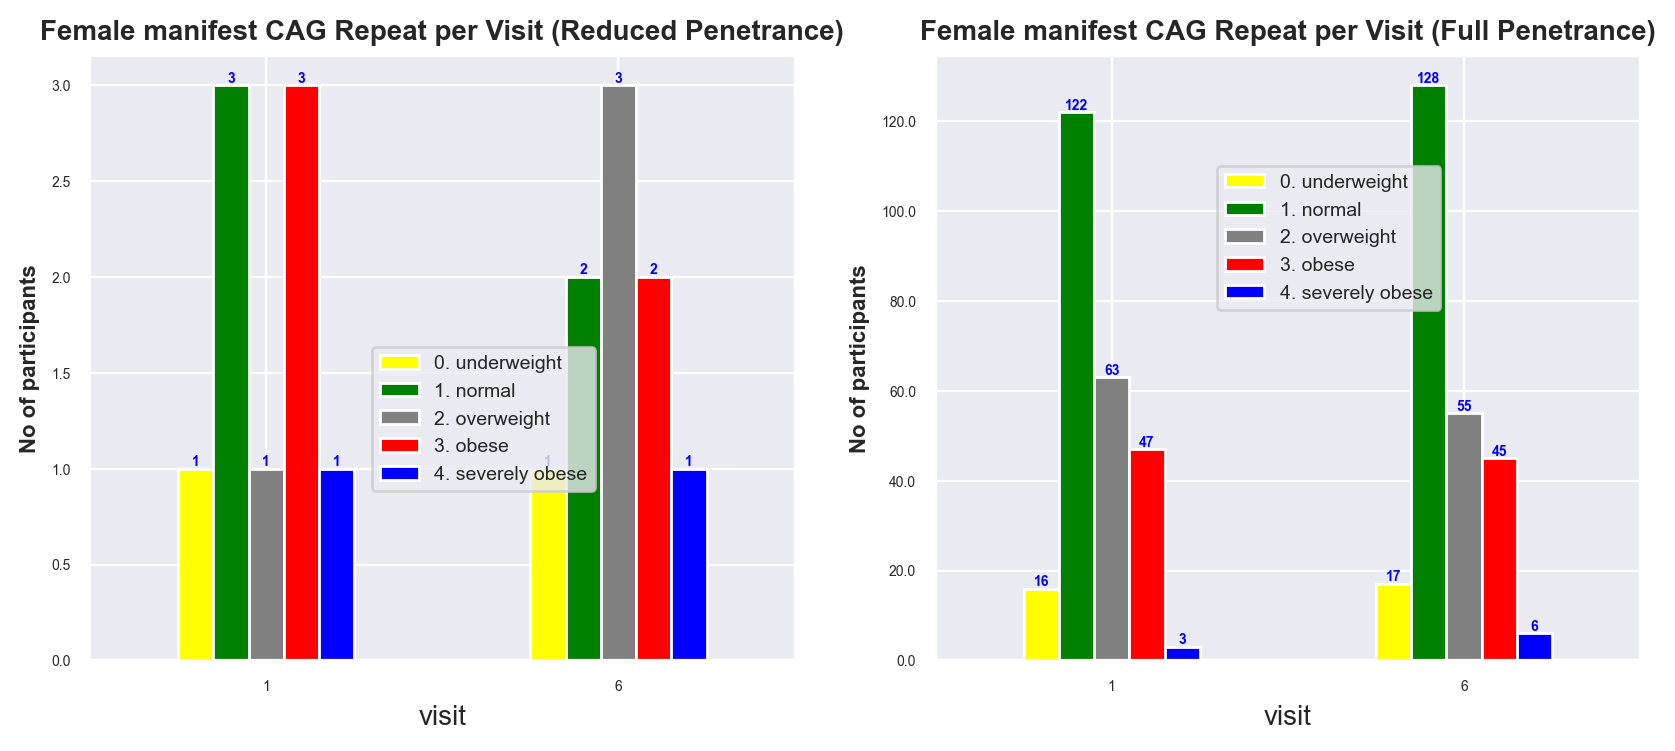

In [59]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
ctl_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Female manifest CAG Repeat per Visit (Reduced Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Female manifest CAG Repeat per Visit (Full Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.58])

<AxesSubplot:title={'center':'%Female manifest CAG Repeat per Visit (Full Penetrance)'}, xlabel='visit', ylabel='%No of participants'>

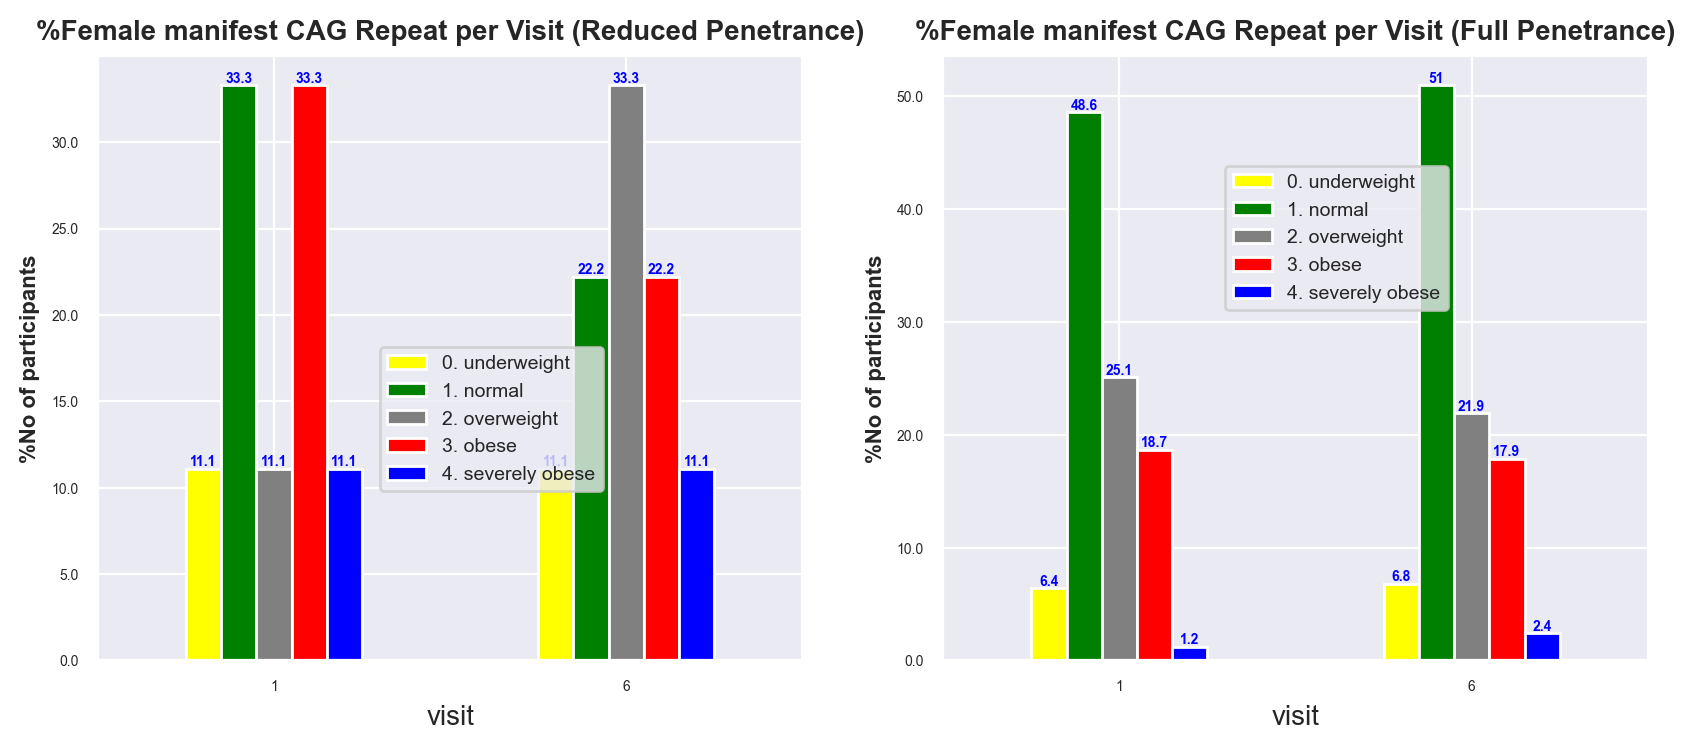

In [60]:
# in percentage
ctl_redpen = proj.percentage_per_row(ctl_redpen, 'visit', precision=1)
ctl_fulpen = proj.percentage_per_row(ctl_fulpen, 'visit', precision=1)#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
ctl_redpen.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
ctl_fulpen.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Female manifest CAG Repeat per Visit (Reduced Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Female manifest CAG Repeat per Visit (Full Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.58])

### No high calorie supplement recipient

In [61]:
# male reduced penetrance manifest
cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_1']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis1
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 1, '2. reduced penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
male_redpen = freq.loc[cond]
male_redpen.loc[:, 'visit'] = 1
vis1 = pd.pivot_table(male_redpen, values='total_count', index='visit', columns=cols[-1])

cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_6']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis6
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 1, '2. reduced penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
male_redpen = freq.loc[cond]
male_redpen.loc[:, 'visit'] = 6
vis6 = pd.pivot_table(male_redpen, values='total_count', index='visit', columns=cols[-1])

male_redpen = vis1.append(vis6).reset_index()
display(male_redpen)

# male full penetrance manifest
cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_1']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis1
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 1, '3. full penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
male_fulpen = freq.loc[cond]
male_fulpen.loc[:, 'visit'] = 1
vis1 = pd.pivot_table(male_fulpen, values='total_count', index='visit', columns=cols[-1])

cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_6']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis6
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 1, '3. full penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
male_fulpen = freq.loc[cond]
male_fulpen.loc[:, 'visit'] = 6
vis6 = pd.pivot_table(male_fulpen, values='total_count', index='visit', columns=cols[-1])

male_fulpen = vis1.append(vis6).reset_index()
display(male_fulpen)

0

546

C:\Users\welcome\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0

546

visit  1. normal  2. overweight  3. obese
0      1          3              3         2
1      6          2              4         2

0

546

C:\Users\welcome\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0

546

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               4        117            116        39   
1      6              13        136             91        35   

   4. severely obese  
0                  2  
1                  3

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Excluding Male Recipients of High \nCalorie Supplements (Full Penetrance)'}, xlabel='visit', ylabel='No of participants'>

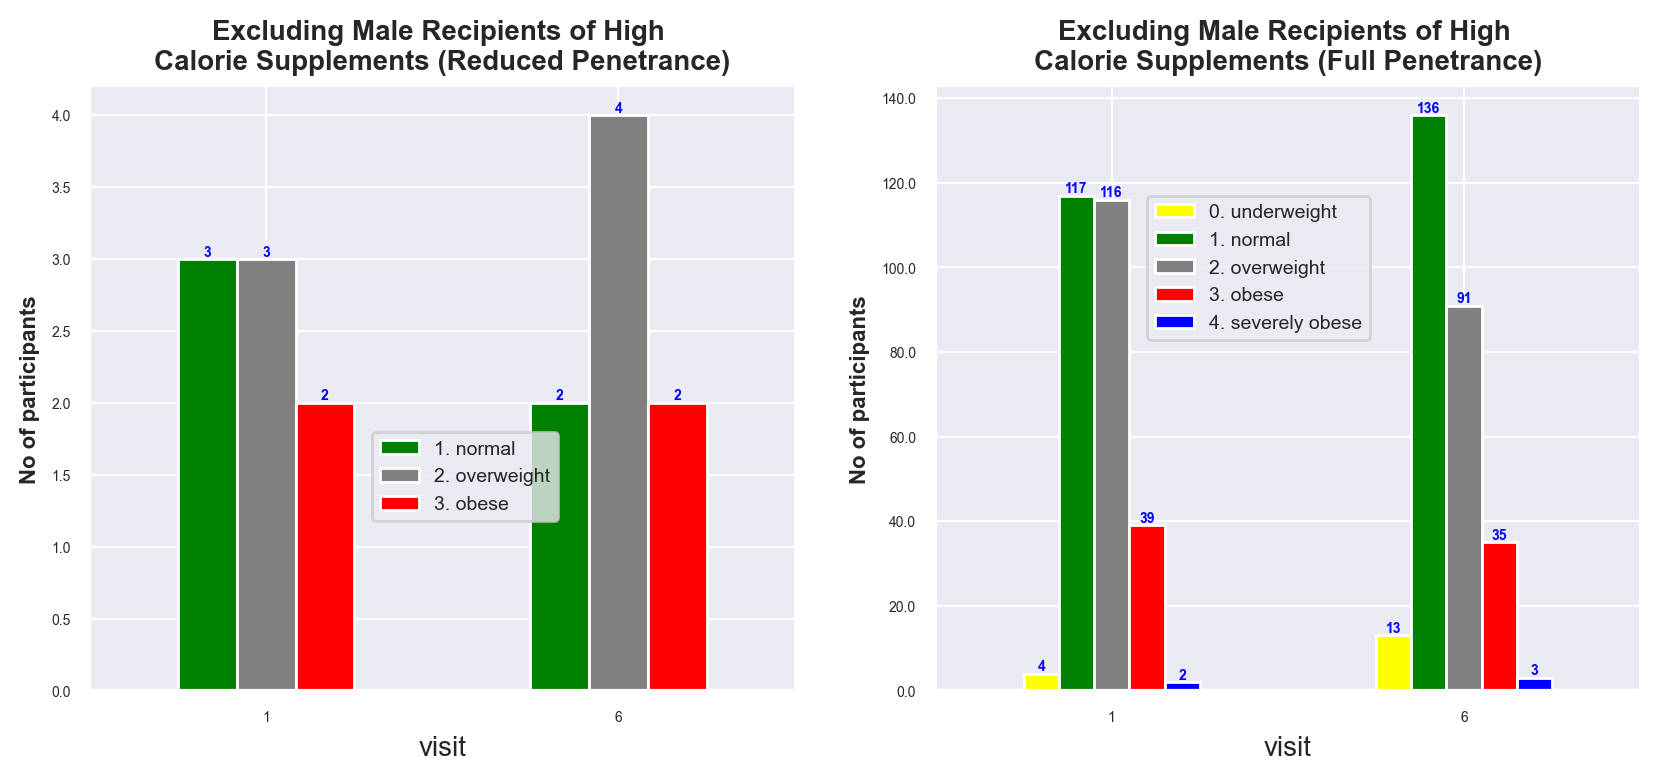

In [62]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
male_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
male_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Excluding Male Recipients of High \nCalorie Supplements (Reduced Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Excluding Male Recipients of High \nCalorie Supplements (Full Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.3, 0.58])

<AxesSubplot:title={'center':'%Excluding Male Recipients of High \nCalorie Supplements (Full Penetrance)'}, xlabel='visit', ylabel='%No of participants'>

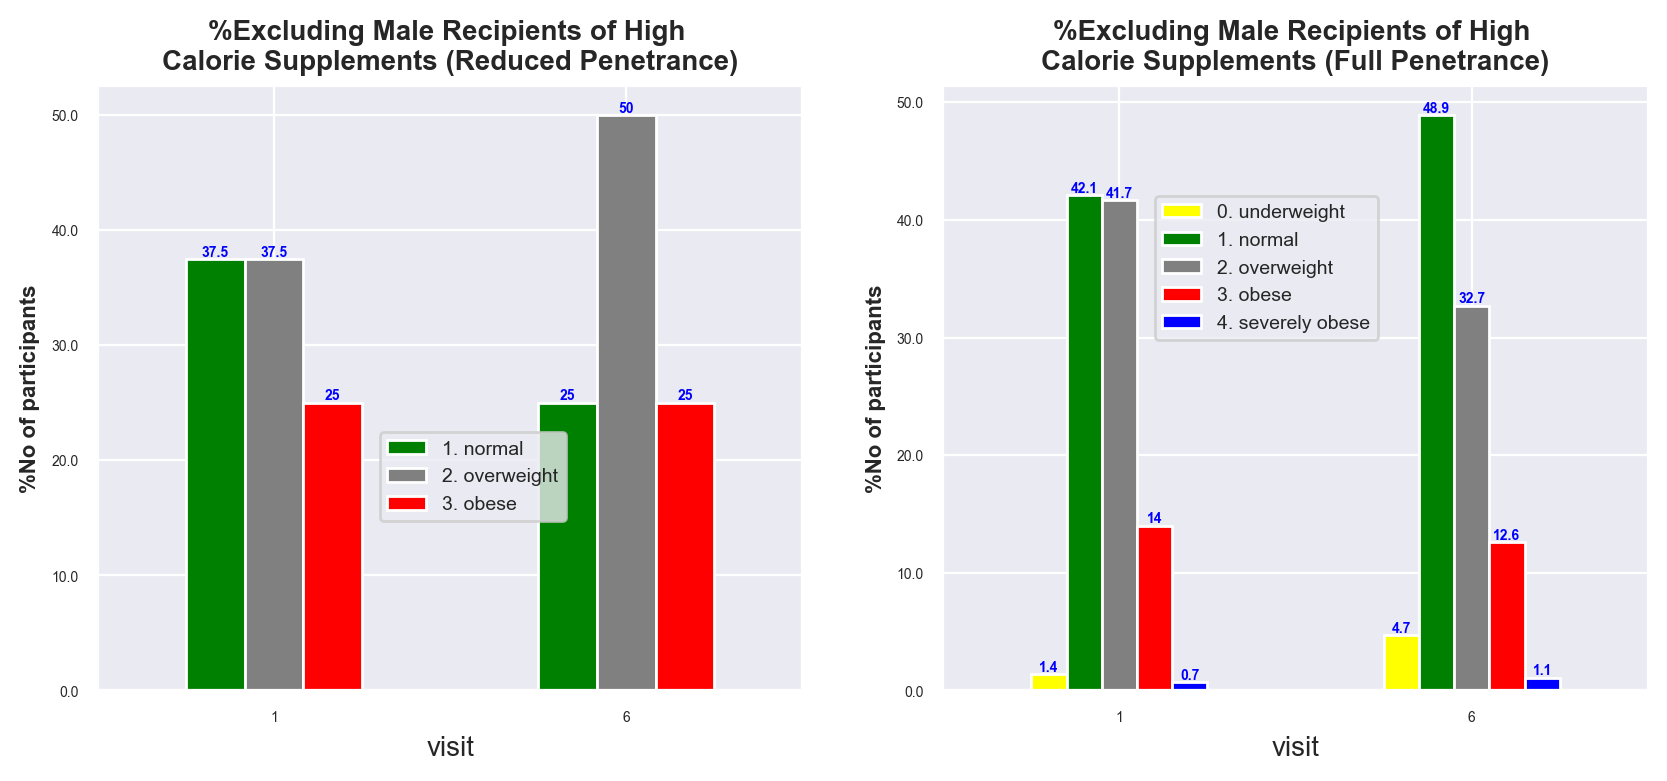

In [63]:
# in percentage
male_redpen = proj.percentage_per_row(male_redpen, 'visit', precision=1).reset_index()
male_fulpen = proj.percentage_per_row(male_fulpen, 'visit', precision=1).reset_index()#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
male_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
male_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Excluding Male Recipients of High \nCalorie Supplements (Reduced Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Excluding Male Recipients of High \nCalorie Supplements (Full Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.3, 0.58])

In [64]:
# female reduced penetrance manifest
cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_1']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis1
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 0, '2. reduced penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
female_redpen = freq.loc[cond]
female_redpen.loc[:, 'visit'] = 1
vis1 = pd.pivot_table(female_redpen, values='total_count', index='visit', columns=cols[-1])

cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_6']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis6
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 0, '2. reduced penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
female_redpen = freq.loc[cond]
female_redpen.loc[:, 'visit'] = 6
vis6 = pd.pivot_table(female_redpen, values='total_count', index='visit', columns=cols[-1])

female_redpen = vis1.append(vis6).reset_index()
display(female_redpen)

# female full penetrance manifest
cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_1']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis1
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 0, '3. full penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
female_fulpen = freq.loc[cond]
female_fulpen.loc[:, 'visit'] = 1
vis1 = pd.pivot_table(female_fulpen, values='total_count', index='visit', columns=cols[-1])

cols = ['is_high_calorie', 'is_male', 'caghigh_band', 'bmi_level_vis_6']
had_supplement = manifest[cols].loc[manifest[cols[0]] == 1]
no_supplement = manifest[cols].loc[manifest[cols[0]] == 0]
display(len(had_supplement), len(no_supplement))

# vis6
freq = proj.count_occurrences(no_supplement[cols[1:]])

gend, cag_lvl = 0, '3. full penetrance'
cond = ((freq['is_male'] == gend) &
        (freq['caghigh_band'] == cag_lvl))
female_fulpen = freq.loc[cond]
female_fulpen.loc[:, 'visit'] = 6
vis6 = pd.pivot_table(female_fulpen, values='total_count', index='visit', columns=cols[-1])

female_fulpen = vis1.append(vis6).reset_index()
display(female_fulpen)

0

546

C:\Users\welcome\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0

546

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               1          3              1         3   
1      6               1          2              3         2   

   4. severely obese  
0                  1  
1                  1

0

546

C:\Users\welcome\venv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0

546

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1              16        122             63        47   
1      6              17        128             55        45   

   4. severely obese  
0                  3  
1                  6

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Excluding Female Recipients of High \nCalorie Supplements (Full Penetrance)'}, xlabel='visit', ylabel='No of participants'>

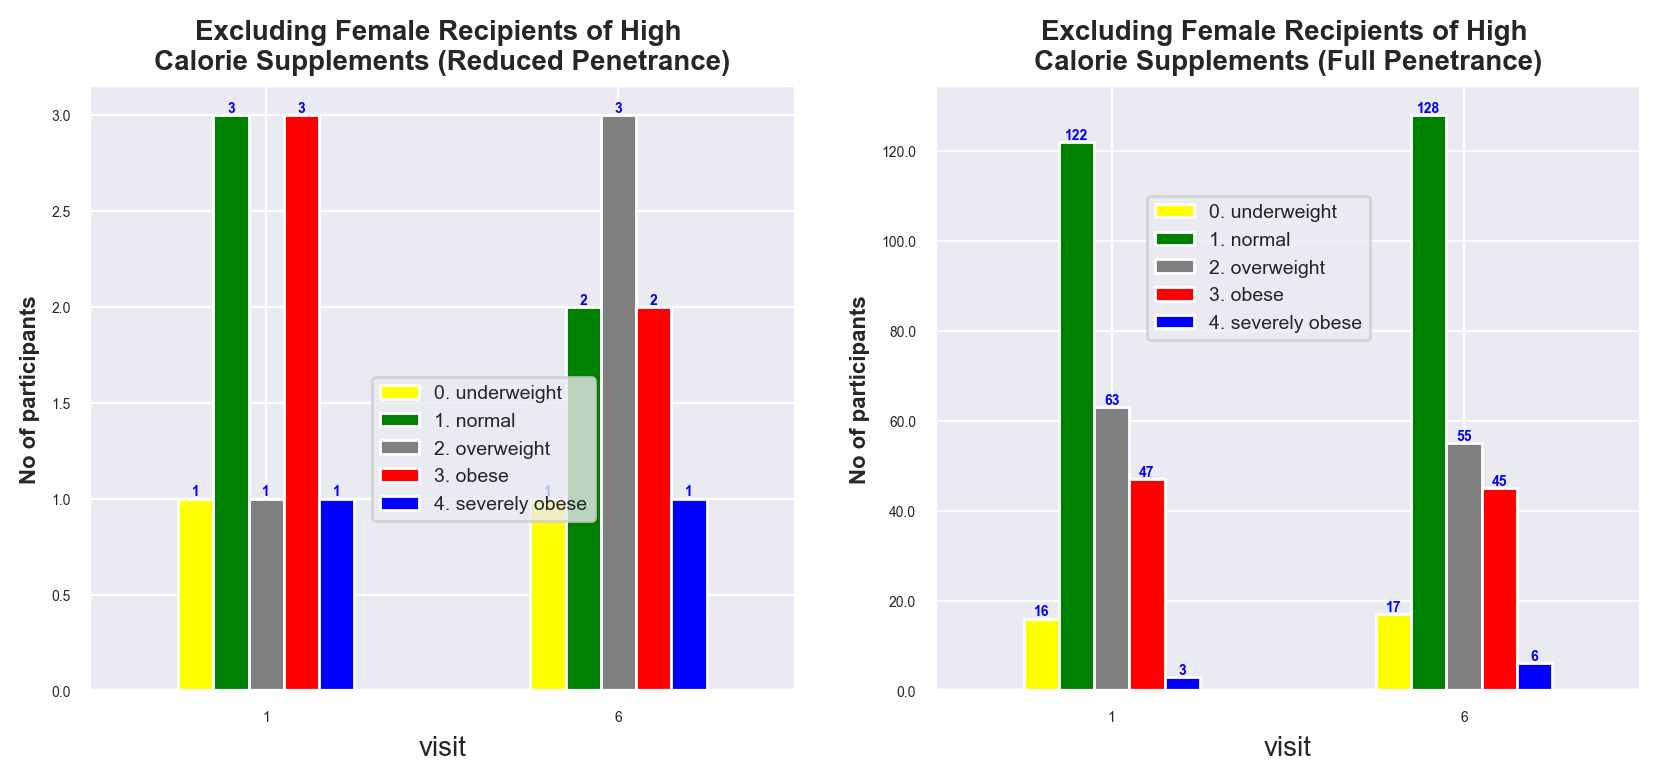

In [65]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
female_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
female_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='Excluding Female Recipients of High \nCalorie Supplements (Reduced Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='Excluding Female Recipients of High \nCalorie Supplements (Full Penetrance)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.3, 0.58])

<AxesSubplot:title={'center':'%Excluding Female Recipients of High \nCalorie Supplements (Full Penetrance)'}, xlabel='visit', ylabel='%No of participants'>

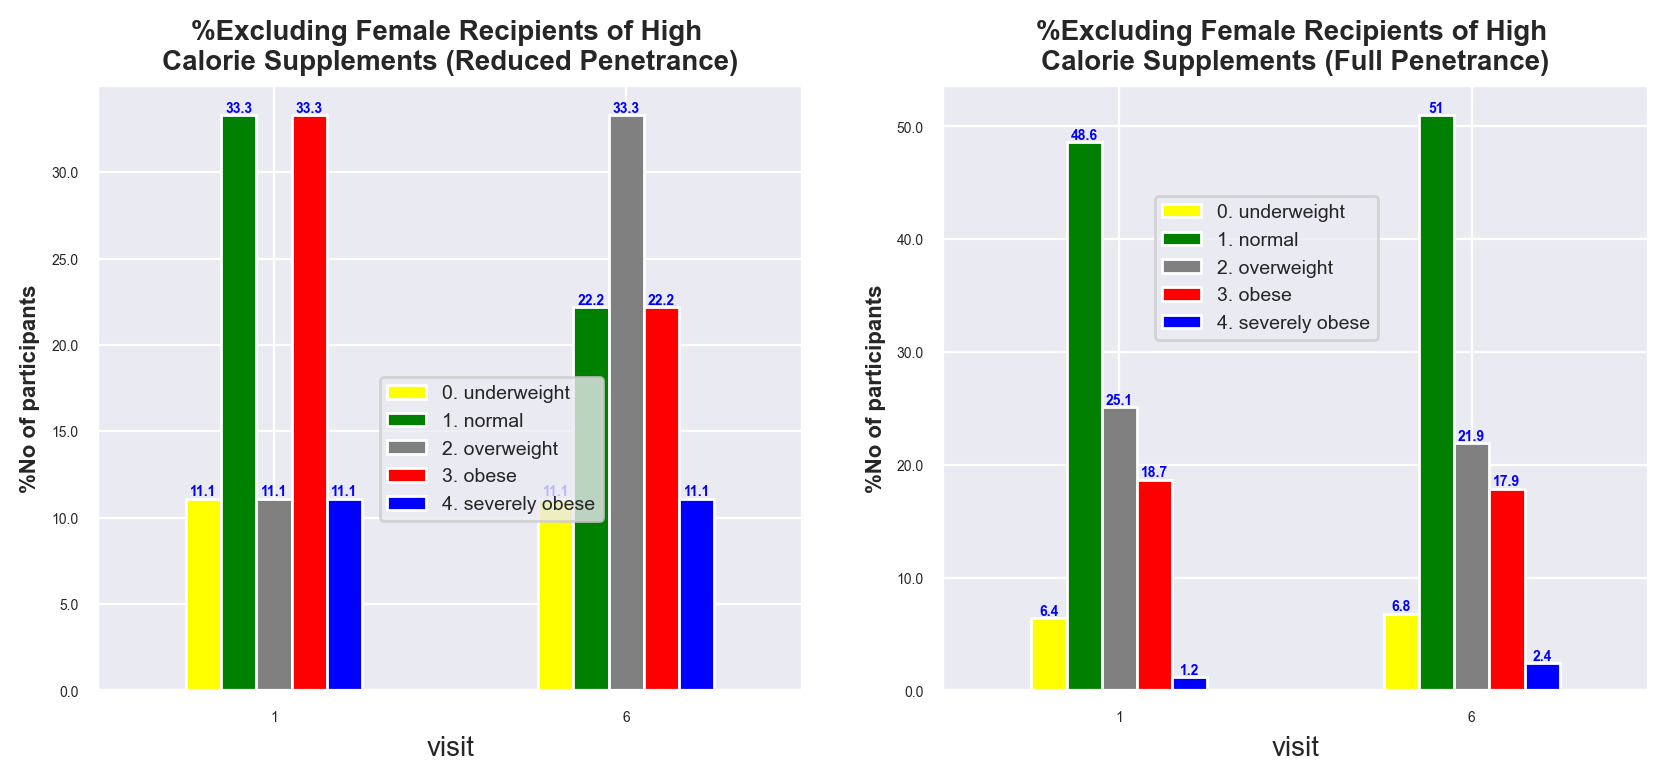

In [66]:
# in percentage
female_redpen = proj.percentage_per_row(female_redpen, 'visit', precision=1).reset_index()
female_fulpen = proj.percentage_per_row(female_fulpen, 'visit', precision=1).reset_index()#.sum(axis=1)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
female_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
female_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)
proj.adjust_axis(l, annotate=True, annot_size=5, 
                 plot_title='%Excluding Female Recipients of High \nCalorie Supplements (Reduced Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])
proj.adjust_axis(r, annotate=True, annot_size=5, 
                 plot_title='%Excluding Female Recipients of High \nCalorie Supplements (Full Penetrance)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.3, 0.58])

### No swallowing therapy Recipients

In [67]:
cols = ['caghigh_band', 'bmi_level_vis_1', 'is_high_calorie', 'received_swallowing_therapy']

cond = ((manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
manifest.loc[cond, cols]

caghigh_band bmi_level_vis_1  is_high_calorie  \
0    3. full penetrance       1. normal                0   
1    3. full penetrance   2. overweight                0   
2    3. full penetrance       1. normal                0   
3    3. full penetrance        3. obese                0   
4    3. full penetrance       1. normal                0   
..                  ...             ...              ...   
541  3. full penetrance       1. normal                0   
542  3. full penetrance   2. overweight                0   
543  3. full penetrance        3. obese                0   
544  3. full penetrance   2. overweight                0   
545  3. full penetrance       1. normal                0   

     received_swallowing_therapy  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
..                           ...  
541                            0  
542                            0  
543                            0  
544                            0  
545                            0  

[546 rows x 4 columns]

In [68]:
# overall manifest
# visit 1
cols = ['caghigh_band', 'bmi_level_vis_1', 'is_high_calorie', 'received_swallowing_therapy']

cond = ((manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(np.unique(no_swt_hkal[cols[-2]]),
#        no_swt_hkal)
freq = proj.count_occurrences(no_swt_hkal.drop(cols[-2:], axis=1), cols[:-2])
freq.loc[:, 'visit'] = 1
# display(freq)
vis1 = pd.pivot(freq, index='visit', columns=cols[:-2], values='total_count')
# display(vis1)

# visit 6
cols = ['caghigh_band', 'bmi_level_vis_6', 'is_high_calorie', 'received_swallowing_therapy']

cond = ((manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(np.unique(no_swt_hkal[cols[-2]]),
#        no_swt_hkal)
freq = proj.count_occurrences(no_swt_hkal.drop(cols[-2:], axis=1), cols[:-2])
freq.loc[:, 'visit'] = 6
# display(freq)
vis6 = pd.pivot(freq, index='visit', columns=cols[:-2], values='total_count')
# display(vis6)
v1v6 = vis1.append(vis6)
display(v1v6)

# reduced penetrance
redpen = v1v6.loc[:, '2. reduced penetrance'].reset_index()
fulpen = v1v6.loc[:, '3. full penetrance'].reset_index()
display(redpen, fulpen)

caghigh_band 2. reduced penetrance                                   \
                    0. underweight 1. normal 2. overweight 3. obese   
visit                                                                 
1                                1         6             4        5   
6                                1         4             7        4   

caghigh_band                   3. full penetrance                          \
             4. severely obese     0. underweight 1. normal 2. overweight   
visit                                                                       
1                            1                 20       239           179   
6                            1                 30       264           146   

caghigh_band                             
             3. obese 4. severely obese  
visit                                    
1                  86                 5  
6                  80                 9

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               1          6              4         5   
1      6               1          4              7         4   

   4. severely obese  
0                  1  
1                  1

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1              20        239            179        86   
1      6              30        264            146        80   

   4. severely obese  
0                  5  
1                  9

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Full Penetrance BMI Change'}, xlabel='visit', ylabel='No of Participants'>

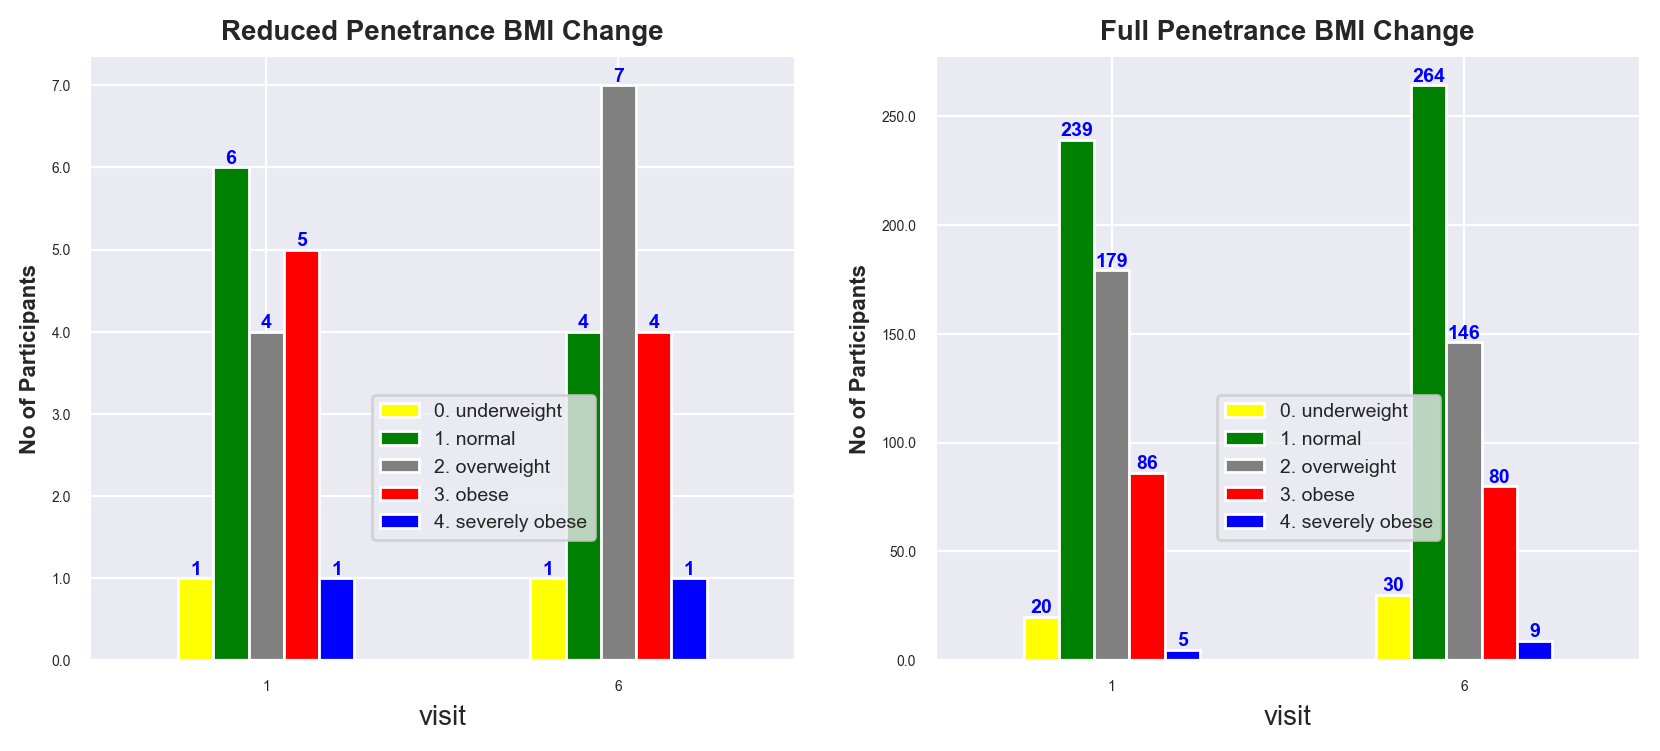

In [69]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="Reduced Penetrance BMI Change", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="Full Penetrance BMI Change", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                 5.9       35.3           23.5      29.4                5.9
6                 5.9       23.5           41.2      23.5                5.9

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                 3.8       45.2           33.8      16.3                0.9
6                 5.7       49.9           27.6      15.1                1.7

visit
1    100.0
6    100.0
dtype: float64

visit
1    100.0
6    100.0
dtype: float64

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Full Penetrance BMI Change'}, xlabel='visit', ylabel='%No of Participants'>

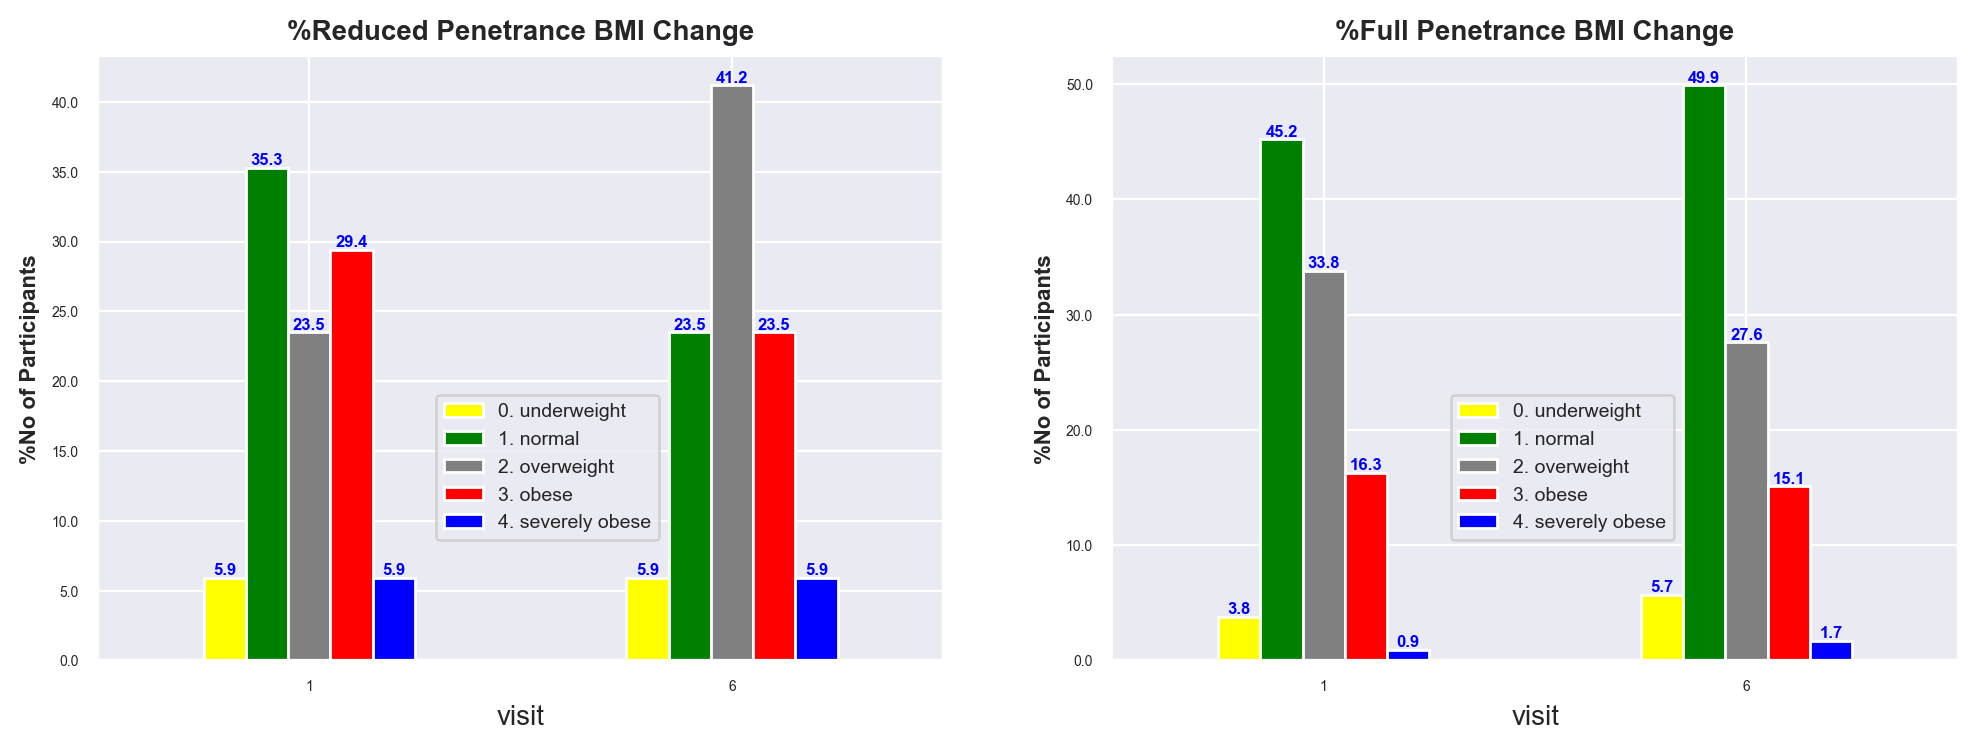

In [70]:
# in percentage
redpen_perc = proj.percentage_per_row(redpen, 'visit', precision=1)
fulpen_perc = proj.percentage_per_row(fulpen, 'visit', precision=1)
display(redpen_perc, fulpen_perc)
display(redpen_perc.sum(axis=1), fulpen_perc.sum(axis=1))

fig, (l, r) = plt.subplots(1, 2, figsize=[12, 4], dpi=200)
redpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
fulpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="%Reduced Penetrance BMI Change", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="%Full Penetrance BMI Change", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

#### Gender Effect

In [71]:
# reduced penetrance
# visit 1
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_1', 'is_high_calorie', 'received_swallowing_therapy']

cond = ((manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal)
display(np.unique(no_swt_hkal[cols[-2]]), np.unique(no_swt_hkal[cols[-1]]))

freq = proj.count_occurrences(no_swt_hkal.drop(cols[-2:], axis=1), cols[:-2])
# display(freq)

cag_lvl = '2. reduced penetrance'
df = freq.loc[freq[cols[0]] == cag_lvl]
# display(df)

vis1 = df.drop(cols[0], axis=1)
vis1.loc[:, 'visit'] = 1
vis1 = pd.pivot(vis1, index='visit', columns=cols[1:3], values='total_count')
# display(vis1)

# visit 6
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_6', 'is_high_calorie', 'received_swallowing_therapy']

cond = ((manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal)
# display(np.unique(no_swt_hkal[cols[-2]]), np.unique(no_swt_hkal[cols[-1]]))

freq = proj.count_occurrences(no_swt_hkal.drop(cols[-2:], axis=1), cols[:-2])
# display(freq)

cag_lvl = '2. reduced penetrance'
redpen = freq.loc[freq[cols[0]] == cag_lvl]
display(redpen)
vis6 = redpen.drop(cols[0], axis=1)
vis6.loc[:, 'visit'] = 6
vis6 = pd.pivot(vis6, index='visit', columns=cols[1:3], values='total_count')
# display(vis6)

v1v6 = vis1.append(vis6)
male_redpen = v1v6.loc[:, 'm'].reset_index()
female_redpen = v1v6.loc[:, 'f'].reset_index()
display(v1v6, male_redpen, female_redpen)

array([0], dtype=int64)

array([0], dtype=int64)

caghigh_band is_male    bmi_level_vis_6  total_count
0  2. reduced penetrance       f     0. underweight            1
1  2. reduced penetrance       f          1. normal            2
2  2. reduced penetrance       f      2. overweight            3
3  2. reduced penetrance       f           3. obese            2
4  2. reduced penetrance       f  4. severely obese            1
5  2. reduced penetrance       m          1. normal            2
6  2. reduced penetrance       m      2. overweight            4
7  2. reduced penetrance       m           3. obese            2

is_male              f                                                     \
        0. underweight 1. normal 2. overweight 3. obese 4. severely obese   
visit                                                                       
1                    1         3             1        3                 1   
6                    1         2             3        2                 1   

is_male         m                         
        1. normal 2. overweight 3. obese  
visit                                     
1               3             3        2  
6               2             4        2

visit  1. normal  2. overweight  3. obese
0      1          3              3         2
1      6          2              4         2

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               1          3              1         3   
1      6               1          2              3         2   

   4. severely obese  
0                  1  
1                  1

In [72]:
# visit 1
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_1', 'is_high_calorie', 'received_swallowing_therapy']

cond = ((manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal)
display(np.unique(no_swt_hkal[cols[-2]]), np.unique(no_swt_hkal[cols[-1]]))

freq = proj.count_occurrences(no_swt_hkal.drop(cols[-2:], axis=1), cols[:-2])
# display(freq)

cag_lvl = '3. full penetrance'
df = freq.loc[freq[cols[0]] == cag_lvl]
# display(df)

vis1 = df.drop(cols[0], axis=1)
vis1.loc[:, 'visit'] = 1
vis1 = pd.pivot(vis1, index='visit', columns=cols[1:3], values='total_count')
# display(vis1)

# visit 6
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_6', 'is_high_calorie', 'received_swallowing_therapy']

cond = ((manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal)
# display(np.unique(no_swt_hkal[cols[-2]]), np.unique(no_swt_hkal[cols[-1]]))

freq = proj.count_occurrences(no_swt_hkal.drop(cols[-2:], axis=1), cols[:-2])
# display(freq)

cag_lvl = '3. full penetrance'
fulpen = freq.loc[freq[cols[0]] == cag_lvl]
display(fulpen)
vis6 = fulpen.drop(cols[0], axis=1)
vis6.loc[:, 'visit'] = 6
vis6 = pd.pivot(vis6, index='visit', columns=cols[1:3], values='total_count')
# display(vis6)

v1v6 = vis1.append(vis6)
male_fulpen = v1v6.loc[:, 'm'].reset_index()
female_fulpen = v1v6.loc[:, 'f'].reset_index()
display(v1v6, male_fulpen, female_fulpen)

array([0], dtype=int64)

array([0], dtype=int64)

caghigh_band is_male    bmi_level_vis_6  total_count
8   3. full penetrance       f     0. underweight           17
9   3. full penetrance       f          1. normal          128
10  3. full penetrance       f      2. overweight           55
11  3. full penetrance       f           3. obese           45
12  3. full penetrance       f  4. severely obese            6
13  3. full penetrance       m     0. underweight           13
14  3. full penetrance       m          1. normal          136
15  3. full penetrance       m      2. overweight           91
16  3. full penetrance       m           3. obese           35
17  3. full penetrance       m  4. severely obese            3

is_male              f                                                     \
        0. underweight 1. normal 2. overweight 3. obese 4. severely obese   
visit                                                                       
1                   16       122            63       47                 3   
6                   17       128            55       45                 6   

is_male              m                                                     
        0. underweight 1. normal 2. overweight 3. obese 4. severely obese  
visit                                                                      
1                    4       117           116       39                 2  
6                   13       136            91       35                 3

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               4        117            116        39   
1      6              13        136             91        35   

   4. severely obese  
0                  2  
1                  3

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1              16        122             63        47   
1      6              17        128             55        45   

   4. severely obese  
0                  3  
1                  6

#### Male Manifest

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Full Penetrance BMI Change (Male)'}, xlabel='visit', ylabel='No of Participants'>

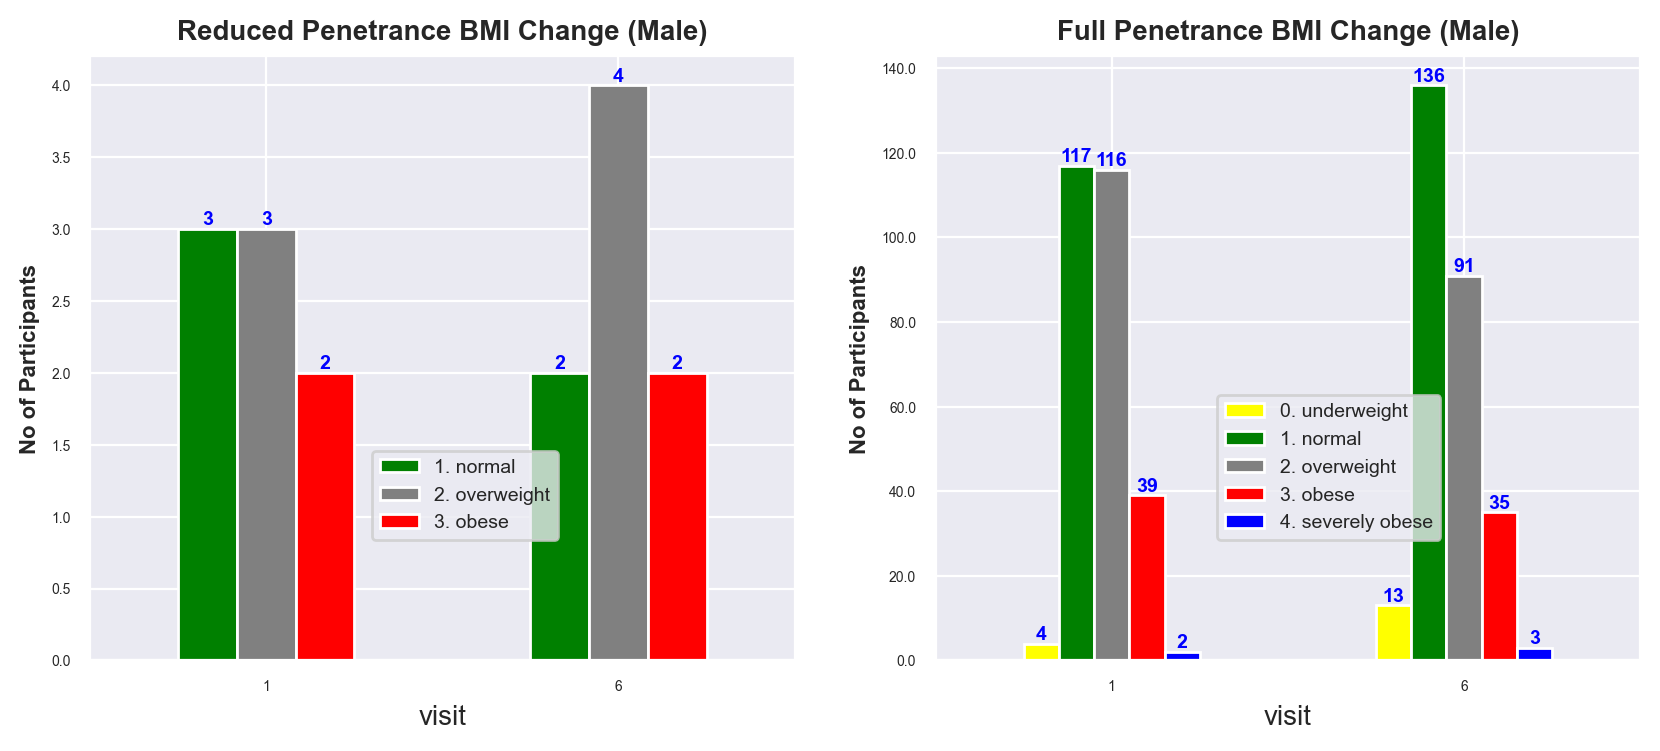

In [73]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
male_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
male_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="Reduced Penetrance BMI Change (Male)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="Full Penetrance BMI Change (Male)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

1. normal  2. overweight  3. obese
visit                                    
1           37.5           37.5      25.0
6           25.0           50.0      25.0

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                 1.4       42.1           41.7      14.0                0.7
6                 4.7       48.9           32.7      12.6                1.1

visit
1    100.0
6    100.0
dtype: float64

visit
1     99.9
6    100.0
dtype: float64

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Full Penetrance BMI Change (Male)'}, xlabel='visit', ylabel='%No of Participants'>

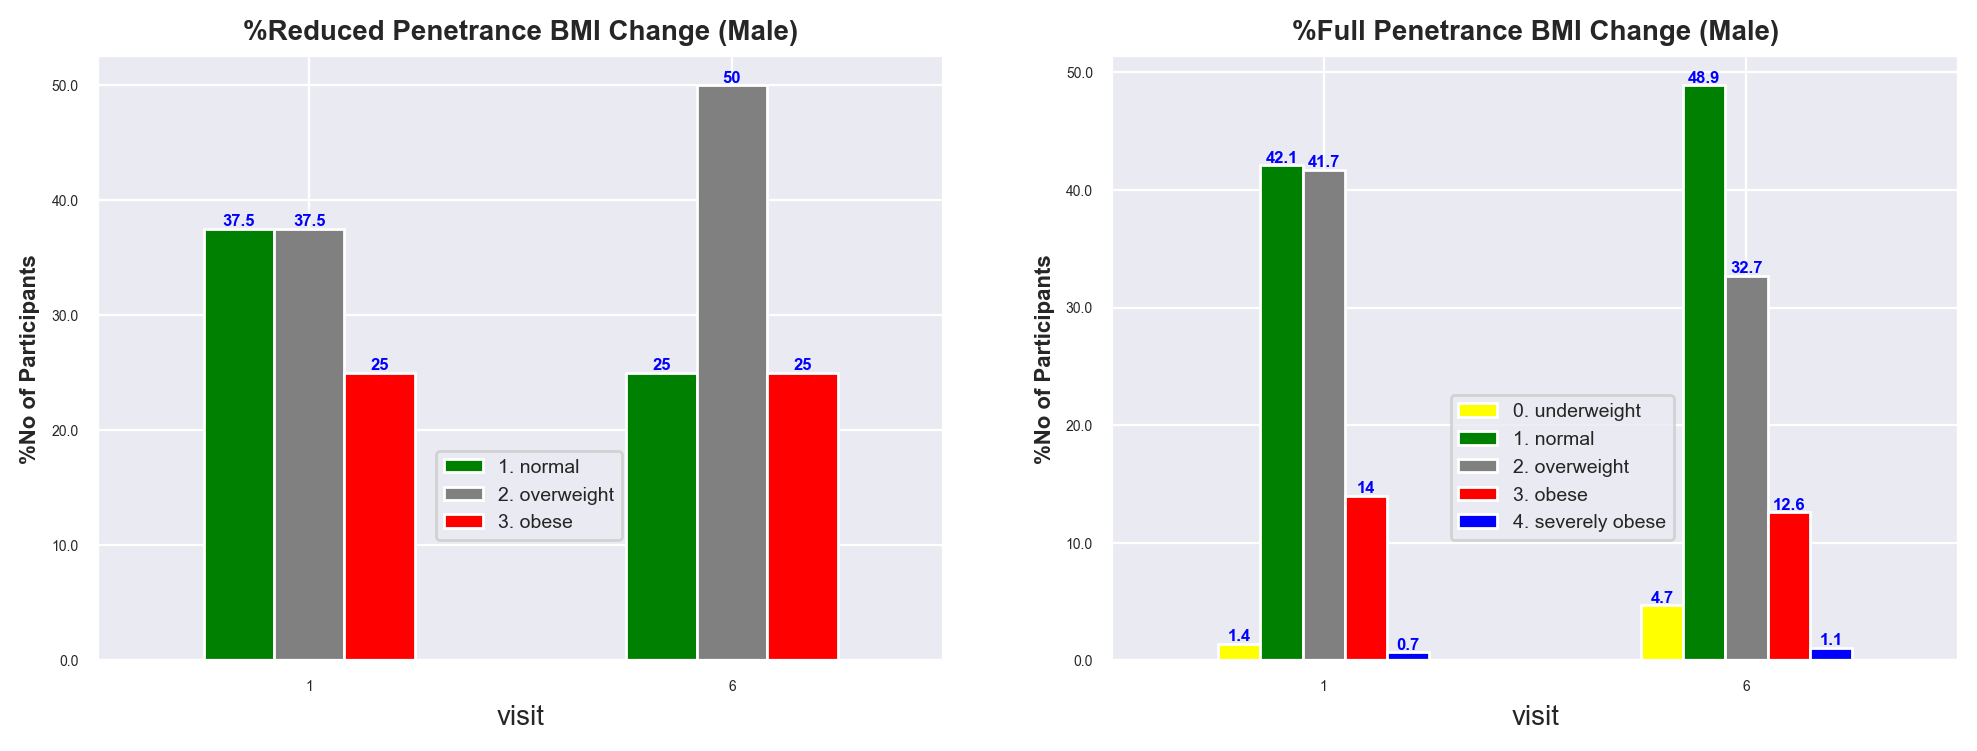

In [74]:
# in percentage
redpen_perc = proj.percentage_per_row(male_redpen, 'visit', precision=1)
fulpen_perc = proj.percentage_per_row(male_fulpen, 'visit', precision=1)
display(redpen_perc, fulpen_perc)
display(redpen_perc.sum(axis=1), fulpen_perc.sum(axis=1))

fig, (l, r) = plt.subplots(1, 2, figsize=[12, 4], dpi=200)
redpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
fulpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="%Reduced Penetrance BMI Change (Male)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="%Full Penetrance BMI Change (Male)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

#### Female Manifest

<AxesSubplot:title={'center':'Full Penetrance BMI Change (Female)'}, xlabel='visit', ylabel='No of Participants'>

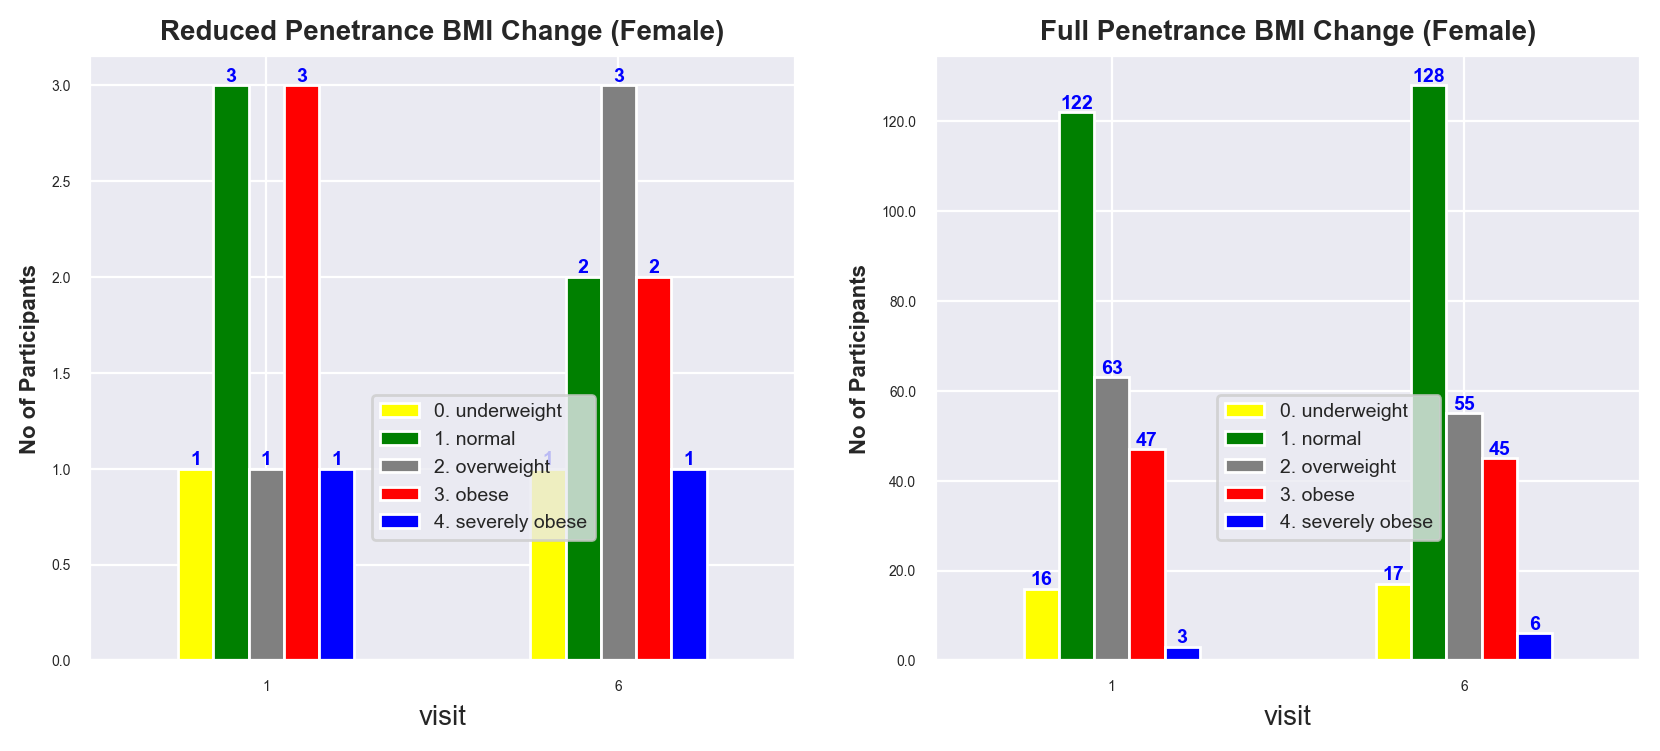

In [75]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
female_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
female_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="Reduced Penetrance BMI Change (Female)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="Full Penetrance BMI Change (Female)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                11.1       33.3           11.1      33.3               11.1
6                11.1       22.2           33.3      22.2               11.1

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                 6.4       48.6           25.1      18.7                1.2
6                 6.8       51.0           21.9      17.9                2.4

visit
1    99.9
6    99.9
dtype: float64

visit
1    100.0
6    100.0
dtype: float64

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Full Penetrance BMI Change (Female)'}, xlabel='visit', ylabel='%No of Participants'>

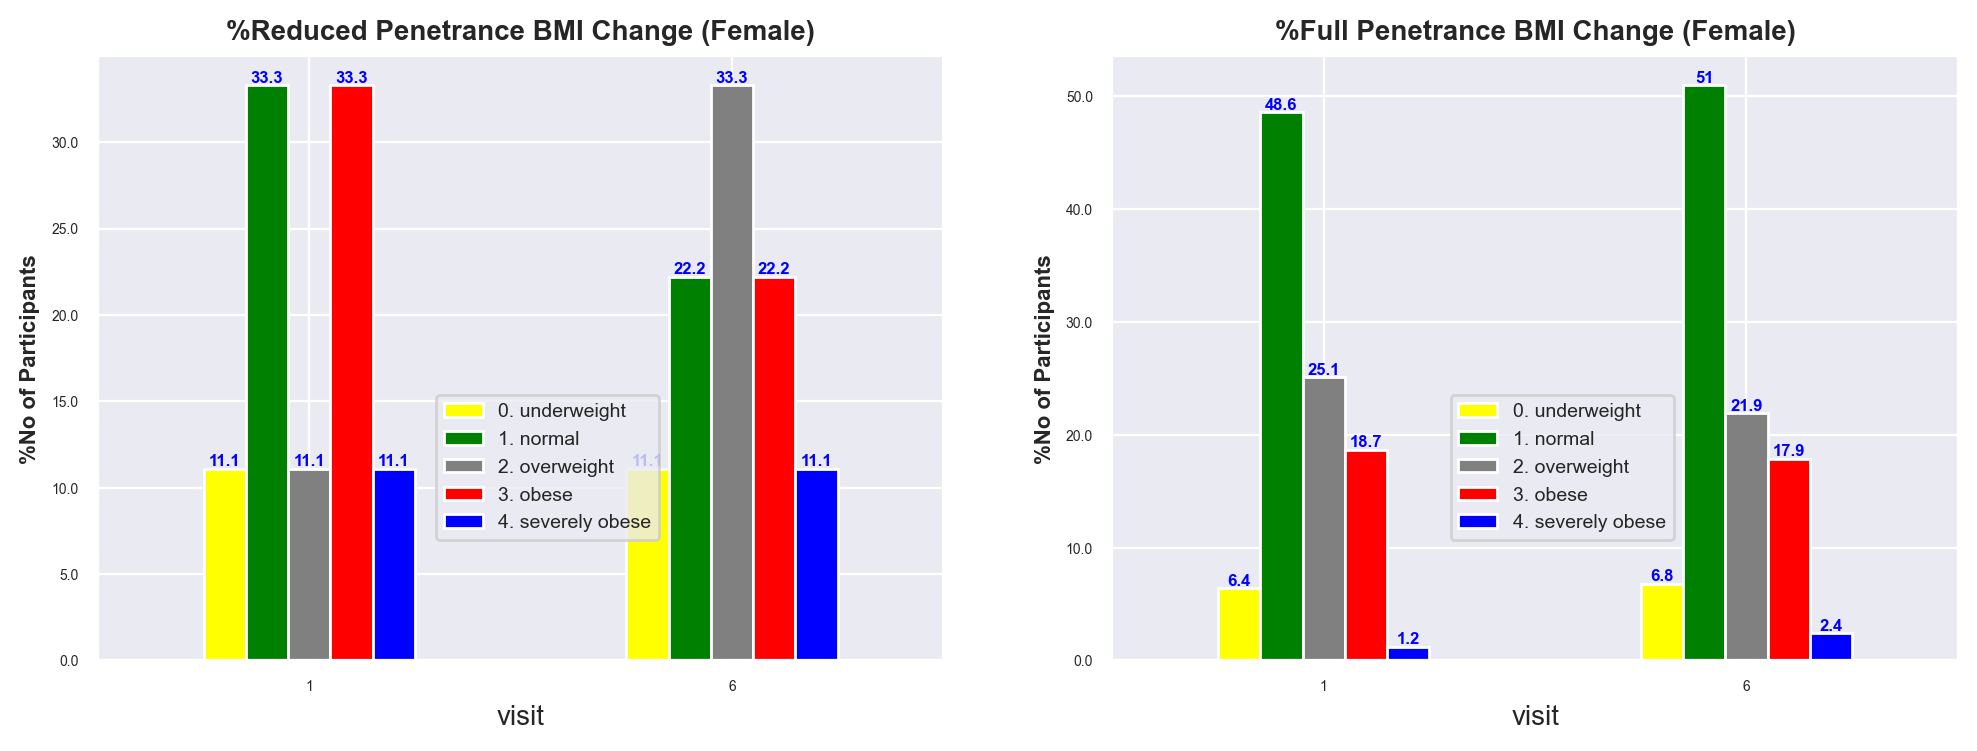

In [76]:
# in percentage
redpen_perc = proj.percentage_per_row(female_redpen, 'visit', precision=1)
fulpen_perc = proj.percentage_per_row(female_fulpen, 'visit', precision=1)
display(redpen_perc, fulpen_perc)
display(redpen_perc.sum(axis=1), fulpen_perc.sum(axis=1))

fig, (l, r) = plt.subplots(1, 2, figsize=[12, 4], dpi=200)
redpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
fulpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="%Reduced Penetrance BMI Change (Female)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="%Full Penetrance BMI Change (Female)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

### No GI illness

In [77]:
manifest['had_gi_illness'].sum()

206

In [78]:
cols = ['caghigh_band', 'bmi_level_vis_1', 'is_high_calorie', 'received_swallowing_therapy', 'had_gi_illness']

cond = ((manifest[cols[-3]] == 0) &
       (manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
manifest.loc[cond, cols]

caghigh_band bmi_level_vis_1  is_high_calorie  \
0    3. full penetrance       1. normal                0   
1    3. full penetrance   2. overweight                0   
2    3. full penetrance       1. normal                0   
3    3. full penetrance        3. obese                0   
4    3. full penetrance       1. normal                0   
..                  ...             ...              ...   
538  3. full penetrance       1. normal                0   
540  3. full penetrance       1. normal                0   
542  3. full penetrance   2. overweight                0   
544  3. full penetrance   2. overweight                0   
545  3. full penetrance       1. normal                0   

     received_swallowing_therapy  had_gi_illness  
0                              0               0  
1                              0               0  
2                              0               0  
3                              0               0  
4                              0               0  
..                           ...             ...  
538                            0               0  
540                            0               0  
542                            0               0  
544                            0               0  
545                            0               0  

[340 rows x 5 columns]

In [79]:
# overall manifest
# visit 1
cols = ['caghigh_band', 'bmi_level_vis_1', 'is_high_calorie', 'received_swallowing_therapy', 'had_gi_illness']

cond = ((manifest[cols[-3]] == 0) &
       (manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal_gi = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal_gi)
freq = proj.count_occurrences(no_swt_hkal_gi.drop(cols[-3:], axis=1), cols[:-3])
freq.loc[:, 'visit'] = 1
display(freq)
vis1 = pd.pivot(freq, index='visit', columns=cols[:-3], values='total_count')
# display(vis1)

# visit 6
cols = ['caghigh_band', 'bmi_level_vis_6', 'is_high_calorie', 'received_swallowing_therapy', 'had_gi_illness']

cond = ((manifest[cols[-3]] == 0) &
       (manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))

no_swt_hkal_gi = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(np.unique(no_swt_hkal[cols[-2]]),
#        no_swt_hkal)
freq = proj.count_occurrences(no_swt_hkal_gi.drop(cols[-3:], axis=1), cols[:-3])
freq.loc[:, 'visit'] = 6
# display(freq)
vis6 = pd.pivot(freq, index='visit', columns=cols[:-3], values='total_count')
# display(vis6)
v1v6 = vis1.append(vis6)
display(v1v6)

# reduced penetrance
redpen = v1v6.loc[:, '2. reduced penetrance'].reset_index()
fulpen = v1v6.loc[:, '3. full penetrance'].reset_index()
display(redpen, fulpen)

caghigh_band    bmi_level_vis_1  total_count  visit
0  2. reduced penetrance     0. underweight            1      1
1  2. reduced penetrance          1. normal            3      1
2  2. reduced penetrance      2. overweight            1      1
3  2. reduced penetrance           3. obese            4      1
4     3. full penetrance     0. underweight           12      1
5     3. full penetrance          1. normal          164      1
6     3. full penetrance      2. overweight          108      1
7     3. full penetrance           3. obese           45      1
8     3. full penetrance  4. severely obese            2      1

caghigh_band 2. reduced penetrance                                   \
                    0. underweight 1. normal 2. overweight 3. obese   
visit                                                                 
1                                1         3             1        4   
6                                1         2             4        1   

caghigh_band                   3. full penetrance                          \
             4. severely obese     0. underweight 1. normal 2. overweight   
visit                                                                       
1                          NaN                 12       164           108   
6                          1.0                 20       177            83   

caghigh_band                             
             3. obese 4. severely obese  
visit                                    
1                  45                 2  
6                  46                 5

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               1          3              1         4   
1      6               1          2              4         1   

   4. severely obese  
0                NaN  
1                1.0

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1              12        164            108        45   
1      6              20        177             83        46   

   4. severely obese  
0                  2  
1                  5

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Full Penetrance BMI Change'}, xlabel='visit', ylabel='No of Participants'>

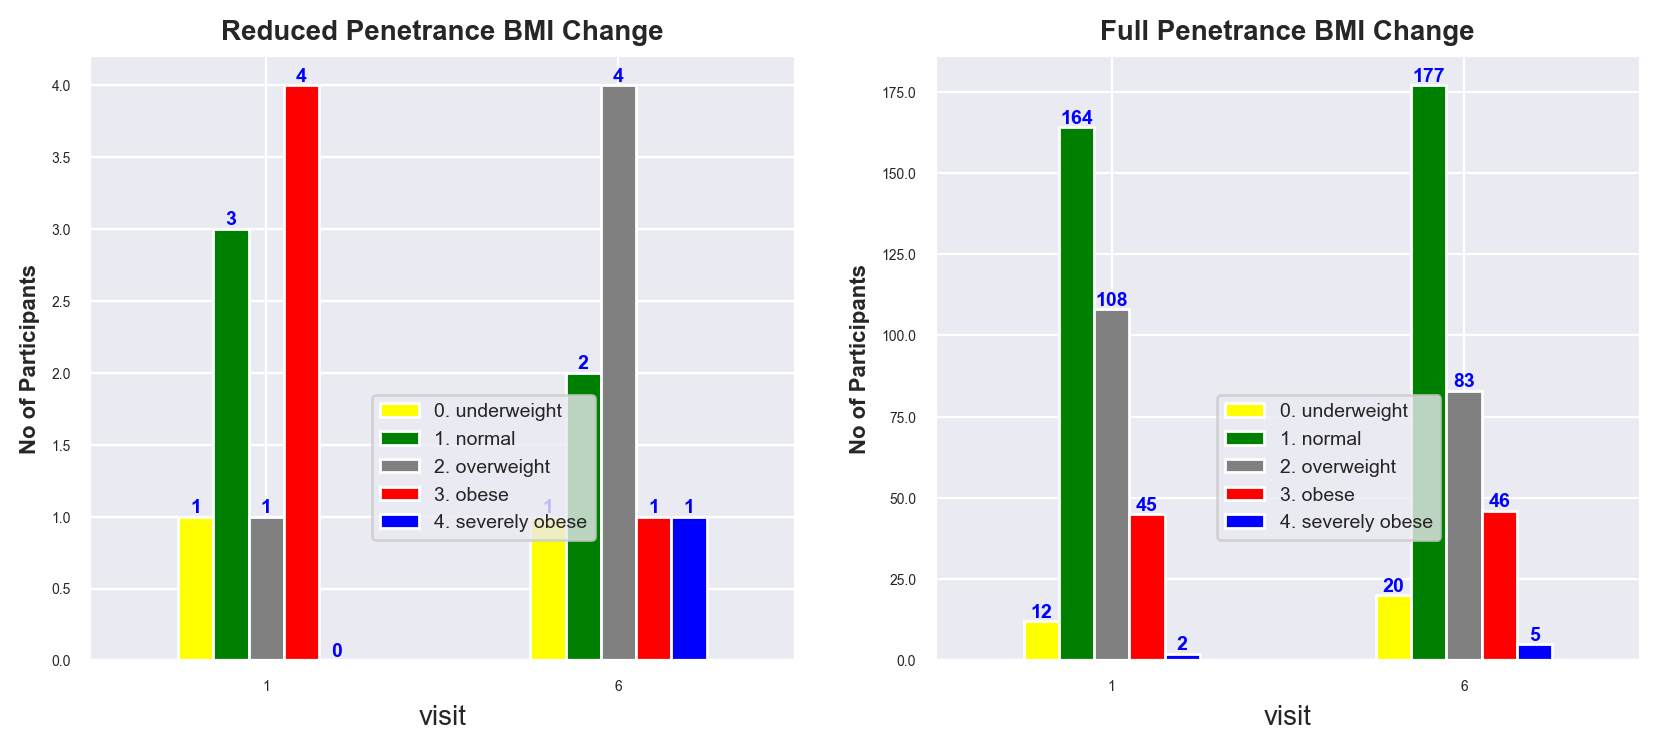

In [80]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="Reduced Penetrance BMI Change", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="Full Penetrance BMI Change", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                11.1       33.3           11.1      44.4                NaN
6                11.1       22.2           44.4      11.1               11.1

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                 3.6       49.5           32.6      13.6                0.6
6                 6.0       53.5           25.1      13.9                1.5

visit
1    99.9
6    99.9
dtype: float64

visit
1     99.9
6    100.0
dtype: float64

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Full Penetrance BMI Change'}, xlabel='visit', ylabel='%No of Participants'>

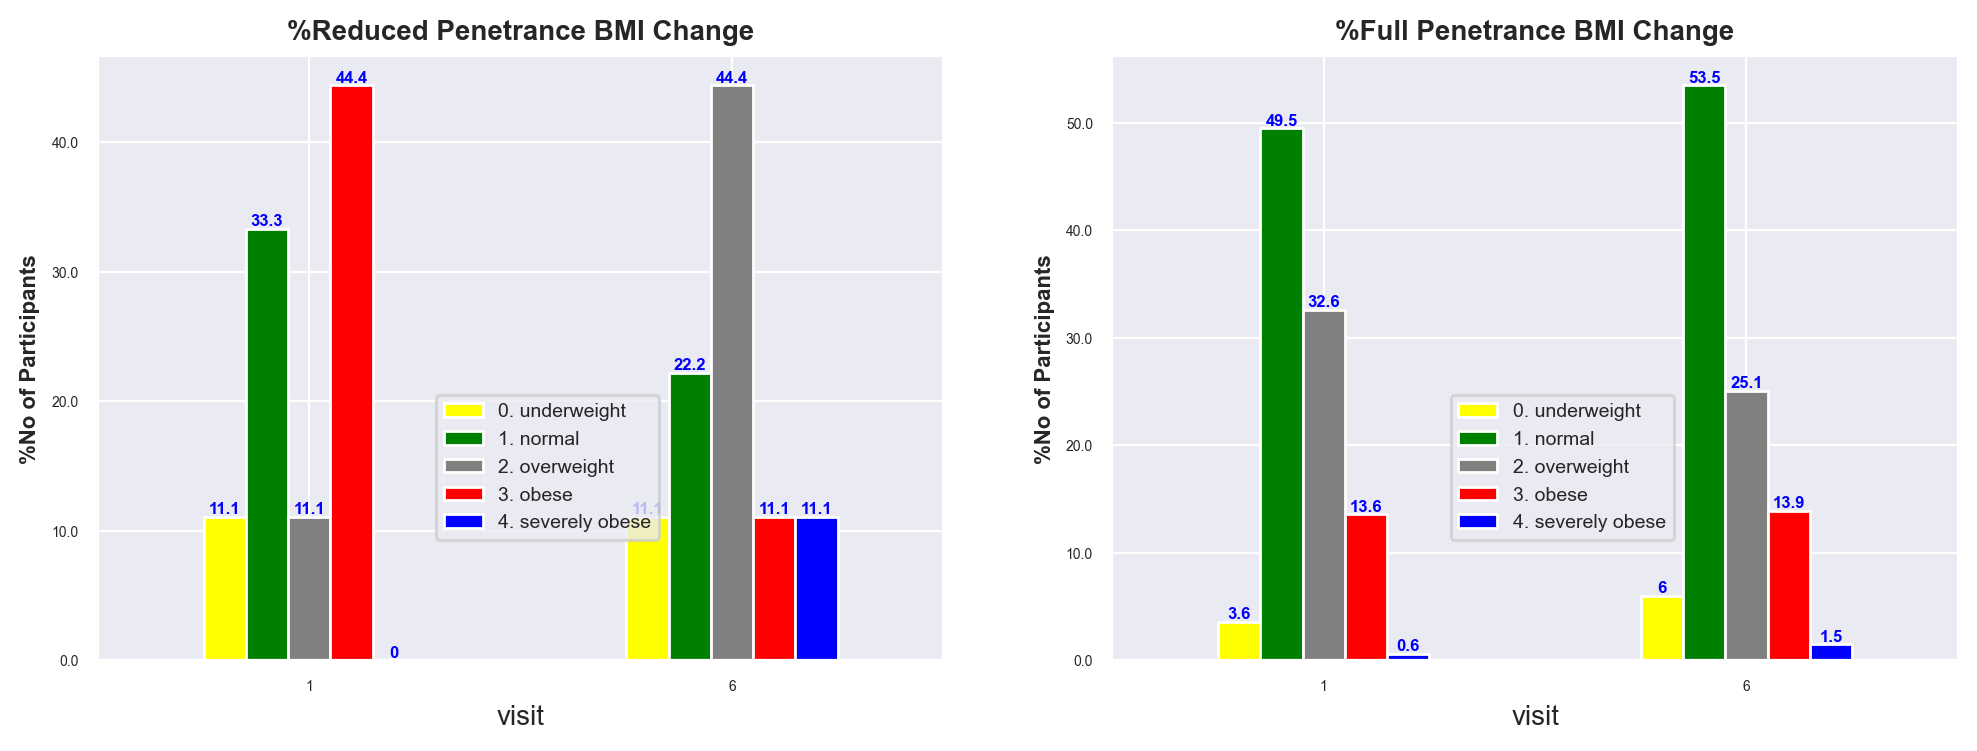

In [81]:
# in percentage
redpen_perc = proj.percentage_per_row(redpen, 'visit', precision=1)
fulpen_perc = proj.percentage_per_row(fulpen, 'visit', precision=1)
display(redpen_perc, fulpen_perc)
display(redpen_perc.sum(axis=1), fulpen_perc.sum(axis=1))

fig, (l, r) = plt.subplots(1, 2, figsize=[12, 4], dpi=200)
redpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
fulpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="%Reduced Penetrance BMI Change", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="%Full Penetrance BMI Change", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

#### Gender Effect

In [82]:
# reduced penetrance
# visit 1
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_1', 'is_high_calorie', 
        'received_swallowing_therapy', 'had_gi_illness']

cond = ((manifest[cols[-3]] == 0) &
       (manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal_gi = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])

freq = proj.count_occurrences(no_swt_hkal_gi.drop(cols[-3:], axis=1), cols[:-3])
# display(freq)

cag_lvl = '2. reduced penetrance'
df = freq.loc[freq[cols[0]] == cag_lvl]
# display(df)

vis1 = df.drop(cols[0], axis=1)
vis1.loc[:, 'visit'] = 1
vis1 = pd.pivot(vis1, index='visit', columns=cols[1:3], values='total_count')
# display(vis1)

# visit 6
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_6', 'is_high_calorie', 
        'received_swallowing_therapy', 'had_gi_illness']

cond = ((manifest[cols[-3]] == 0) &
       (manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal_gi = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal)
# display(np.unique(no_swt_hkal[cols[-2]]), np.unique(no_swt_hkal[cols[-1]]))

freq = proj.count_occurrences(no_swt_hkal_gi.drop(cols[-3:], axis=1), cols[:-3])
# display(freq)

cag_lvl = '2. reduced penetrance'
redpen = freq.loc[freq[cols[0]] == cag_lvl]
display(redpen)
vis6 = redpen.drop(cols[0], axis=1)
vis6.loc[:, 'visit'] = 6
vis6 = pd.pivot(vis6, index='visit', columns=cols[1:3], values='total_count')
# display(vis6)

v1v6 = vis1.append(vis6)
male_redpen = v1v6.loc[:, 'm'].reset_index()
female_redpen = v1v6.loc[:, 'f'].reset_index()
display(v1v6, male_redpen, female_redpen)

caghigh_band is_male    bmi_level_vis_6  total_count
0  2. reduced penetrance       f     0. underweight            1
1  2. reduced penetrance       f          1. normal            1
2  2. reduced penetrance       f      2. overweight            3
3  2. reduced penetrance       f  4. severely obese            1
4  2. reduced penetrance       m          1. normal            1
5  2. reduced penetrance       m      2. overweight            1
6  2. reduced penetrance       m           3. obese            1

is_male              f                                                     \
        0. underweight 1. normal 2. overweight 3. obese 4. severely obese   
visit                                                                       
1                    1         2             1      2.0               NaN   
6                    1         1             3      NaN               1.0   

is_male         m                         
        1. normal 2. overweight 3. obese  
visit                                     
1               1           NaN        2  
6               1           1.0        1

visit  1. normal  2. overweight  3. obese
0      1          1            NaN         2
1      6          1            1.0         1

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               1          2              1       2.0   
1      6               1          1              3       NaN   

   4. severely obese  
0                NaN  
1                1.0

In [83]:
# visit 1
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_1', 'is_high_calorie', 
        'received_swallowing_therapy', 'had_gi_illness']

cond = ((manifest[cols[-3]] == 0) &
       (manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal_gi = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal)

freq = proj.count_occurrences(no_swt_hkal_gi.drop(cols[-3:], axis=1), cols[:-3])
# display(freq)

cag_lvl = '3. full penetrance'
df = freq.loc[freq[cols[0]] == cag_lvl]
# display(df)

vis1 = df.drop(cols[0], axis=1)
vis1.loc[:, 'visit'] = 1
vis1 = pd.pivot(vis1, index='visit', columns=cols[1:3], values='total_count')
# display(vis1)

# visit 6
cols = ['caghigh_band', 'is_male', 'bmi_level_vis_6', 'is_high_calorie',
        'received_swallowing_therapy', 'had_gi_illness']

cond = ((manifest[cols[-3]] == 0) &
       (manifest[cols[-2]] == 0) &
       (manifest[cols[-1]] == 0))
no_swt_hkal_gi = proj.replace_value_with(manifest.loc[cond, cols],
                                      replacement_guide={0:'f', 1:'m'},
                                      colnames=[cols[1]])
# display(no_swt_hkal)
# display(np.unique(no_swt_hkal[cols[-2]]), np.unique(no_swt_hkal[cols[-1]]))

freq = proj.count_occurrences(no_swt_hkal_gi.drop(cols[-3:], axis=1), cols[:-3])
# display(freq)

cag_lvl = '3. full penetrance'
fulpen = freq.loc[freq[cols[0]] == cag_lvl]
display(fulpen)
vis6 = fulpen.drop(cols[0], axis=1)
vis6.loc[:, 'visit'] = 6
vis6 = pd.pivot(vis6, index='visit', columns=cols[1:3], values='total_count')
# display(vis6)

v1v6 = vis1.append(vis6)
male_fulpen = v1v6.loc[:, 'm'].reset_index()
female_fulpen = v1v6.loc[:, 'f'].reset_index()
display(v1v6, male_fulpen, female_fulpen)

caghigh_band is_male    bmi_level_vis_6  total_count
7   3. full penetrance       f     0. underweight           14
8   3. full penetrance       f          1. normal           82
9   3. full penetrance       f      2. overweight           33
10  3. full penetrance       f           3. obese           27
11  3. full penetrance       f  4. severely obese            3
12  3. full penetrance       m     0. underweight            6
13  3. full penetrance       m          1. normal           95
14  3. full penetrance       m      2. overweight           50
15  3. full penetrance       m           3. obese           19
16  3. full penetrance       m  4. severely obese            2

is_male              f                                                     \
        0. underweight 1. normal 2. overweight 3. obese 4. severely obese   
visit                                                                       
1                   10        86            36       27               NaN   
6                   14        82            33       27               3.0   

is_male              m                                                     
        0. underweight 1. normal 2. overweight 3. obese 4. severely obese  
visit                                                                      
1                    2        78            72       18                 2  
6                    6        95            50       19                 2

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1               2         78             72        18   
1      6               6         95             50        19   

   4. severely obese  
0                  2  
1                  2

visit  0. underweight  1. normal  2. overweight  3. obese  \
0      1              10         86             36        27   
1      6              14         82             33        27   

   4. severely obese  
0                NaN  
1                3.0

#### Male Manifest

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Full Penetrance BMI Change (Male)'}, xlabel='visit', ylabel='No of Participants'>

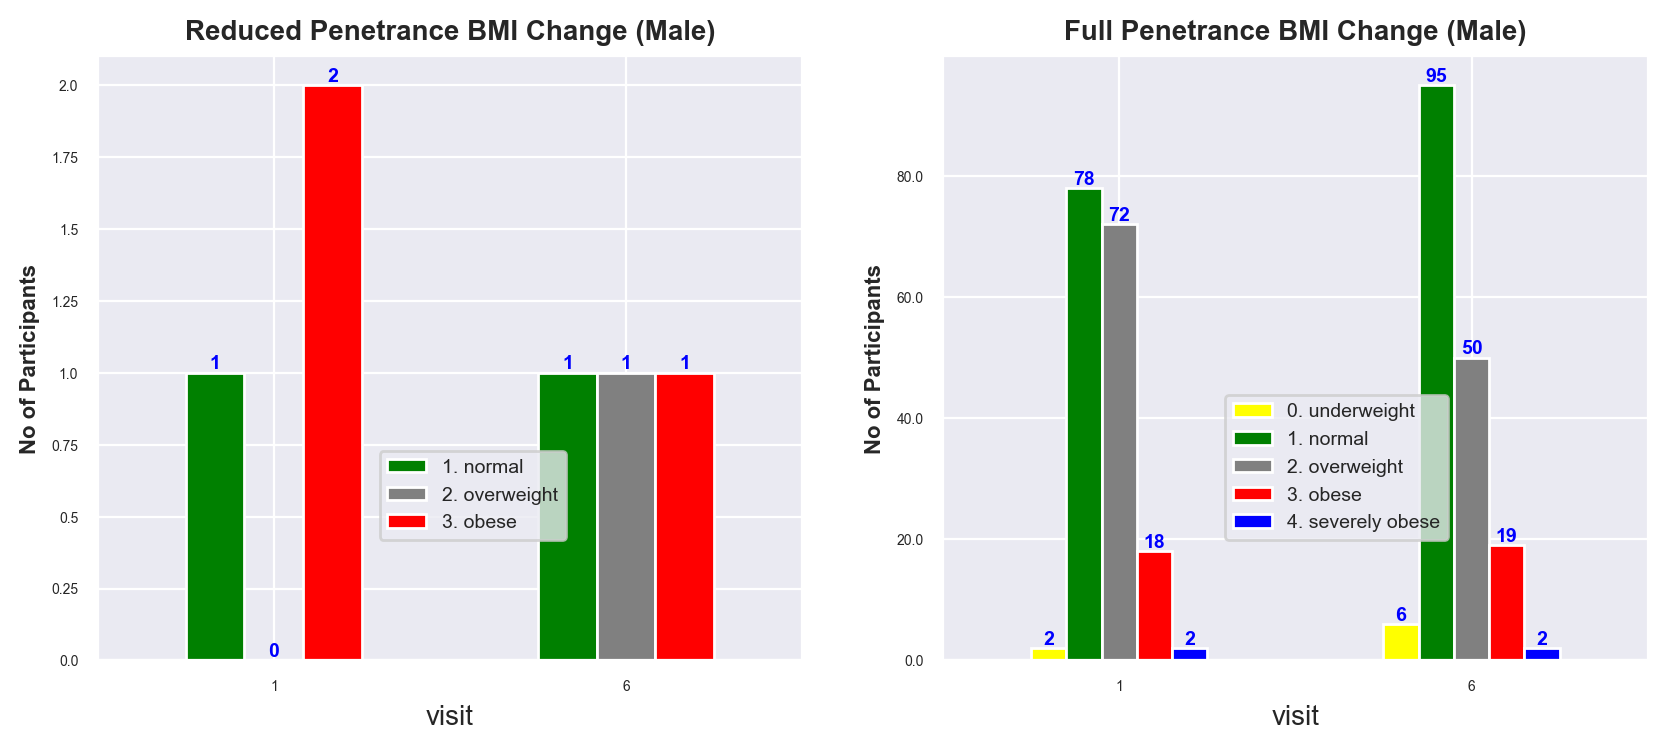

In [84]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
male_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
male_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="Reduced Penetrance BMI Change (Male)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="Full Penetrance BMI Change (Male)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

1. normal  2. overweight  3. obese
visit                                    
1           33.3            NaN      66.7
6           33.3           33.3      33.3

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                 1.2       45.3           41.9      10.5                1.2
6                 3.5       55.2           29.1      11.0                1.2

visit
1    100.0
6     99.9
dtype: float64

visit
1    100.1
6    100.0
dtype: float64

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Full Penetrance BMI Change (Male)'}, xlabel='visit', ylabel='%No of Participants'>

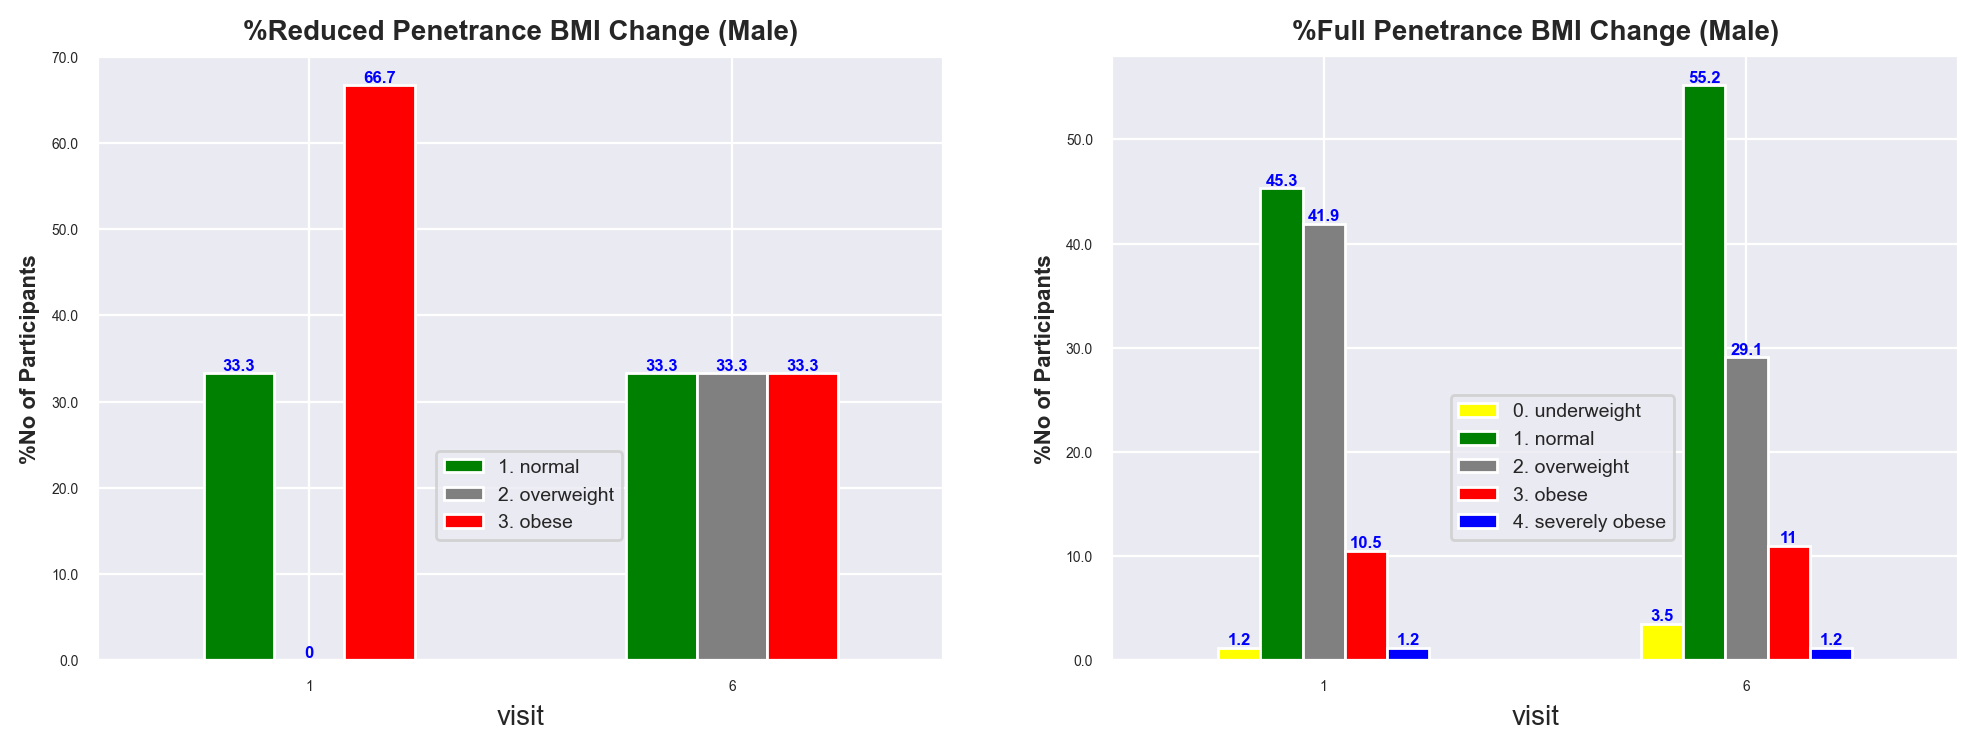

In [85]:
# in percentage
redpen_perc = proj.percentage_per_row(male_redpen, 'visit', precision=1)
fulpen_perc = proj.percentage_per_row(male_fulpen, 'visit', precision=1)
display(redpen_perc, fulpen_perc)
display(redpen_perc.sum(axis=1), fulpen_perc.sum(axis=1))

fig, (l, r) = plt.subplots(1, 2, figsize=[12, 4], dpi=200)
redpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
fulpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="%Reduced Penetrance BMI Change (Male)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="%Full Penetrance BMI Change (Male)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

#### Female Manifest

<AxesSubplot:title={'center':'Full Penetrance BMI Change (Female)'}, xlabel='visit', ylabel='No of Participants'>

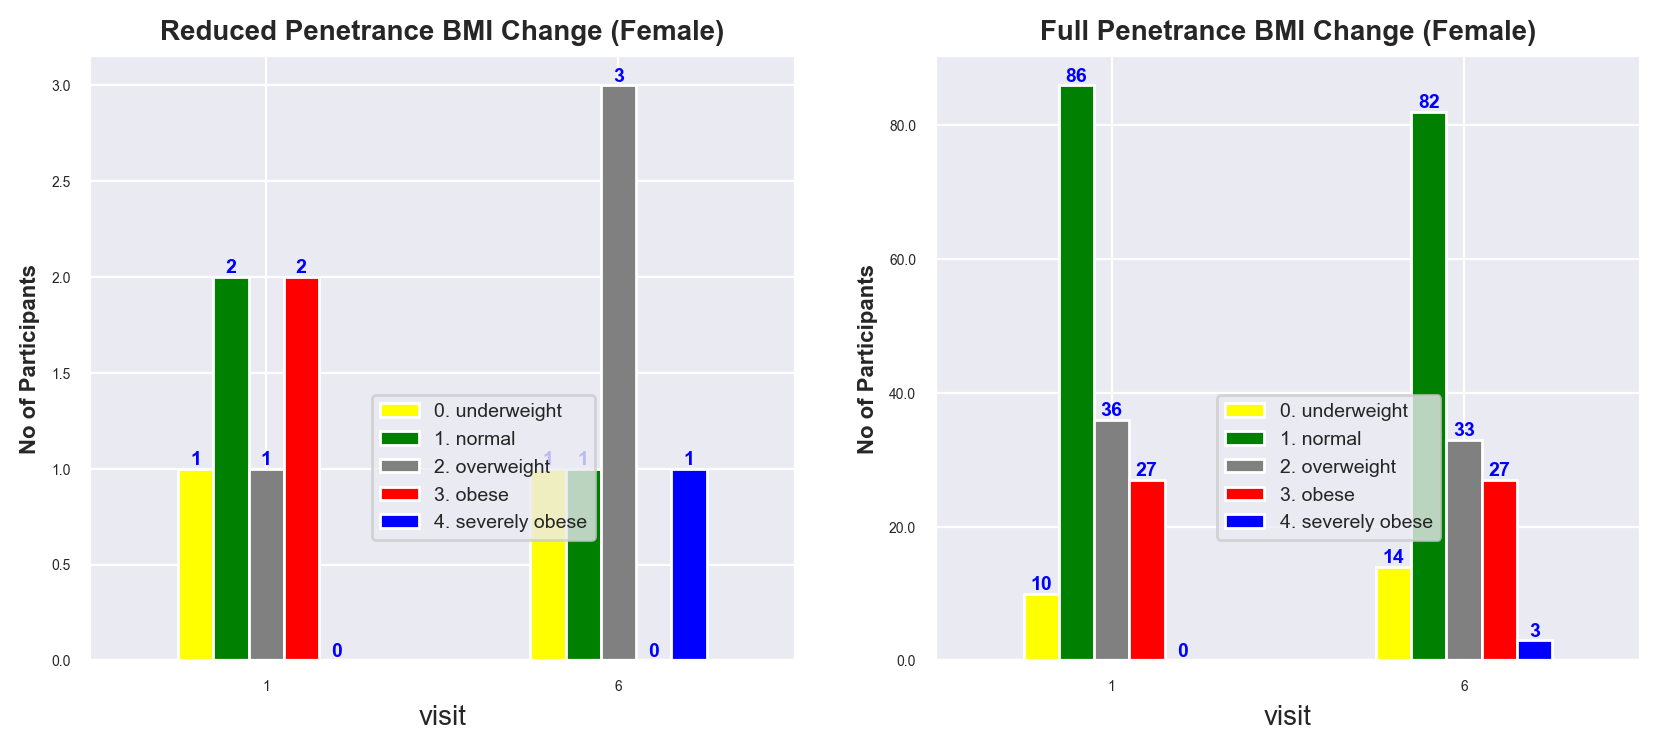

In [86]:
fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
female_redpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l)
female_fulpen.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="Reduced Penetrance BMI Change (Female)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="Full Penetrance BMI Change (Female)", title_size=10,
                y_labe='No of Participants', annotate=True, annot_size=7, 
                 show_legend_at=[0.4, 0.2])

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                16.7       33.3           16.7      33.3                NaN
6                16.7       16.7           50.0       NaN               16.7

0. underweight  1. normal  2. overweight  3. obese  4. severely obese
visit                                                                       
1                 6.3       54.1           22.6      17.0                NaN
6                 8.8       51.6           20.8      17.0                1.9

visit
1    100.0
6    100.1
dtype: float64

visit
1    100.0
6    100.1
dtype: float64

W:\MSc-AIDS-UoH\Trimester_3\Submit\project_methods.py:2125: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Full Penetrance BMI Change (Female)'}, xlabel='visit', ylabel='%No of Participants'>

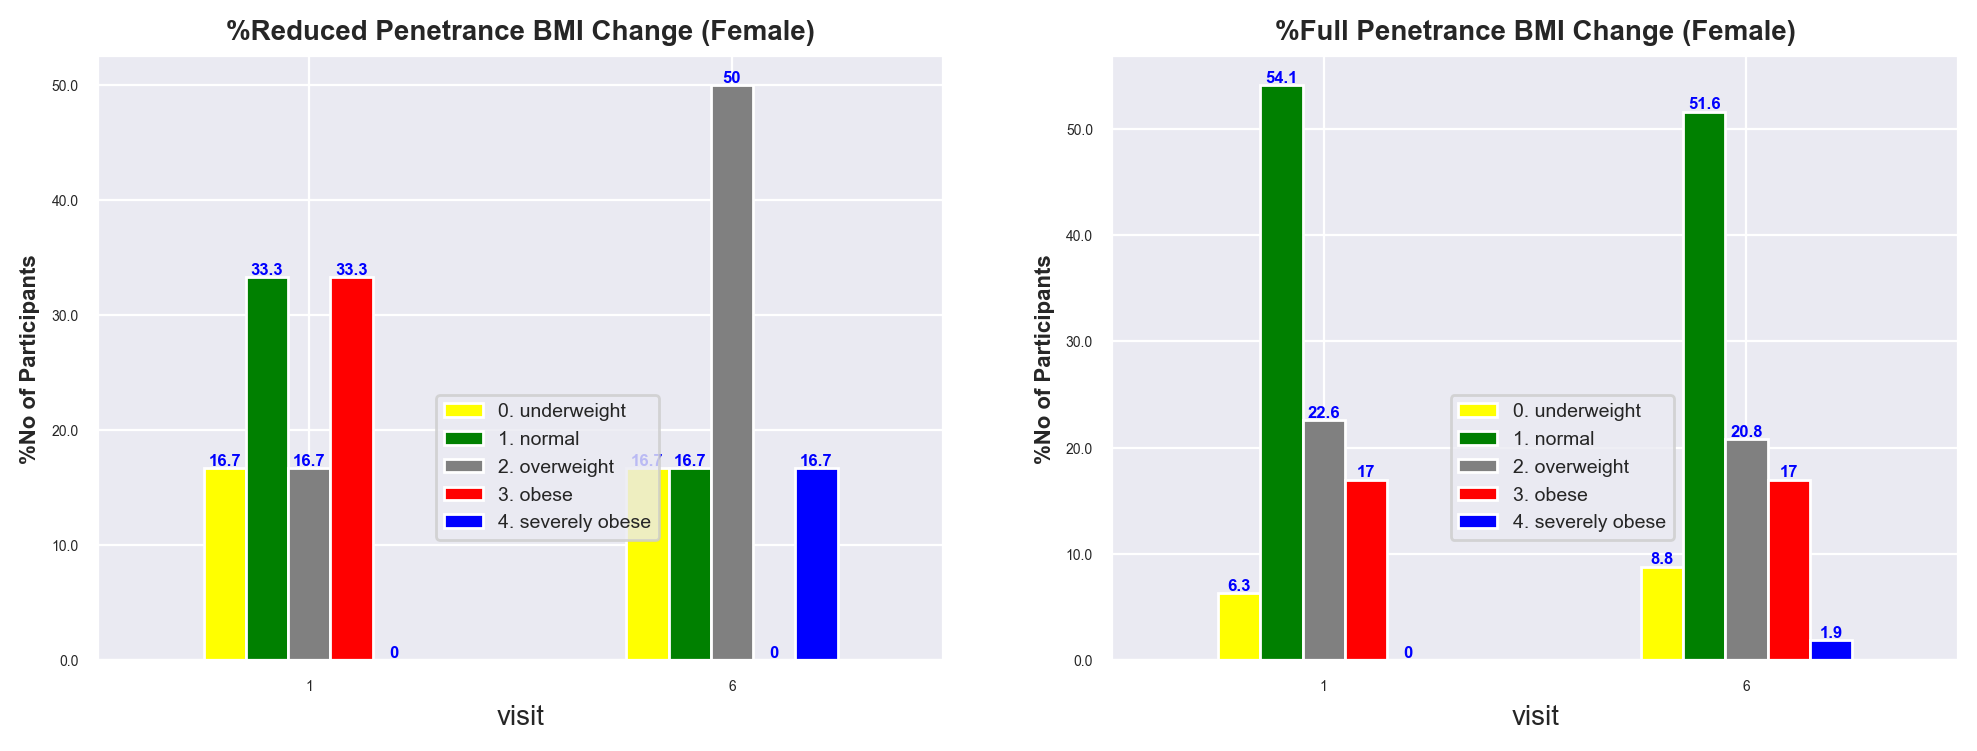

In [87]:
# in percentage
redpen_perc = proj.percentage_per_row(female_redpen, 'visit', precision=1)
fulpen_perc = proj.percentage_per_row(female_fulpen, 'visit', precision=1)
display(redpen_perc, fulpen_perc)
display(redpen_perc.sum(axis=1), fulpen_perc.sum(axis=1))

fig, (l, r) = plt.subplots(1, 2, figsize=[12, 4], dpi=200)
redpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=l)
fulpen_perc.plot(kind='bar', color=proj.bmi_level_cmap, ax=r)

proj.adjust_axis(l, plot_title="%Reduced Penetrance BMI Change (Female)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

proj.adjust_axis(r, plot_title="%Full Penetrance BMI Change (Female)", title_size=10,
                y_labe='%No of Participants', annotate=True, annot_size=6, 
                 show_legend_at=[0.4, 0.2])

In [88]:
stopt

NameError: name 'stopt' is not defined